# Объединение данных и предсказание доходности
I. Загрузка предобработанных данных

II. Подготовка технических данных

III. Подготовка данных телеграма

IV. Подготовка данных Pulse

V. Объединение dataframes

VI. Обучение моделей

VII. Сравнение и анализ результатов

In [1]:
import sys
print(sys.version)

3.9.18 (main, Sep 11 2023, 13:30:38) [MSC v.1916 64 bit (AMD64)]


In [2]:
!pip install pandas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
pd.options.display.max_columns=100
pd.options.display.max_rows=100

In [4]:
#!pip install xgboost

#!pip install -U pip
#!pip install -U setuptools wheel
#!pip install torch==1.12.1+cpu torchvision==0.13.1+cpu torchtext==0.13.1 -f https://download.pytorch.org/whl/cpu/torch_stable.html
#!pip install autogluon
#!pip install keras
import tqdm as notebook_tqdm
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

import xgboost as xgb
from keras.models import Sequential
from keras.layers import LSTM, Dense
from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.metrics import mean_squared_error

C:\Users\glebhaziev\AppData\Local\anaconda3\envs\test\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# I. Загрузка предобработанных данных

In [5]:
# Телеграм из предыдущего файла
tg = pd.read_csv("tg_2022_label.csv")

In [6]:
# Пульс #из предыдущего файла
pulse = pd.read_csv('pulse_2022_label.csv')

In [7]:
# Технические сигналы 
red_2022 = pd.read_excel("5_2022.xlsx")
red_2022.head(15)

,TICKER,Название компании,Отрасль,Котировальный список,Входит в индекс,Уровень ликвидности,DATE,квартал,TIME,OPEN,HIGH,LOW,CLOSE,Change price,VOLUME (Q shares),VOLUME (rub),Numbers of shares,Earning,Book value,PE,PB,EMA250 PE,EMA250 PB,сигнал6,сигнал7,EMA 12,EMA 26,Сигнал 1,Быстрая MACD,Сигнальная MACD (9) - быстрая MACD,сигнал 2,Stohastic,сигнал 3,Momentum,сигнал 4,Повышения цен закрытия,Среднее повышение (7),Понижения цен закрытия,Среднее повышение (7).1,RS,RSI,сигнал 5
0,AFKS,"АФК Система, акция об.",Холдинги,Первый уровень,"Индекс МосБиржи, Индекс МосБиржи широкого рынк...",Высокий,2019-01-03,1 кв 2019,10:00,8.001,8.049,7.961,8.037,0.004499,633800.0,5082442.20,9650000000,1.630000e+09,-1.415000e+11,47.581012,-0.548106,47.581012,-0.548106,NaN,NaN,8.037000,8.037000,NaN,0.000000,-0.017733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFKS,"АФК Система, акция об.",Холдинги,Первый уровень,"Индекс МосБиржи, Индекс МосБиржи широкого рынк...",Высокий,2019-01-03,1 кв 2019,11:00,8.040,8.043,7.973,7.976,-0.007590,671500.0,5377372.00,9650000000,1.630000e+09,-1.415000e+11,47.219877,-0.543946,47.578135,-0.548073,NaN,NaN,8.027615,8.032481,NaN,-0.004866,-0.015160,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0.061,NaN,NaN,NaN,NaN
2,AFKS,"АФК Система, акция об.",Холдинги,Первый уровень,"Индекс МосБиржи, Индекс МосБиржи широкого рынк...",Высокий,2019-01-03,1 кв 2019,12:00,7.980,8.000,7.972,7.989,0.001630,347200.0,2772218.40,9650000000,1.630000e+09,-1.415000e+11,47.296840,-0.544833,47.575893,-0.548047,NaN,NaN,8.021675,8.029261,NaN,-0.007586,-0.013645,NaN,NaN,NaN,NaN,NaN,0.013,NaN,0.000,NaN,NaN,NaN,NaN
3,AFKS,"АФК Система, акция об.",Холдинги,Первый уровень,"Индекс МосБиржи, Индекс МосБиржи широкого рынк...",Высокий,2019-01-03,1 кв 2019,13:00,7.989,8.016,7.983,8.013,0.003004,114600.0,916914.60,9650000000,1.630000e+09,-1.415000e+11,47.438926,-0.546470,47.574802,-0.548035,NaN,NaN,8.020340,8.028056,NaN,-0.007716,-0.012459,NaN,NaN,NaN,NaN,NaN,0.024,NaN,0.000,NaN,NaN,NaN,NaN
4,AFKS,"АФК Система, акция об.",Холдинги,Первый уровень,"Индекс МосБиржи, Индекс МосБиржи широкого рынк...",Высокий,2019-01-03,1 кв 2019,14:00,8.013,8.014,8.000,8.014,0.000125,188400.0,1509743.40,9650000000,1.630000e+09,-1.415000e+11,47.444847,-0.546538,47.573766,-0.548023,NaN,NaN,8.019365,8.027015,NaN,-0.007650,-0.011497,NaN,NaN,NaN,NaN,NaN,0.001,NaN,0.000,NaN,NaN,NaN,NaN
5,AFKS,"АФК Система, акция об.",Холдинги,Первый уровень,"Индекс МосБиржи, Индекс МосБиржи широкого рынк...",Высокий,2019-01-03,1 кв 2019,15:00,8.016,8.018,8.010,8.014,0.000000,624300.0,5003764.50,9650000000,1.630000e+09,-1.415000e+11,47.444847,-0.546538,47.572739,-0.548011,NaN,NaN,8.018539,8.026051,NaN,-0.007512,-0.010700,NaN,0.000000,NaN,NaN,NaN,0.000,NaN,0.000,NaN,NaN,NaN,NaN
6,AFKS,"АФК Система, акция об.",Холдинги,Первый уровень,"Индекс МосБиржи, Индекс МосБиржи широкого рынк...",Высокий,2019-01-03,1 кв 2019,16:00,8.014,8.029,8.012,8.027,0.001622,284200.0,2279426.10,9650000000,1.630000e+09,-1.415000e+11,47.521810,-0.547424,47.572333,-0.548006,NaN,NaN,8.019841,8.026121,NaN,-0.006280,-0.009816,NaN,0.089286,NaN,0.998756,NaN,0.013,0.007286,0.000,0.008714,0.836066,45.535714,NaN
7,AFKS,"АФК Система, акция об.",Холдинги,Первый уровень,"Индекс МосБиржи, Индекс МосБиржи широкого рынк...",Высокий,2019-01-03,1 кв 2019,17:00,8.022,8.025,8.010,8.017,-0.001246,539500.0,4326520.25,9650000000,1.630000e+09,-1.415000e+11,47.462607,-0.546742,47.571459,-0.547996,NaN,NaN,8.019404,8.025446,NaN,-0.006042,-0.009061,NaN,0.000000,NaN,1.005140,покупаем,0.000,0.007286,0.010,0.010143,0.718310,41.803279,NaN
8,AFKS,"АФК Система, акция об.",Холдинги,Первый уровень,"Индекс МосБиржи, Индекс МосБиржи широкого рынк...",Высокий,2019-01-03,1 кв 2019,18:00,8.015,8.043,8.010,8.043,0.003243,665200.0,5340890.80,9650000000,1.630000e+09,-1.415000e+11,47.616534,-0.548516,47.571818,-0.548000,продавать,покупать,8.023034,8.026746,NaN,-0.003712,-0.007991,NaN,0.000000,NaN,1.006759,NaN,0.026,0.011000,0.000,0.001429,7.700000,88.505747,продаем
9,AFKS,"АФК Система, акци

In [8]:
print(tg.shape)
print(pulse.shape)
print(red_2022.shape)

(33241, 11)
(245863, 7)
(773863, 42)


# II. Подготовка технических данных

In [9]:
# Изменение формата данных
red_2022['TIME'] = red_2022['TIME'].astype(str).apply(lambda x: x[:5])
red_2022['DATE'] = pd.to_datetime(red_2022['DATE'], format='%Y-%m-%d')
red_2022['TIME'] = pd.to_datetime(red_2022['TIME'], format='%H:%M')                        
date = red_2022.apply(lambda row: pd.to_datetime(row['DATE'].strftime('%Y-%m-%d') + ' ' + row['TIME'].strftime('%H:%M')), axis=1)
red_2022.insert(0, 'date', date)

tmp = red_2022.reset_index()
# удаление лишних колонок
reduced_2022 = tmp.drop(columns=['Котировальный список', 'Входит в индекс', 'Уровень ликвидности',
                                 'index', 'DATE', 'TIME'])
# переименовать Ticker
reduced_2022 = reduced_2022.rename(columns={'TICKER': 'ticker', 'Сигнал 1': 'сигнал1',
                                            'сигнал 2': 'сигнал2', 'сигнал 3': 'сигнал3',
                                           'сигнал 4': 'сигнал4', 'сигнал 5':'сигнал5'})
# обработка сигналов
def signal(row):
    if (row == 'покупать') or (row == 'покупаем'):
        return 'buy'
    elif (row == 'продавать') or (row == 'продаем'):
        return 'sell'
    else:
        return 0

reduced_2022['сигнал1'] = reduced_2022['сигнал1'].apply(signal)
reduced_2022['сигнал2'] = reduced_2022['сигнал2'].apply(signal)
reduced_2022['сигнал3'] = reduced_2022['сигнал3'].apply(signal)
reduced_2022['сигнал4'] = reduced_2022['сигнал4'].apply(signal)
reduced_2022['сигнал5'] = reduced_2022['сигнал5'].apply(signal)
reduced_2022['сигнал6'] = reduced_2022['сигнал6'].apply(signal)
reduced_2022['сигнал7'] = reduced_2022['сигнал7'].apply(signal)
# Получение дамми-переменных для сигналов
dummy_2022 = pd.get_dummies(reduced_2022, columns=['сигнал1', 'сигнал2', "сигнал3", "сигнал4", "сигнал5", 'сигнал6', 'сигнал7'])
reduced_2022 = dummy_2022.copy()
reduced_2022

,date,ticker,Название компании,Отрасль,квартал,OPEN,HIGH,LOW,CLOSE,Change price,VOLUME (Q shares),VOLUME (rub),Numbers of shares,Earning,Book value,PE,PB,EMA250 PE,EMA250 PB,EMA 12,EMA 26,Быстрая MACD,Сигнальная MACD (9) - быстрая MACD,Stohastic,Momentum,Повышения цен закрытия,Среднее повышение (7),Понижения цен закрытия,Среднее повышение (7).1,RS,RSI,сигнал1_0,сигнал1_buy,сигнал1_sell,сигнал2_0,сигнал2_buy,сигнал2_sell,сигнал3_0,сигнал3_buy,сигнал3_sell,сигнал4_0,сигнал4_buy,сигнал4_sell,сигнал5_0,сигнал5_buy,сигнал5_sell,сигнал6_0,сигнал6_buy,сигнал6_sell,сигнал7_0,сигнал7_buy,сигнал7_sell
0,2019-01-03 10:00:00,AFKS,"АФК Система, акция об.",Холдинги,1 кв 2019,8.001,8.049,7.961,8.037,0.004499,6.338000e+05,5082442.2,9650000000,1.630000e+09,-1.415000e+11,47.581012,-0.548106,47.581012,-0.548106,8.037000,8.037000,0.000000,-0.017733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False
1,2019-01-03 11:00:00,AFKS,"АФК Система, акция об.",Холдинги,1 кв 2019,8.040,8.043,7.973,7.976,-0.007590,6.715000e+05,5377372.0,9650000000,1.630000e+09,-1.415000e+11,47.219877,-0.543946,47.578135,-0.548073,8.027615,8.032481,-0.004866,-0.015160,NaN,NaN,0.000,NaN,0.061,NaN,NaN,NaN,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False
2,2019-01-03 12:00:00,AFKS,"АФК Система, акция об.",Холдинги,1 кв 2019,7.980,8.000,7.972,7.989,0.001630,3.472000e+05,2772218.4,9650000000,1.630000e+09,-1.415000e+11,47.296840,-0.544833,47.575893,-0.548047,8.021675,8.029261,-0.007586,-0.013645,NaN,NaN,0.013,NaN,0.000,NaN,NaN,NaN,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False
3,2019-01-03 13:00:00,AFKS,"АФК Система, акция об.",Холдинги,1 кв 2019,7.989,8.016,7.983,8.013,0.003004,1.146000e+05,916914.6,9650000000,1.630000e+09,-1.415000e+11,47.438926,-0.546470,47.574802,-0.548035,8.020340,8.028056,-0.007716,-0.012459,NaN,NaN,0.024,NaN,0.000,NaN,NaN,NaN,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False
4,2019-01-03 14:00:00,AFKS,"АФК Система, акция об.",Холдинги,1 кв 2019,8.013,8.014,8.000,8.014,0.000125,1.884000e+05,1509743.4,9650000000,1.630000e+09,-1.415000e+11,47.444847,-0.546538,47.573766,-0.548023,8.019365,8.027015,-0.007650,-0.011497,NaN,NaN,0.001,NaN,0.000,NaN,NaN,NaN,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773858,2022-12-23 19:00:00,YNDX,"Яндекс, акция об.",ИТ сервисы и программное обеспечение,4 кв 2022,1823.000,1826.800,1812.400,1818.600,-0.000220,8.245489e+06,326016891.0,326016891,7.490000e+08,1.408000e+11,791.581199,4.210897,824.597475,4.392169,1824.715214,1828.409833,-3.694620,-0.764273,0.000000,0.996493,0.000,0.628571,0.400,2.228571,0.282051,22.000000,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False
773859,2022-12-23 20:00:00,YNDX,"Яндекс, акция об.",ИТ сервисы и программное обеспечение,4 кв 2022,1817.800,1823.000,1817.600,1821.200,0.001430,1.129429e+07,326016891.0,326016891,7.490000e+08,1.408000e+11,792.712900,4.216917,824.343415,4.390772,1824.174412,1827.875772,-3.701360,-1.351690,1.000000,0.997481,2.600,1.000000,0.000,1.542857,0.648148,39.325843,True,False,False,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False
773860,2022-12-23 21:00:00,YNDX,"Яндекс, акция об.",ИТ сервисы и программное обеспечение,4 кв 2022,1821.000,1823.000,1819.000,1821.000,-0.000110,2.741642e+06,326016891.0,326016891,7.490000e+08,1.408000e+11,792.625846,4.216454,824.090685,4.389383,1823.68

In [10]:
# Добавляем доходность
reduced_2022['return'] = reduced_2022.groupby('ticker')['CLOSE'].pct_change()
reduced_2022['vol_change'] = reduced_2022.groupby('ticker')['VOLUME (rub)'].pct_change()

In [11]:
# Создаем контрольную точку

In [12]:
reduced_2022.to_csv('2022_reduced+dummy+return.csv', index=False)

In [13]:
reduced_2022 = pd.read_csv('2022_reduced+dummy+return.csv')

In [14]:
# Оставляем только нужные колонки
reduced_2022 = reduced_2022[['date', 'ticker', 'return', 'Быстрая MACD', 'Momentum', 'Stohastic', 'vol_change', 'RSI',
                             'сигнал1_buy', 'сигнал1_sell', 'сигнал2_buy', 'сигнал2_sell',
                             'сигнал3_buy', 'сигнал3_sell', 'сигнал4_buy', 'сигнал4_sell',
                             'сигнал5_buy', 'сигнал5_sell', 'сигнал6_buy', 'сигнал6_sell', 'сигнал7_buy', 'сигнал7_sell'
                            ]]
reduced_2022.head(15)

,date,ticker,return,Быстрая MACD,Momentum,Stohastic,vol_change,RSI,сигнал1_buy,сигнал1_sell,сигнал2_buy,сигнал2_sell,сигнал3_buy,сигнал3_sell,сигнал4_buy,сигнал4_sell,сигнал5_buy,сигнал5_sell,сигнал6_buy,сигнал6_sell,сигнал7_buy,сигнал7_sell
0,2019-01-03 10:00:00,AFKS,NaN,0.000000,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2019-01-03 11:00:00,AFKS,-0.007590,-0.004866,NaN,NaN,0.058029,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,2019-01-03 12:00:00,AFKS,0.001630,-0.007586,NaN,NaN,-0.484466,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,2019-01-03 13:00:00,AFKS,0.003004,-0.007716,NaN,NaN,-0.669249,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,2019-01-03 14:00:00,AFKS,0.000125,-0.007650,NaN,NaN,0.646547,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,2019-01-03 15:00:00,AFKS,0.000000,-0.007512,NaN,0.000000,2.314315,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,2019-01-03 16:00:00,AFKS,0.001622,-0.006280,0.998756,0.089286,-0.544458,45.535714,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,2019-01-03 17:00:00,AFKS,-0.001246,-0.006042,1.005140,0.000000,0.898074,41.803279,False,False,False,False,False,False,True,False,False,False,False,False,False,False
8,2019-01-03 18:00:00,AFKS,0.003243,-0.003712,1.006759,0.000000,0.234454,88.505747,False,False,False,False,False,False,False,False,False,True,False,True,True,False
9,2019-01-04 10:00:00,AFKS,0.003357,0.000310,1.007113,0.000000,-0.535001,90.099010,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# III. Подготовка данных телеграма
label 1.0 - Отрицательное
label 2.0 - нейтральное
label 3.0 - позитивное

In [15]:
# Конвертируем даты в datetime
from datetime import datetime, timezone
import numpy as np

# # convert datetime strings to datetime objects
tg['date'] = pd.to_datetime(tg['date'])

# # create new datetime column without timezone information
tg['date'] = tg['date'].dt.tz_localize(None)
tg['date'].apply(lambda x: x + timedelta(hours=3))
tg_2022 = tg.loc[tg['date'] >= '2022-01-01']

In [16]:
# Создаем дамми-переменные под сентимент
tg_dummy = pd.get_dummies(tg_2022, columns=['label'])

## III.I. Создаем новые фичи

In [17]:
tg_dummy['Unnamed: 14'].unique()

array(['👍', '👎', '🔥', nan, '🐳', '🤔', '🤯', '😱', '😢', '😁', '🤬', '❤', '🎉',
       '💯', '👏', '🤣', '🌚', '🥰', '🕊', '🤡', '💩', '🖕', '🥴', '🍓', '⚡', '🤮',
       '❤\u200d🔥', '🌭', '🤩'], dtype=object)

In [18]:
# Кодируем реакции
tg_dummy['Pos_react'] = np.where((tg_dummy['Unnamed: 14'] == '👍') |
                                 (tg_dummy['Unnamed: 14'] == '🔥') |
                                 (tg_dummy['Unnamed: 14'] == '🍾') |
                                 (tg_dummy['Unnamed: 14'] == '❤') |
                                 (tg_dummy['Unnamed: 14'] == '🍓') |
                                 (tg_dummy['Unnamed: 14'] == '😁') |
                                 (tg_dummy['Unnamed: 14'] == '⚡') |
                                 (tg_dummy['Unnamed: 14'] == '😍') |
                                 (tg_dummy['Unnamed: 14'] == '🥰') |
                                 (tg_dummy['Unnamed: 14'] == '💯') |
                                 (tg_dummy['Unnamed: 14'] == '🍌') |
                                 (tg_dummy['Unnamed: 14'] == '🤣') |
                                 (tg_dummy['Unnamed: 14'] == '🐳') |
                                 (tg_dummy['Unnamed: 14'] == '🙏') |
                                 (tg_dummy['Unnamed: 14'] == '🎉') |
                                 (tg_dummy['Unnamed: 14'] == '❤\u200d🔥')
                                 , tg_dummy['Unnamed: 15'], 0)
tg_dummy['Neg_react'] = np.where((tg_dummy['Unnamed: 14'] == '🤔') |
                                 (tg_dummy['Unnamed: 14'] == '🤬') |
                                 (tg_dummy['Unnamed: 14'] == '🤡') |
                                 (tg_dummy['Unnamed: 14'] == '😱') |
                                 (tg_dummy['Unnamed: 14'] == '😢') |
                                 (tg_dummy['Unnamed: 14'] == '💩') |
                                 (tg_dummy['Unnamed: 14'] == '🖕') |
                                 (tg_dummy['Unnamed: 14'] == '🤮') |
                                 (tg_dummy['Unnamed: 14'] == '🥴') |
                                 (tg_dummy['Unnamed: 14'] == '🤯')
                                 , tg_dummy['Unnamed: 15'], 0)

In [19]:
tg_dummy = tg_dummy.drop(columns=['Unnamed: 14', 'Unnamed: 15'])

In [20]:
# Индекс RSMI
tg_dummy['RSMI_tg'] = (-tg_dummy['label_1.0'] + tg_dummy['label_3.0']) \
                * (tg_dummy['views']/1000) * (1 + (tg_dummy['Pos_react'] - tg_dummy['Neg_react']) / (tg_dummy['views']*0.21) \
                                       + tg_dummy['forwards'] / (tg_dummy['views']*0.12))

In [21]:
tg_dummy.loc[tg_dummy.RSMI_tg > 0]

,Unnamed: 0.1,Unnamed: 0,date,message,views,forwards,message_pro,ticker,label_1.0,label_2.0,label_3.0,Pos_react,Neg_react,RSMI_tg
0,1,1,2022-12-14 15:09:21,видим вероятность роста бумаг тмк горизонте не...,11947.0,13.0,"['видим', 'вероятность', 'роста', 'бумаг', 'тм...",TRMK,False,True,False,25.0,0.0,12.174381
1,2,2,2022-12-14 14:03:44,ближайшие дни начинается очередной налоговый п...,11419.0,13.0,"['ближайшие', 'дни', 'начинается', 'очередной'...",AFK,False,True,False,26.0,0.0,11.651143
2,4,4,2022-12-14 11:15:14,пао татнефть тикер tatn идея long горизонт мес...,10835.0,38.0,"['пао', 'татнефть', 'тикер', 'tatn', 'идея', '...",TATN,False,True,False,44.0,0.0,11.361190
3,6,6,2022-12-14 08:29:07,возобновление выплаты дивидендов tcs group ост...,11773.0,7.0,"['возобновление', 'выплаты', 'дивидендов', 'tc...",SBER,False,True,False,26.0,0.0,11.955143
4,10,10,2022-12-13 13:52:04,пао нк роснефть тикер rosn идея long горизонт ...,10753.0,43.0,"['пао', 'нк', 'роснефть', 'тикер', 'rosn', 'ид...",ROSN,False,True,False,42.0,0.0,11.311333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32125,102536,102536,2022-01-05 10:50:53,татнефть tatn идея роснефть лукойл мысли рассу...,12370.0,23.0,"['татнефть', 'tatn', 'идея', 'роснефть', 'луко...",TATN,False,True,False,0.0,0.0,12.561667
32126,102537,102537,2022-01-05 08:35:01,татнефть tatn идея tatnp татнефтьап минеральны...,13150.0,36.0,"['татнефть', 'tatn', 'идея', 'tatnp', 'татнефт...",TATN,False,True,False,0.0,0.0,13.450000
32127,102538,102538,2022-01-05 08:34:59,татнефть tatn идея tatnp татнефтьап,12345.0,21.0,"['татнефть', 'tatn', 'идея', 'tatnp', 'татнефт...",TATN,False,True,False,0.0,0.0,12.520000
32129,102542,102542,2022-01-04 07:59:49,лукойл идея lkoh роснефть rosn энергетические ...,11964.0,23.0,"['лукойл', 'идея', 'lkoh', 'роснефть', 'rosn',...",LKOH,False,True,False,0.0,0.0,12.155667


## III.II. Суммируем данные по часам, группируя по тикеру

In [22]:
#convert date column to datetime and subtract one hour
tmp = tg_dummy.copy()
tmp['date'] = pd.to_datetime(tg_dummy['date']) - pd.to_timedelta(1, unit='h')

tmp_gr = tmp.groupby([pd.Grouper(key='date', freq='h'), 'ticker']) \
                .agg({'label_1.0':'sum', 'label_2.0':'sum','label_3.0': 'sum',
                     'Neg_react': 'sum', 'Pos_react': 'sum', 'RSMI_tg': 'sum'})
tmp_gr = tmp_gr.reset_index()
tmp_gr #[(tmp_gr['label_3.0'] > 0) & (tmp_gr['label_1.0'] > 0)] #['RSMI_tg'].isna()

,date,ticker,label_1.0,label_2.0,label_3.0,Neg_react,Pos_react,RSMI_tg
0,2022-01-03 04:00:00,GAZP,0,1,0,0.0,0.0,19.428333
1,2022-01-03 04:00:00,TATN,0,1,0,0.0,0.0,21.929000
2,2022-01-03 05:00:00,GAZP,0,1,0,0.0,0.0,34.150667
3,2022-01-03 06:00:00,SBER,0,2,0,0.0,0.0,7.226333
4,2022-01-03 07:00:00,GAZP,0,1,0,0.0,0.0,18.788667
...,...,...,...,...,...,...,...,...
6286,2022-12-16 09:00:00,LSNG,0,1,0,0.0,24.0,14.322286
6287,2022-12-16 10:00:00,LSNG,0,1,0,0.0,96.0,15.891143
6288,2022-12-16 10:00:00,MAGN,0,1,0,0.0,0.0,11.902333
6289,2022-12-16 11:00:00,AFK,0,1,0,0.0,80.0,9.182619


# IV. Подготовка данных Pulse

In [23]:
pulse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245863 entries, 0 to 245862
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    245863 non-null  int64  
 1   likes         245863 non-null  int64  
 2   comments      245863 non-null  int64  
 3   inserted      245863 non-null  object 
 4   content_prep  245652 non-null  object 
 5   ticker        245863 non-null  object 
 6   label         245863 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 13.1+ MB


In [24]:
# convert datetime strings to datetime objects
pulse['inserted'] = pd.to_datetime(pulse['inserted'])
pulse_dummy = pd.get_dummies(pulse, columns=['label'])
pulse_drop = pulse_dummy.drop(columns=['Unnamed: 0', 'content_prep'])

In [25]:
# Индекс RSMI
pulse_drop['RSMI_p'] = (-pulse_drop['label_1.0'] + pulse_drop['label_3.0']) \
                * (1 + pulse_drop['comments']) * (1 + pulse_drop['likes'])
pulse_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245863 entries, 0 to 245862
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   likes      245863 non-null  int64         
 1   comments   245863 non-null  int64         
 2   inserted   245863 non-null  datetime64[ns]
 3   ticker     245863 non-null  object        
 4   label_1.0  245863 non-null  bool          
 5   label_2.0  245863 non-null  bool          
 6   label_3.0  245863 non-null  bool          
 7   RSMI_p     245863 non-null  int64         
dtypes: bool(3), datetime64[ns](1), int64(3), object(1)
memory usage: 10.1+ MB


In [26]:
#convert date column to datetime and subtract one hour
tmp_pulse = pulse_drop.copy()
tmp_pulse['date'] = pd.to_datetime(pulse_drop['inserted']) - pd.to_timedelta(1, unit='h')

tmp_pulse_group = tmp_pulse.groupby([pd.Grouper(key='inserted', freq='h'), 'ticker']) \
                .agg({'label_1.0':'sum', 'label_2.0':'sum','label_3.0': 'sum',
                     'likes': 'sum', 'comments': 'sum', 'RSMI_p': 'sum'})
tmp_pulse_group = tmp_pulse_group.reset_index()
tmp_pulse_group #[(tmp_gr['label_3.0'] > 0) & (tmp_gr['label_1.0'] > 0)] #['RSMI_tg'].isna()

,inserted,ticker,label_1.0,label_2.0,label_3.0,likes,comments,RSMI_p
0,2019-09-03 22:00:00,ALRS,0,1,0,5,0,6
1,2019-09-04 11:00:00,VSMO,0,1,0,0,0,1
2,2019-09-04 15:00:00,VTBR,0,1,0,1,0,2
3,2019-09-04 18:00:00,VTBR,0,1,0,0,1,2
4,2019-09-04 23:00:00,AFKS,1,0,0,15,0,0
...,...,...,...,...,...,...,...,...
89889,2022-12-12 21:00:00,SBER,0,0,1,4,1,10
89890,2022-12-12 22:00:00,DSKY,0,4,0,2,3,9
89891,2022-12-12 22:00:00,GAZP,0,1,0,7,5,48
89892,2022-12-12 22:00:00,NLMK,0,1,0,7,2,24


In [27]:
tmp_pulse = tmp_pulse_group.rename(columns={'inserted': 'date', 'likes': 'likes_pulse',
                                            'comments': 'comments_pulse'})
tmp_pulse

,date,ticker,label_1.0,label_2.0,label_3.0,likes_pulse,comments_pulse,RSMI_p
0,2019-09-03 22:00:00,ALRS,0,1,0,5,0,6
1,2019-09-04 11:00:00,VSMO,0,1,0,0,0,1
2,2019-09-04 15:00:00,VTBR,0,1,0,1,0,2
3,2019-09-04 18:00:00,VTBR,0,1,0,0,1,2
4,2019-09-04 23:00:00,AFKS,1,0,0,15,0,0
...,...,...,...,...,...,...,...,...
89889,2022-12-12 21:00:00,SBER,0,0,1,4,1,10
89890,2022-12-12 22:00:00,DSKY,0,4,0,2,3,9
89891,2022-12-12 22:00:00,GAZP,0,1,0,7,5,48
89892,2022-12-12 22:00:00,NLMK,0,1,0,7,2,24


# V. Объединение dataframes

In [28]:
# Берем технические данные
reduced_2022 = pd.read_csv("2022_reduced+dummy+return.csv")

In [29]:
reduced_2022['date'] = pd.to_datetime(reduced_2022['date'])
# Данные телеграма
tg_2022 = tmp_gr.sort_values('date')
# Данные пульса
pulse_2022 = tmp_pulse.sort_values('date')
reduced_2022 = reduced_2022.sort_values('date')

In [30]:
tg_2022.loc[tg_2022['RSMI_tg'] != 0].sort_values(['date', 'ticker'])

,date,ticker,label_1.0,label_2.0,label_3.0,Neg_react,Pos_react,RSMI_tg
0,2022-01-03 04:00:00,GAZP,0,1,0,0.0,0.0,19.428333
1,2022-01-03 04:00:00,TATN,0,1,0,0.0,0.0,21.929000
2,2022-01-03 05:00:00,GAZP,0,1,0,0.0,0.0,34.150667
3,2022-01-03 06:00:00,SBER,0,2,0,0.0,0.0,7.226333
4,2022-01-03 07:00:00,GAZP,0,1,0,0.0,0.0,18.788667
...,...,...,...,...,...,...,...,...
6286,2022-12-16 09:00:00,LSNG,0,1,0,0.0,24.0,14.322286
6287,2022-12-16 10:00:00,LSNG,0,1,0,0.0,96.0,15.891143
6288,2022-12-16 10:00:00,MAGN,0,1,0,0.0,0.0,11.902333
6289,2022-12-16 11:00:00,AFK,0,1,0,0.0,80.0,9.182619


In [31]:
tg_2022 = tg_2022.drop(columns=['label_1.0', 'label_2.0', 'label_3.0', 'Neg_react', 'Pos_react'])
pulse_2022 = pulse_2022.drop(columns=['label_1.0', 'label_2.0', 'label_3.0'])

In [32]:
# Merge the dataframes on time using tolerance
df_merged = pd.merge_asof(reduced_2022, tg_2022,
                          on='date',
                          by='ticker',
                          #direction='backward',
                         tolerance=pd.Timedelta('1h'))
df_merged_2 = pd.merge_asof(df_merged, pulse_2022,
                          on='date',
                          by='ticker',
                          #direction='backward',
                         tolerance=pd.Timedelta('1h'))
df_merged_2

,date,ticker,Название компании,Отрасль,квартал,OPEN,HIGH,LOW,CLOSE,Change price,VOLUME (Q shares),VOLUME (rub),Numbers of shares,Earning,Book value,PE,PB,EMA250 PE,EMA250 PB,EMA 12,EMA 26,Быстрая MACD,Сигнальная MACD (9) - быстрая MACD,Stohastic,Momentum,Повышения цен закрытия,Среднее повышение (7),Понижения цен закрытия,Среднее повышение (7).1,RS,RSI,сигнал1_0,сигнал1_buy,сигнал1_sell,сигнал2_0,сигнал2_buy,сигнал2_sell,сигнал3_0,сигнал3_buy,сигнал3_sell,сигнал4_0,сигнал4_buy,сигнал4_sell,сигнал5_0,сигнал5_buy,сигнал5_sell,сигнал6_0,сигнал6_buy,сигнал6_sell,сигнал7_0,сигнал7_buy,сигнал7_sell,return,vol_change,RSMI_tg,likes_pulse,comments_pulse,RSMI_p
0,2019-01-03 10:00:00,AFKS,"АФК Система, акция об.",Холдинги,1 кв 2019,8.0010,8.0490,7.9610,8.0370,0.004499,6.338000e+05,5.082442e+06,9650000000,1.630000e+09,-1.415000e+11,47.581012,-0.548106,47.581012,-0.548106,8.037000,8.037000,0.000000,-0.017733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-03 10:00:00,SBER,"Сбербанк России, акция об.",Банки,1 кв 2019,186.3700,188.9500,186.0000,188.5200,0.011536,7.183730e+06,1.346554e+09,21586948000,2.266000e+11,4.058000e+12,17.959274,1.002852,17.959274,1.002852,188.520000,188.520000,0.000000,-0.017733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-03 10:00:00,RUAL,"РУСАЛ, акция об.",Цветная металлургия,1 кв 2019,30.9800,31.4000,30.7500,31.3650,0.012427,1.981200e+05,6.175896e+06,15193014862,-6.780000e+09,2.151000e+11,-70.284500,2.215383,-70.284500,2.215383,31.365000,31.365000,0.000000,-0.017733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-03 10:00:00,RTKMP,"Ростелеком, акция прив.",Связь и телекоммуникация,1 кв 2019,61.3000,61.3000,60.6500,60.9500,-0.005710,2.680000e+04,1.638150e+06,209565147,5.630000e+09,1.860000e+11,2.268738,0.068672,2.268738,0.068672,60.950000,60.950000,0.000000,-0.017733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-03 10:00:00,KZOSP,"Казаньоргсинтез, акция прив.",Химическая и нефтехимическая промышленность,1 кв 2019,8.9200,8.9400,8.9000,8.9400,0.002242,4.000000e+03,3.572000e+04,119596000,4.100000e+09,6.490000e+10,0.260778,0.016474,0.260778,0.016474,8.940000,8.940000,0.000000,-0.017733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773858,2022-12-23 23:00:00,HYDR,"РусГидро, акция об.",Электроэнергетика,4 кв 2022,0.7351,0.7353,0.7323,0.7329,-0.002993,1.568908e+06,4.392889e+11,439288905849,6.500000e+09,6.136000e+11,49.531514,0.524698,50.214999,0.531055,0.736113,0.738482,-0.002369,-0.002033,0.0,0.993493,0.00,0.000371,0.0022,0.000957,0.388060,27.956989,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,True,False,False,True,False,False,-0.002993,0.0,NaN,NaN,NaN,NaN
773859,2022-12-23 23:00:00,ALRS,"АЛРОСА, акция об.",Добыча прочих полезных ископаемых,4 кв 2022,59.1000,59.2100,59.1000,59.1700,0.001184,1.809558e+05,7.364966e+09,7364965630,4.900000e+09,3.209000e+11,88.935718,1.358009,92.572142,1.413535,59.158509,59.215821,-0.057312,-0.083115,1.0,0.999156,0.07,0.028571,0.0000,0.031429,0.909091,47.619048,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False

## V.I. Создаем и оставляем только лаговые переменные

In [33]:
# Выбираем нужные колонки
feature_list = ['return', 'Быстрая MACD', 'Momentum', 'Stohastic', 'vol_change', 'RSI',
                             'сигнал1_buy', 'сигнал1_sell', 'сигнал2_buy', 'сигнал2_sell',
                             'сигнал3_buy', 'сигнал3_sell', 'сигнал4_buy', 'сигнал4_sell',
                             'сигнал5_buy', 'сигнал5_sell', 'сигнал6_buy', 'сигнал6_sell',
                            'сигнал7_buy', 'сигнал7_sell', 'RSMI_tg', 'RSMI_p'] #'Neg_react','Pos_react',]
# Создаем нужное количество лагов и оставляем только их
laggs_list = [1,2,3]
lagged_2022 = df_merged_2[['date', 'return', 'ticker']]

for feature in feature_list:
    for lag in laggs_list:
        lagged_2022[feature+'_L{lag}'.format(lag=lag)] = df_merged_2.groupby('ticker')[feature].shift(lag)

lagged_2022 = lagged_2022.loc[lagged_2022['return_L3'].notnull()]
lagged_2022.head()

C:\Users\glebhaziev\AppData\Local\Temp\ipykernel_19620\122710527.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lagged_2022[feature+'_L{lag}'.format(lag=lag)] = df_merged_2.groupby('ticker')[feature].shift(lag)
C:\Users\glebhaziev\AppData\Local\Temp\ipykernel_19620\122710527.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lagged_2022[feature+'_L{lag}'.format(lag=lag)] = df_merged_2.groupby('ticker')[feature].shift(lag)
C:\Users\glebhaziev\AppData\Local\Temp\ipykernel_19620\122710527.py:13: Settin

C:\Users\glebhaziev\AppData\Local\Temp\ipykernel_19620\122710527.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lagged_2022[feature+'_L{lag}'.format(lag=lag)] = df_merged_2.groupby('ticker')[feature].shift(lag)
C:\Users\glebhaziev\AppData\Local\Temp\ipykernel_19620\122710527.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lagged_2022[feature+'_L{lag}'.format(lag=lag)] = df_merged_2.groupby('ticker')[feature].shift(lag)
C:\Users\glebhaziev\AppData\Local\Temp\ipykernel_19620\122710527.py:13: Settin

C:\Users\glebhaziev\AppData\Local\Temp\ipykernel_19620\122710527.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lagged_2022[feature+'_L{lag}'.format(lag=lag)] = df_merged_2.groupby('ticker')[feature].shift(lag)
C:\Users\glebhaziev\AppData\Local\Temp\ipykernel_19620\122710527.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lagged_2022[feature+'_L{lag}'.format(lag=lag)] = df_merged_2.groupby('ticker')[feature].shift(lag)
C:\Users\glebhaziev\AppData\Local\Temp\ipykernel_19620\122710527.py:13: Settin

,date,return,ticker,return_L1,return_L2,return_L3,Быстрая MACD_L1,Быстрая MACD_L2,Быстрая MACD_L3,Momentum_L1,Momentum_L2,Momentum_L3,Stohastic_L1,Stohastic_L2,Stohastic_L3,vol_change_L1,vol_change_L2,vol_change_L3,RSI_L1,RSI_L2,RSI_L3,сигнал1_buy_L1,сигнал1_buy_L2,сигнал1_buy_L3,сигнал1_sell_L1,сигнал1_sell_L2,сигнал1_sell_L3,сигнал2_buy_L1,сигнал2_buy_L2,сигнал2_buy_L3,сигнал2_sell_L1,сигнал2_sell_L2,сигнал2_sell_L3,сигнал3_buy_L1,сигнал3_buy_L2,сигнал3_buy_L3,сигнал3_sell_L1,сигнал3_sell_L2,сигнал3_sell_L3,сигнал4_buy_L1,сигнал4_buy_L2,сигнал4_buy_L3,сигнал4_sell_L1,сигнал4_sell_L2,сигнал4_sell_L3,сигнал5_buy_L1,сигнал5_buy_L2,сигнал5_buy_L3,сигнал5_sell_L1,сигнал5_sell_L2,сигнал5_sell_L3,сигнал6_buy_L1,сигнал6_buy_L2,сигнал6_buy_L3,сигнал6_sell_L1,сигнал6_sell_L2,сигнал6_sell_L3,сигнал7_buy_L1,сигнал7_buy_L2,сигнал7_buy_L3,сигнал7_sell_L1,сигнал7_sell_L2,сигнал7_sell_L3,RSMI_tg_L1,RSMI_tg_L2,RSMI_tg_L3,RSMI_p_L1,RSMI_p_L2,RSMI_p_L3
283,2019-01-03 14:00:00,0.001070,MRKU,-0.003198,0.000000,0.009688,0.000291,0.000254,0.000144,NaN,NaN,NaN,NaN,NaN,NaN,0.673839,-0.972356,4.195704,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
284,2019-01-03 14:00:00,0.002710,FEES,0.000949,0.002856,-0.000408,0.000059,0.000025,-0.000005,NaN,NaN,NaN,NaN,NaN,NaN,0.327579,-0.588659,-0.526719,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,NaN,NaN,NaN,NaN,NaN,NaN
285,2019-01-03 14:00:00,-0.002440,MSNG,0.000977,-0.009676,0.001453,-0.002104,-0.001171,0.000239,NaN,NaN,NaN,NaN,NaN,NaN,-0.570910,-0.012586,-0.585627,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
286,2019-01-03 14:00:00,-0.000246,MVID,-0.004903,-0.006576,-0.002187,-0.710428,-0.342611,-0.071795,NaN,NaN,NaN,NaN,NaN,NaN,0.135511,-0.265259,16.957567,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
287,2019-01-03 14:00:00,0.000767,SNGSP,-0.002041,-0.000255,-0.008847,-0.073598,-0.050275,-0.027920,NaN,NaN,NaN,NaN,NaN,NaN,-0.208087,-0.354873,0.327935,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# Контрольная точка
lagged_2022.to_csv('MERGED_FOR_MODELS.csv')

# VI. Обучение моделей

In [35]:
lagged_2022 = pd.read_csv('MERGED_FOR_MODELS.csv')
lagged_2022 = lagged_2022.drop(columns=['Unnamed: 0'])

<Axes: >

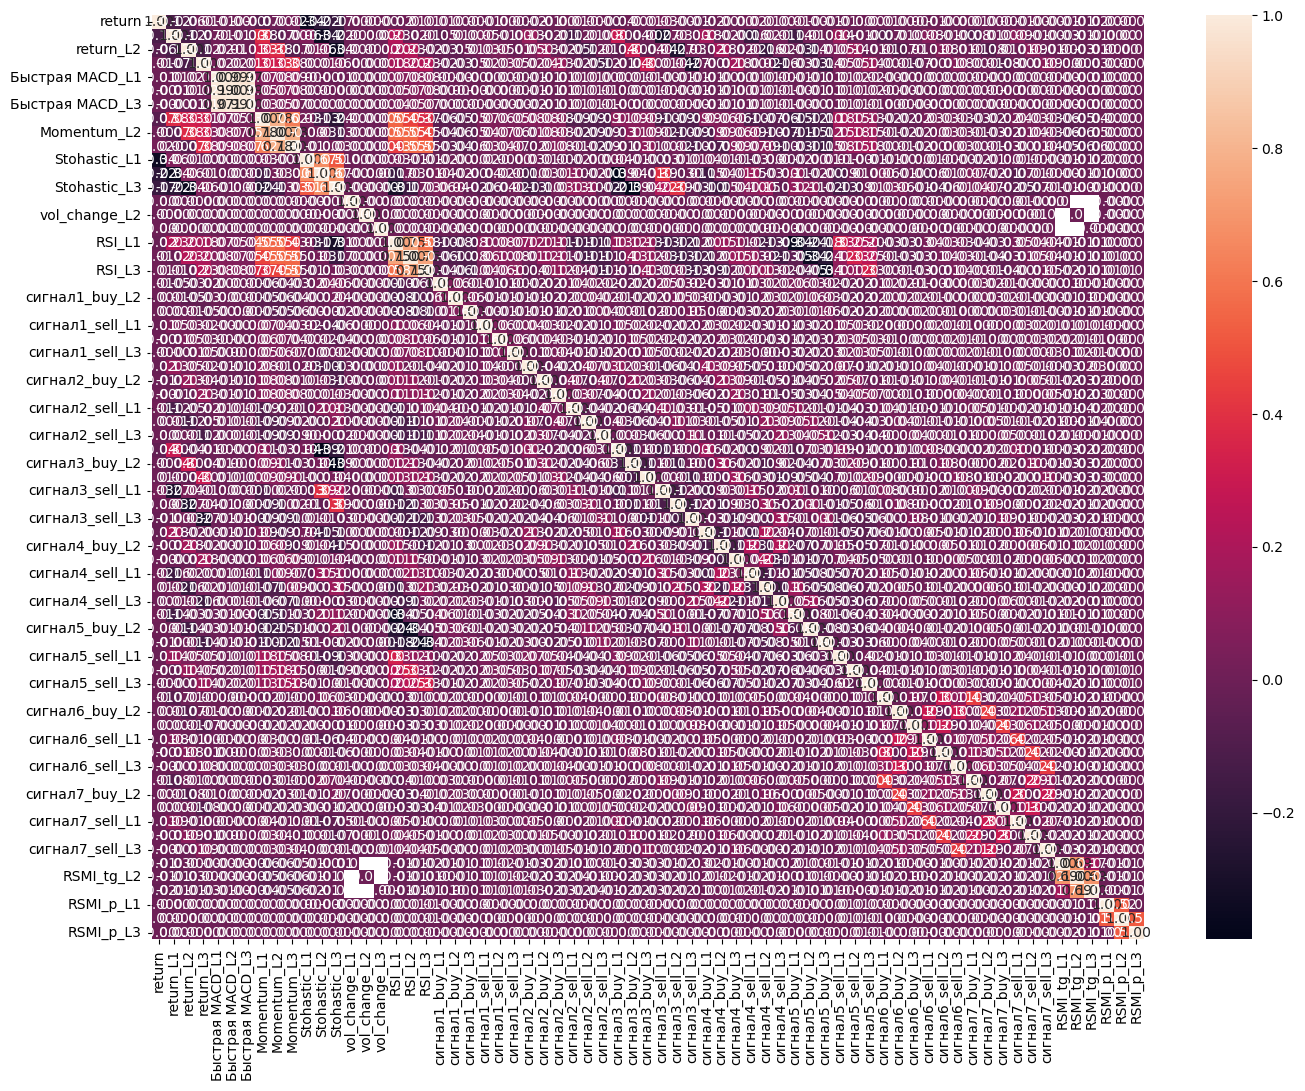

In [36]:
lagged_2022_for_corr = lagged_2022.drop(columns=['date', 'ticker'])
plt.rcParams["figure.figsize"] = (16,12)
corr = lagged_2022_for_corr.corr()
#kot = corr[corr>.6]
sns.heatmap(corr, annot=True, fmt=".2f")

# VI.I. Производим ранжирование компаний по индексу RSMI

In [37]:
# Производим ранжирование компаний по индексу RSMI
lagged_2022.groupby('ticker').agg({'RSMI_p_L1': 'sum'}).sort_values('RSMI_p_L1', ascending=False)

,RSMI_p_L1
ticker,
MGNT,26753590.0
POLY,24852959.0
YNDX,24064530.0
NVTK,21537219.0
ROSN,20863681.0
CHMF,17409217.0
ALRS,15410482.0
GAZP,13604176.0
SBER,5058750.0


## VI.II. Создание функций с моделями

In [38]:
# Датафрейм для сохранения результатов
results = pd.DataFrame()
results = pd.DataFrame(columns=['ticker', 'tp', 'algo', 'mae', 'mse', 'rmse', 'r2'])
# Функция измерения метрик моделей
def evaluate(y_true, pred, ticker, algo, tp, res=results):
    mae = metrics.mean_absolute_error(y_true, pred)
    mse = metrics.mean_squared_error(y_true, pred)
    rmse = metrics.mean_squared_error(y_true, pred, squared=False)
    r2 = metrics.r2_score(y_true, pred)
    results.loc[len(results)] = [ticker, tp, algo, mae, mse, rmse, r2]
    
# Регрессия Лассо
def Lasso_model(X_train, y_train, X_test, y_test, ticker):
    clf = Lasso().fit(X_train, y_train)
    clf_pred = clf.predict(X_test)
    evaluate(y_test, clf_pred, ticker=ticker, algo='lasso', tp='test')
    clf_pred = clf.predict(X_train)
    evaluate(y_train, clf_pred, ticker=ticker, algo='lasso',  tp='train')

# Random Forest Regressor
def RFR(X_train, y_train, X_test, y_test, ticker):
    rfr = RandomForestRegressor(random_state=0).fit(X_train, y_train)
    rfr_pred = rfr.predict(X_test)
    evaluate(y_test, rfr_pred, ticker, algo='rfr', tp='test')
    rfr_pred = rfr.predict(X_train)
    evaluate(y_train, rfr_pred, ticker, algo='rfr', tp='train')

# Gradient Boosting Regressor
def GBR(X_train, y_train, X_test, y_test, ticker):
    gbr = GradientBoostingRegressor(random_state=0).fit(X_train, y_train)
    gbr_pred = gbr.predict(X_test)
    evaluate(y_test, gbr_pred, ticker, algo='gbr',  tp='test')
    gbr_pred = gbr.predict(X_train)
    evaluate(y_train, gbr_pred,  ticker, algo='gbr', tp='train')

# Функция автоматической проверки моделей из списка: Gradient Boosting, Neural Networks, CatBoost, XGBoost, RF, XT, KNN, LR
def autoML(data, ticker):
    df_train, df_tes = train_test_split(data.drop(columns = ['ticker', 'date']), test_size=0.33, random_state=42)
    train_df = df_train #.drop(columns=['date','ticker'])
    test_df = df_tes #.drop(columns=['date','ticker'])

    hyperparameters_dict = {
        'GBM':{},
        #'NN': {},
        'CAT':{},
        'XGB':{},
        'RF':{},
        'XT':{}, 
        'KNN':{},
        'LR':{}
        }

    # 1. Fit/train the models
    autogluon_predictor = TabularPredictor(label="return", eval_metric='mean_absolute_error').fit(train_data=train_df, presets='best_quality', hyperparameters=hyperparameters_dict, time_limit=None)
    # 2. Create predictions
    predictions = autogluon_predictor.predict(test_df.drop(columns='return'))
    # 3. Create the leaderboard
    autogluon_predictor.leaderboard(silent=True)
    
    #evaluate(test_df['return'], predictions, algo='wel')
    evaluate(test_df['return'], predictions, ticker, algo='wel',  tp='test')
    predictions = autogluon_predictor.predict(train_df.drop(columns='return'))
    evaluate(train_df['return'], predictions, ticker,  algo='wel', tp='train')
    best_model = autogluon_predictor.get_model_best()
    print(best_model)

# XGBoost
def XG(X_train, y_train, X_test, y_test, ticker):

    #Convert the training and testing data to DMatrix format
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)

    # Set the parameters for XGBoost
    params = {
        'objective': 'reg:squarederror',  # Regression task with squared error loss
        'eta': 0.1,  # Learning rate
        'max_depth': 5,  # Maximum depth of each tree
        'min_child_weight': 1,  # Minimum sum of instance weight needed in a child
        'colsample_bytree': 0.8,  # Subsample ratio of columns when constructing each tree
        'subsample': 0.8,  # Subsample ratio of the training instance
        'gamma': 0,  # Minimum loss reduction required to make a further partition on a leaf node
        'verbose_eval': True  # Print evaluation results on each iteration
    }

    # Train the XGBoost model
    num_rounds = 100  # Number of boosting iterations
    model = xgb.train(params, dtrain, num_rounds)

    # Make predictions on the testing set
    y_pred = model.predict(dtest)
    #evaluate(y_test,y_pred, algo='xg')
    evaluate(y_test, y_pred, ticker, algo='xg',  tp='test')
    y_pred = model.predict(dtrain)
    evaluate(y_train, y_pred, ticker, algo='xg',  tp='train')

# LSTM model
def LSTM_model(data, ticker):
    #Extract the features and target variable
    X = data.drop(columns=['return', 'date', 'ticker'])
    y = data['return']

    features = X
    target = y

    # Normalize the features and target variable
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_features = scaler.fit_transform(features)
    scaled_target = scaler.fit_transform(np.array(target).reshape(-1, 1))

    # Split the data into training and testing sets
    train_size = int(len(X) * 0.8)  # 80% for training, 20% for testing
    train_features = scaled_features[:train_size]
    train_target = scaled_target[:train_size]
    test_features = scaled_features[train_size:]
    test_target = scaled_target[train_size:]

    # Reshape the data for LSTM input (samples, time steps, features)
    train_features = np.reshape(train_features, (train_features.shape[0], 1, train_features.shape[1]))
    test_features = np.reshape(test_features, (test_features.shape[0], 1, test_features.shape[1]))

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(50, input_shape=(1, X.shape[1])))  # 50 units in the LSTM layer
    model.add(Dense(1))  # Output layer

    # Compile the model
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Train the model
    model.fit(train_features, train_target, epochs=10, batch_size=32)

    # Make predictions on the test set
    predicted_target = model.predict(test_features)

    # Inverse transform the predictions
    predicted_target = scaler.inverse_transform(predicted_target)

    #evaluate(np.array(target[train_size:]), predicted_target, algo='LSTM')
    
    evaluate(np.array(target[train_size:]), predicted_target, ticker, algo='lstm',  tp='test')
    predicted_target = model.predict(train_features)
    predicted_target = scaler.inverse_transform(predicted_target)
    evaluate(np.array(target[:train_size]), predicted_target, ticker, algo='lstm',  tp='train')

## VI.III. Обучение и тестирование моделей c индексом RSMI
В обучающую выборку попадают 77% наблюдений за 2022 год по каждому тикеру. В тестовую - оставшиеся 33%.

In [39]:
ticker_list = lagged_2022['ticker'].unique().tolist()

# If you need the result to be sorted:
ticker_list.sort()

#TODO: С помощью данной строки можно выбрать отдельные компании для построения моеделей только по ним
#ticker_list = ['NVTK','NKNCP','TGKA','LIFE','TATNP','PIKK','VTBR','NLMK','KAZT','SELG','APTK','CBOM','KZOS','UNAC','DSKY','FEES','SBER','YNDX','LSRG','SFIN','KZOSP','BSPB','SNGSP','MTLRP','RTKMP','NMTP','MVID','GAZP','PHOR']

results = pd.DataFrame()
results = pd.DataFrame(columns=['ticker', 'tp', 'algo', 'mae', 'mse', 'rmse', 'r2'])
for ticker in ticker_list:
    #ticker = 'SBER'
    data = lagged_2022.loc[lagged_2022['ticker'] == ticker]
    data = data.fillna(0)
    #cols = list(range(51,57))
    #data.drop(data.columns[cols],axis=1,inplace=True)
    X = data.drop(columns=['return', 'date', 'ticker'])
    y = data['return']
    scaler = MinMaxScaler(feature_range=(0, 1))
    X = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    Lasso_model(X_train, y_train, X_test, y_test, ticker)
    RFR(X_train, y_train, X_test, y_test, ticker)
    GBR(X_train, y_train, X_test, y_test, ticker)
    autoML(data, ticker)
    XG(X_train, y_train, X_test, y_test, ticker)
    LSTM_model(data, ticker)
results

No path specified. Models will be saved in: "AutogluonModels\ag-20240329_225327"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240329_225327"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   231.52 GB / 510.93 GB (45.3%)
Train Data Rows:    7626
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.2206533544991227, -0.1873789541639766, 0.00015, 0.00907)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', '

WeightedEnsemble_L3
[02:03:38] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
285/285 [==============================] - 8s 7ms/step - loss: 0.0094
Epoch 2/10
285/285 [==============================] - 2s 8ms/step - loss: 4.2414e-04
Epoch 3/10
285/285 [==============================] - 2s 7ms/step - loss: 3.5531e-04
Epoch 4/10
285/285 [==============================] - 2s 6ms/step - loss: 3.2164e-04
Epoch 5/10
285/285 [==============================] - 2s 7ms/step - loss: 3.0224e-04
Epoch 6/10
285/285 [==============================] - 2s 8ms/step - loss: 2.9367e-04
Epoch 7/10
285/285 [==============================] - 1s 5ms/step - loss: 2.8707e-04
Epoch 8/10
285/285 [==============================] - 1s 4ms/step - loss: 2.8345e-04
Epoch 9/10
285/285 [==============================] - 1s 4ms/step - loss: 2.8196e-04
Epoch 10/10
285/285 [==============================] - 1s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240329_230605"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240329_230605"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   230.65 GB / 510.93 GB (45.1%)
Train Data Rows:    7720
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.130722891566265, -0.2323688969258589, -0.00017, 0.00791)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', '

WeightedEnsemble_L2
[02:15:29] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
289/289 [==============================] - 6s 6ms/step - loss: 0.0077
Epoch 2/10
289/289 [==============================] - 2s 6ms/step - loss: 2.6527e-04
Epoch 3/10
289/289 [==============================] - 2s 7ms/step - loss: 1.8071e-04
Epoch 4/10
289/289 [==============================] - 2s 7ms/step - loss: 1.4799e-04
Epoch 5/10
289/289 [==============================] - 2s 6ms/step - loss: 1.3513e-04
Epoch 6/10
289/289 [==============================] - 1s 4ms/step - loss: 1.2858e-04
Epoch 7/10
289/289 [==============================] - 1s 4ms/step - loss: 1.2383e-04
Epoch 8/10
289/289 [==============================] - 1s 4ms/step - loss: 1.2427e-04
Epoch 9/10
289/289 [==============================] - 1s 3ms/step - loss: 1.1900e-04
Epoch 10/10
289/289 [==============================] - 0s 1ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240329_231710"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240329_231710"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   229.80 GB / 510.93 GB (45.0%)
Train Data Rows:    5913
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.280244805009963, -0.1469825990373935, 0.00024, 0.00889)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'm

WeightedEnsemble_L3
[02:24:19] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
221/221 [==============================] - 3s 4ms/step - loss: 0.0103
Epoch 2/10
221/221 [==============================] - 1s 3ms/step - loss: 3.7976e-04
Epoch 3/10
221/221 [==============================] - 1s 4ms/step - loss: 2.6090e-04
Epoch 4/10
221/221 [==============================] - 1s 3ms/step - loss: 2.3436e-04
Epoch 5/10
221/221 [==============================] - 1s 3ms/step - loss: 2.2568e-04
Epoch 6/10
221/221 [==============================] - 1s 4ms/step - loss: 2.1991e-04
Epoch 7/10
221/221 [==============================] - 1s 4ms/step - loss: 2.1473e-04
Epoch 8/10
221/221 [==============================] - 1s 3ms/step - loss: 2.1310e-04
Epoch 9/10
221/221 [==============================] - 1s 4ms/step - loss: 2.1056e-04
Epoch 10/10
221/221 [==============================] - 0s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240329_232554"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240329_232554"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   229.19 GB / 510.93 GB (44.9%)
Train Data Rows:    7720
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.0769903762029746, -0.2326330999221961, -0.00011, 0.00786)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 

WeightedEnsemble_L2
[02:31:34] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
289/289 [==============================] - 3s 3ms/step - loss: 0.0102
Epoch 2/10
289/289 [==============================] - 1s 3ms/step - loss: 3.0072e-04
Epoch 3/10
289/289 [==============================] - 1s 3ms/step - loss: 2.4277e-04
Epoch 4/10
289/289 [==============================] - 1s 3ms/step - loss: 2.1660e-04
Epoch 5/10
289/289 [==============================] - 1s 3ms/step - loss: 2.0140e-04
Epoch 6/10
289/289 [==============================] - 1s 3ms/step - loss: 1.9097e-04
Epoch 7/10
289/289 [==============================] - 1s 3ms/step - loss: 1.7958e-04
Epoch 8/10
289/289 [==============================] - 1s 3ms/step - loss: 1.7323e-04
Epoch 9/10
289/289 [==============================] - 1s 3ms/step - loss: 1.7359e-04
Epoch 10/10
289/289 [==============================] - 0s 1ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240329_233236"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240329_233236"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   228.30 GB / 510.93 GB (44.7%)
Train Data Rows:    5818
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.2025205158264948, -0.2358078602620087, 0.00029, 0.01302)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', '

WeightedEnsemble_L2
[02:36:30] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
218/218 [==============================] - 3s 3ms/step - loss: 0.0184
Epoch 2/10
218/218 [==============================] - 1s 3ms/step - loss: 9.8651e-04
Epoch 3/10
218/218 [==============================] - 1s 3ms/step - loss: 7.3449e-04
Epoch 4/10
218/218 [==============================] - 1s 3ms/step - loss: 6.7454e-04
Epoch 5/10
218/218 [==============================] - 1s 3ms/step - loss: 6.4429e-04
Epoch 6/10
218/218 [==============================] - 1s 3ms/step - loss: 6.3949e-04
Epoch 7/10
218/218 [==============================] - 1s 3ms/step - loss: 6.0893e-04
Epoch 8/10
218/218 [==============================] - 1s 3ms/step - loss: 6.0136e-04
Epoch 9/10
218/218 [==============================] - 1s 3ms/step - loss: 5.9096e-04
Epoch 10/10
218/218 [==============================] - 0s 1ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240329_233738"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240329_233738"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   227.66 GB / 510.93 GB (44.6%)
Train Data Rows:    5920
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.2955643390425999, -0.321748532591906, 0.00018, 0.01049)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'm

WeightedEnsemble_L2
[02:41:50] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
221/221 [==============================] - 3s 3ms/step - loss: 0.0159
Epoch 2/10
221/221 [==============================] - 1s 3ms/step - loss: 4.8612e-04
Epoch 3/10
221/221 [==============================] - 1s 3ms/step - loss: 3.1505e-04
Epoch 4/10
221/221 [==============================] - 1s 3ms/step - loss: 2.6599e-04
Epoch 5/10
221/221 [==============================] - 1s 3ms/step - loss: 2.3846e-04
Epoch 6/10
221/221 [==============================] - 1s 3ms/step - loss: 2.1904e-04
Epoch 7/10
221/221 [==============================] - 1s 3ms/step - loss: 2.0708e-04
Epoch 8/10
221/221 [==============================] - 1s 3ms/step - loss: 1.9746e-04
Epoch 9/10
221/221 [==============================] - 1s 3ms/step - loss: 1.9226e-04
Epoch 10/10
221/221 [==============================] - 0s 1ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240329_234243"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240329_234243"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   226.99 GB / 510.93 GB (44.4%)
Train Data Rows:    5453
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.3810316139767056, -0.140997830802603, 0.00035, 0.01395)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'm

WeightedEnsemble_L3
[02:46:26] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
204/204 [==============================] - 2s 2ms/step - loss: 0.0127
Epoch 2/10
204/204 [==============================] - 1s 3ms/step - loss: 7.0187e-04
Epoch 3/10
204/204 [==============================] - 1s 3ms/step - loss: 5.5220e-04
Epoch 4/10
204/204 [==============================] - 1s 3ms/step - loss: 5.0111e-04
Epoch 5/10
204/204 [==============================] - 1s 3ms/step - loss: 4.6869e-04
Epoch 6/10
204/204 [==============================] - 1s 3ms/step - loss: 4.5166e-04
Epoch 7/10
204/204 [==============================] - 1s 3ms/step - loss: 4.3798e-04
Epoch 8/10
204/204 [==============================] - 1s 3ms/step - loss: 4.3084e-04
Epoch 9/10
204/204 [==============================] - 1s 3ms/step - loss: 4.1784e-04
Epoch 10/10
204/204 [==============================] - 0s 1ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240329_234732"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240329_234732"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   226.40 GB / 510.93 GB (44.3%)
Train Data Rows:    5920
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.7856093979441998, -0.25, 2e-05, 0.01261)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 're

WeightedEnsemble_L2
[02:51:52] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
221/221 [==============================] - 3s 3ms/step - loss: 0.0075
Epoch 2/10
221/221 [==============================] - 1s 3ms/step - loss: 1.4761e-04
Epoch 3/10
221/221 [==============================] - 1s 3ms/step - loss: 1.0007e-04
Epoch 4/10
221/221 [==============================] - 1s 3ms/step - loss: 7.9716e-05
Epoch 5/10
221/221 [==============================] - 1s 3ms/step - loss: 6.4891e-05
Epoch 6/10
221/221 [==============================] - 1s 3ms/step - loss: 5.4211e-05
Epoch 7/10
221/221 [==============================] - 1s 4ms/step - loss: 4.5077e-05
Epoch 8/10
221/221 [==============================] - 1s 3ms/step - loss: 3.9205e-05
Epoch 9/10
221/221 [==============================] - 1s 3ms/step - loss: 3.4881e-05
Epoch 10/10
221/221 [==============================] - 0s 1ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240329_235250"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240329_235250"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   225.74 GB / 510.93 GB (44.2%)
Train Data Rows:    5512
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.397911227154047, -0.2702847931219774, 0.00048, 0.01565)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'm

WeightedEnsemble_L3
[02:56:43] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
206/206 [==============================] - 3s 3ms/step - loss: 0.0109
Epoch 2/10
206/206 [==============================] - 1s 3ms/step - loss: 7.9453e-04
Epoch 3/10
206/206 [==============================] - 1s 3ms/step - loss: 6.6737e-04
Epoch 4/10
206/206 [==============================] - 1s 3ms/step - loss: 6.3485e-04
Epoch 5/10
206/206 [==============================] - 1s 3ms/step - loss: 6.1460e-04
Epoch 6/10
206/206 [==============================] - 1s 3ms/step - loss: 5.9297e-04
Epoch 7/10
206/206 [==============================] - 1s 3ms/step - loss: 5.7981e-04
Epoch 8/10
206/206 [==============================] - 1s 3ms/step - loss: 5.7624e-04
Epoch 9/10
206/206 [==============================] - 1s 3ms/step - loss: 5.6272e-04
Epoch 10/10
206/206 [==============================] - 0s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240329_235752"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240329_235752"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   225.13 GB / 510.93 GB (44.1%)
Train Data Rows:    5920
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.1158970615075745, -0.2118876327509421, 0.00015, 0.00878)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', '

WeightedEnsemble_L3
[03:02:06] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
221/221 [==============================] - 3s 3ms/step - loss: 0.0069
Epoch 2/10
221/221 [==============================] - 1s 3ms/step - loss: 1.9149e-04
Epoch 3/10
221/221 [==============================] - 1s 3ms/step - loss: 1.5125e-04
Epoch 4/10
221/221 [==============================] - 1s 3ms/step - loss: 1.3879e-04
Epoch 5/10
221/221 [==============================] - 1s 3ms/step - loss: 1.2867e-04
Epoch 6/10
221/221 [==============================] - 1s 3ms/step - loss: 1.2430e-04
Epoch 7/10
221/221 [==============================] - 1s 3ms/step - loss: 1.1841e-04
Epoch 8/10
221/221 [==============================] - 1s 3ms/step - loss: 1.1556e-04
Epoch 9/10
221/221 [==============================] - 1s 3ms/step - loss: 1.1204e-04
Epoch 10/10
221/221 [==============================] - 0s 1ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_000325"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_000325"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   224.46 GB / 510.93 GB (43.9%)
Train Data Rows:    7626
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.08229528282622, -0.1064016883573688, 5e-05, 0.00495)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'mult

WeightedEnsemble_L3
[03:08:24] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
285/285 [==============================] - 3s 3ms/step - loss: 0.0150
Epoch 2/10
285/285 [==============================] - 1s 3ms/step - loss: 6.1237e-04
Epoch 3/10
285/285 [==============================] - 1s 3ms/step - loss: 5.3449e-04
Epoch 4/10
285/285 [==============================] - 1s 3ms/step - loss: 5.0427e-04
Epoch 5/10
285/285 [==============================] - 1s 3ms/step - loss: 4.8351e-04
Epoch 6/10
285/285 [==============================] - 1s 3ms/step - loss: 4.7234e-04
Epoch 7/10
285/285 [==============================] - 1s 3ms/step - loss: 4.6096e-04
Epoch 8/10
285/285 [==============================] - 1s 3ms/step - loss: 4.6016e-04
Epoch 9/10
285/285 [==============================] - 1s 3ms/step - loss: 4.5290e-04
Epoch 10/10
285/285 [==============================] - 0s 1ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_000954"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_000954"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   223.38 GB / 510.93 GB (43.7%)
Train Data Rows:    7720
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.1013773222293403, -0.1341423417513938, -4e-05, 0.00694)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'm

WeightedEnsemble_L3
[03:15:05] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
289/289 [==============================] - 3s 3ms/step - loss: 0.0057
Epoch 2/10
289/289 [==============================] - 1s 3ms/step - loss: 2.4087e-04
Epoch 3/10
289/289 [==============================] - 1s 3ms/step - loss: 2.1052e-04
Epoch 4/10
289/289 [==============================] - 1s 3ms/step - loss: 1.9676e-04
Epoch 5/10
289/289 [==============================] - 1s 3ms/step - loss: 1.8810e-04
Epoch 6/10
289/289 [==============================] - 1s 3ms/step - loss: 1.7990e-04
Epoch 7/10
289/289 [==============================] - 1s 3ms/step - loss: 1.8101e-04
Epoch 8/10
289/289 [==============================] - 1s 3ms/step - loss: 1.7590e-04
Epoch 9/10
289/289 [==============================] - 1s 3ms/step - loss: 1.7639e-04
Epoch 10/10
289/289 [==============================] - 0s 1ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_001642"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_001642"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   222.51 GB / 510.93 GB (43.5%)
Train Data Rows:    7626
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.4388617163183637, -0.4319272543571609, 0.0001, 0.01113)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'm

WeightedEnsemble_L3
[03:22:35] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
285/285 [==============================] - 3s 3ms/step - loss: 0.0110
Epoch 2/10
285/285 [==============================] - 1s 3ms/step - loss: 1.9533e-04
Epoch 3/10
285/285 [==============================] - 1s 3ms/step - loss: 1.3177e-04
Epoch 4/10
285/285 [==============================] - 1s 3ms/step - loss: 1.0995e-04
Epoch 5/10
285/285 [==============================] - 1s 4ms/step - loss: 9.3125e-05
Epoch 6/10
285/285 [==============================] - 1s 3ms/step - loss: 8.0234e-05
Epoch 7/10
285/285 [==============================] - 1s 3ms/step - loss: 7.1058e-05
Epoch 8/10
285/285 [==============================] - 1s 3ms/step - loss: 6.4392e-05
Epoch 9/10
285/285 [==============================] - 1s 3ms/step - loss: 6.0154e-05
Epoch 10/10
285/285 [==============================] - 0s 1ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_002342"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_002342"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   221.65 GB / 510.93 GB (43.4%)
Train Data Rows:    5920
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.2629258517034067, -0.2293549392334061, -4e-05, 0.00876)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'm

WeightedEnsemble_L3
[03:27:50] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
221/221 [==============================] - 3s 3ms/step - loss: 0.0115
Epoch 2/10
221/221 [==============================] - 1s 3ms/step - loss: 3.0241e-04
Epoch 3/10
221/221 [==============================] - 1s 3ms/step - loss: 2.0798e-04
Epoch 4/10
221/221 [==============================] - 1s 3ms/step - loss: 1.7469e-04
Epoch 5/10
221/221 [==============================] - 1s 3ms/step - loss: 1.5459e-04
Epoch 6/10
221/221 [==============================] - 1s 3ms/step - loss: 1.3824e-04
Epoch 7/10
221/221 [==============================] - 1s 3ms/step - loss: 1.2750e-04
Epoch 8/10
221/221 [==============================] - 1s 3ms/step - loss: 1.2038e-04
Epoch 9/10
221/221 [==============================] - 1s 3ms/step - loss: 1.1543e-04
Epoch 10/10
221/221 [==============================] - 0s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_002923"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_002923"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   220.99 GB / 510.93 GB (43.3%)
Train Data Rows:    7692
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.2967491798389503, -0.2548888888888889, -4e-05, 0.00828)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'm

WeightedEnsemble_L3
[03:35:04] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
287/287 [==============================] - 2s 2ms/step - loss: 0.0091
Epoch 2/10
287/287 [==============================] - 1s 3ms/step - loss: 2.5329e-04
Epoch 3/10
287/287 [==============================] - 1s 3ms/step - loss: 1.7339e-04
Epoch 4/10
287/287 [==============================] - 1s 2ms/step - loss: 1.3747e-04
Epoch 5/10
287/287 [==============================] - 1s 3ms/step - loss: 1.1785e-04
Epoch 6/10
287/287 [==============================] - 1s 3ms/step - loss: 1.0944e-04
Epoch 7/10
287/287 [==============================] - 1s 3ms/step - loss: 1.0609e-04
Epoch 8/10
287/287 [==============================] - 1s 2ms/step - loss: 1.0125e-04
Epoch 9/10
287/287 [==============================] - 1s 3ms/step - loss: 1.0040e-04
Epoch 10/10
287/287 [==============================] - 0s 1ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_003609"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_003609"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   220.14 GB / 510.93 GB (43.1%)
Train Data Rows:    5816
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.2169811320754717, -0.2719836400817995, 0.00013, 0.01318)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', '

WeightedEnsemble_L3
[03:40:15] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
217/217 [==============================] - 2s 2ms/step - loss: 0.0191
Epoch 2/10
217/217 [==============================] - 1s 3ms/step - loss: 7.5035e-04
Epoch 3/10
217/217 [==============================] - 1s 3ms/step - loss: 5.6668e-04
Epoch 4/10
217/217 [==============================] - 1s 3ms/step - loss: 5.2650e-04
Epoch 5/10
217/217 [==============================] - 1s 2ms/step - loss: 5.0961e-04
Epoch 6/10
217/217 [==============================] - 1s 3ms/step - loss: 5.0145e-04
Epoch 7/10
217/217 [==============================] - 1s 3ms/step - loss: 4.9196e-04
Epoch 8/10
217/217 [==============================] - 1s 3ms/step - loss: 4.8054e-04
Epoch 9/10
217/217 [==============================] - 1s 3ms/step - loss: 4.8352e-04
Epoch 10/10
217/217 [==============================] - 0s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_004155"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_004155"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   219.49 GB / 510.93 GB (43.0%)
Train Data Rows:    7720
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.2626470588235292, -0.2852530888800318, -3e-05, 0.00954)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'm

WeightedEnsemble_L3
[03:47:41] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
289/289 [==============================] - 3s 3ms/step - loss: 0.0058
Epoch 2/10
289/289 [==============================] - 1s 3ms/step - loss: 1.1913e-04
Epoch 3/10
289/289 [==============================] - 1s 3ms/step - loss: 9.4786e-05
Epoch 4/10
289/289 [==============================] - 1s 3ms/step - loss: 8.5023e-05
Epoch 5/10
289/289 [==============================] - 1s 3ms/step - loss: 7.9138e-05
Epoch 6/10
289/289 [==============================] - 1s 3ms/step - loss: 7.4070e-05
Epoch 7/10
289/289 [==============================] - 1s 3ms/step - loss: 7.0466e-05
Epoch 8/10
289/289 [==============================] - 1s 3ms/step - loss: 6.7061e-05
Epoch 9/10
289/289 [==============================] - 1s 3ms/step - loss: 6.6046e-05
Epoch 10/10
289/289 [==============================] - 0s 1ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_004919"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_004919"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   218.61 GB / 510.93 GB (42.8%)
Train Data Rows:    7720
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.0651477832512315, -0.1238770685579195, -7e-05, 0.00629)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'm

WeightedEnsemble_L3
[03:54:54] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
289/289 [==============================] - 3s 3ms/step - loss: 0.0040
Epoch 2/10
289/289 [==============================] - 1s 3ms/step - loss: 2.4759e-04
Epoch 3/10
289/289 [==============================] - 1s 3ms/step - loss: 2.0723e-04
Epoch 4/10
289/289 [==============================] - 1s 3ms/step - loss: 1.9276e-04
Epoch 5/10
289/289 [==============================] - 1s 3ms/step - loss: 1.9009e-04
Epoch 6/10
289/289 [==============================] - 1s 3ms/step - loss: 1.8604e-04
Epoch 7/10
289/289 [==============================] - 1s 3ms/step - loss: 1.8240e-04
Epoch 8/10
289/289 [==============================] - 1s 3ms/step - loss: 1.8152e-04
Epoch 9/10
289/289 [==============================] - 1s 3ms/step - loss: 1.8469e-04
Epoch 10/10
289/289 [==============================] - 0s 1ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_005632"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_005632"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   217.74 GB / 510.93 GB (42.6%)
Train Data Rows:    7720
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.0844306738962044, -0.1145259938837921, 4e-05, 0.00634)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'mu

WeightedEnsemble_L3
[04:01:50] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
289/289 [==============================] - 3s 3ms/step - loss: 0.0090
Epoch 2/10
289/289 [==============================] - 1s 3ms/step - loss: 5.1074e-04
Epoch 3/10
289/289 [==============================] - 1s 3ms/step - loss: 4.4785e-04
Epoch 4/10
289/289 [==============================] - 1s 3ms/step - loss: 4.0723e-04
Epoch 5/10
289/289 [==============================] - 1s 3ms/step - loss: 3.9236e-04
Epoch 6/10
289/289 [==============================] - 1s 3ms/step - loss: 3.8475e-04
Epoch 7/10
289/289 [==============================] - 1s 3ms/step - loss: 3.8203e-04
Epoch 8/10
289/289 [==============================] - 1s 3ms/step - loss: 3.7672e-04
Epoch 9/10
289/289 [==============================] - 1s 3ms/step - loss: 3.7768e-04
Epoch 10/10
289/289 [==============================] - 0s 1ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_010329"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_010329"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   216.87 GB / 510.93 GB (42.4%)
Train Data Rows:    7720
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.2641063515509601, -0.4485185185185185, -0.00016, 0.00964)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 

WeightedEnsemble_L3
[04:09:26] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
289/289 [==============================] - 3s 3ms/step - loss: 0.0113
Epoch 2/10
289/289 [==============================] - 1s 3ms/step - loss: 2.2576e-04
Epoch 3/10
289/289 [==============================] - 1s 3ms/step - loss: 1.4861e-04
Epoch 4/10
289/289 [==============================] - 1s 3ms/step - loss: 1.1533e-04
Epoch 5/10
289/289 [==============================] - 1s 3ms/step - loss: 9.3403e-05
Epoch 6/10
289/289 [==============================] - 1s 3ms/step - loss: 7.8945e-05
Epoch 7/10
289/289 [==============================] - 1s 3ms/step - loss: 7.0554e-05
Epoch 8/10
289/289 [==============================] - 1s 3ms/step - loss: 6.4822e-05
Epoch 9/10
289/289 [==============================] - 1s 3ms/step - loss: 6.2713e-05
Epoch 10/10
289/289 [==============================] - 0s 1ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_011029"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_011029"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   216.00 GB / 510.93 GB (42.3%)
Train Data Rows:    5638
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.3994413407821229, -0.3085714285714286, 0.00012, 0.01899)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', '

WeightedEnsemble_L3
[04:14:16] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
211/211 [==============================] - 3s 3ms/step - loss: 0.0131
Epoch 2/10
211/211 [==============================] - 1s 3ms/step - loss: 0.0011
Epoch 3/10
211/211 [==============================] - 1s 3ms/step - loss: 9.0594e-04
Epoch 4/10
211/211 [==============================] - 1s 4ms/step - loss: 8.5691e-04
Epoch 5/10
211/211 [==============================] - 1s 3ms/step - loss: 8.3115e-04
Epoch 6/10
211/211 [==============================] - 1s 3ms/step - loss: 8.0857e-04
Epoch 7/10
211/211 [==============================] - 1s 3ms/step - loss: 8.0124e-04
Epoch 8/10
211/211 [==============================] - 1s 3ms/step - loss: 7.8931e-04
Epoch 9/10
211/211 [==============================] - 1s 3ms/step - loss: 7.6977e-04
Epoch 10/10
211/211 [==============================] - 0s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_011506"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_011506"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   215.36 GB / 510.93 GB (42.2%)
Train Data Rows:    5401
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.3675862068965518, -0.3004663557628247, 0.00041, 0.01516)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', '

WeightedEnsemble_L3
[04:18:27] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
202/202 [==============================] - 3s 3ms/step - loss: 0.0145
Epoch 2/10
202/202 [==============================] - 1s 3ms/step - loss: 8.0551e-04
Epoch 3/10
202/202 [==============================] - 1s 3ms/step - loss: 6.1693e-04
Epoch 4/10
202/202 [==============================] - 1s 3ms/step - loss: 5.6316e-04
Epoch 5/10
202/202 [==============================] - 1s 3ms/step - loss: 5.3463e-04
Epoch 6/10
202/202 [==============================] - 1s 3ms/step - loss: 5.1514e-04
Epoch 7/10
202/202 [==============================] - 1s 3ms/step - loss: 4.9985e-04
Epoch 8/10
202/202 [==============================] - 1s 3ms/step - loss: 4.9229e-04
Epoch 9/10
202/202 [==============================] - 1s 3ms/step - loss: 4.7800e-04
Epoch 10/10
202/202 [==============================] - 0s 1ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_011917"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_011917"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   214.78 GB / 510.93 GB (42.0%)
Train Data Rows:    5736
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.2448559670781893, -0.1016548463356973, 0.0, 0.00989)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'mult

WeightedEnsemble_L3
[04:22:44] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
215/215 [==============================] - 3s 3ms/step - loss: 0.0116
Epoch 2/10
215/215 [==============================] - 1s 3ms/step - loss: 4.8215e-04
Epoch 3/10
215/215 [==============================] - 1s 3ms/step - loss: 3.5638e-04
Epoch 4/10
215/215 [==============================] - 1s 3ms/step - loss: 3.0893e-04
Epoch 5/10
215/215 [==============================] - 1s 3ms/step - loss: 2.8322e-04
Epoch 6/10
215/215 [==============================] - 1s 3ms/step - loss: 2.7257e-04
Epoch 7/10
215/215 [==============================] - 1s 3ms/step - loss: 2.6514e-04
Epoch 8/10
215/215 [==============================] - 1s 3ms/step - loss: 2.5946e-04
Epoch 9/10
215/215 [==============================] - 1s 3ms/step - loss: 2.5537e-04
Epoch 10/10
215/215 [==============================] - 0s 1ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_012342"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_012342"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   214.17 GB / 510.93 GB (41.9%)
Train Data Rows:    5656
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.3724381625441697, -0.3658536585365853, 0.00018, 0.01706)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', '

WeightedEnsemble_L2
[04:27:15] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
212/212 [==============================] - 2s 2ms/step - loss: 0.0172
Epoch 2/10
212/212 [==============================] - 1s 3ms/step - loss: 9.7055e-04
Epoch 3/10
212/212 [==============================] - 1s 3ms/step - loss: 7.0572e-04
Epoch 4/10
212/212 [==============================] - 1s 3ms/step - loss: 6.2390e-04
Epoch 5/10
212/212 [==============================] - 1s 3ms/step - loss: 5.9172e-04
Epoch 6/10
212/212 [==============================] - 1s 3ms/step - loss: 5.6544e-04
Epoch 7/10
212/212 [==============================] - 1s 3ms/step - loss: 5.4945e-04
Epoch 8/10
212/212 [==============================] - 1s 3ms/step - loss: 5.4834e-04
Epoch 9/10
212/212 [==============================] - 1s 3ms/step - loss: 5.3510e-04
Epoch 10/10
212/212 [==============================] - 0s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_012812"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_012812"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   213.53 GB / 510.93 GB (41.8%)
Train Data Rows:    5802
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.207142857142857, -0.3602272727272728, -2e-05, 0.0141)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'mul

WeightedEnsemble_L3
[04:31:55] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
217/217 [==============================] - 3s 3ms/step - loss: 0.0197
Epoch 2/10
217/217 [==============================] - 1s 3ms/step - loss: 7.6906e-04
Epoch 3/10
217/217 [==============================] - 1s 3ms/step - loss: 4.9118e-04
Epoch 4/10
217/217 [==============================] - 1s 3ms/step - loss: 4.1085e-04
Epoch 5/10
217/217 [==============================] - 1s 3ms/step - loss: 3.7632e-04
Epoch 6/10
217/217 [==============================] - 1s 3ms/step - loss: 3.5991e-04
Epoch 7/10
217/217 [==============================] - 1s 3ms/step - loss: 3.4468e-04
Epoch 8/10
217/217 [==============================] - 1s 3ms/step - loss: 3.3989e-04
Epoch 9/10
217/217 [==============================] - 1s 3ms/step - loss: 3.3192e-04
Epoch 10/10
217/217 [==============================] - 0s 1ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_013332"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_013332"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   212.89 GB / 510.93 GB (41.7%)
Train Data Rows:    7720
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.0767798976268032, -0.2852501624431449, -0.0001, 0.00791)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', '

WeightedEnsemble_L3
[04:39:19] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
289/289 [==============================] - 3s 3ms/step - loss: 0.0048
Epoch 2/10
289/289 [==============================] - 1s 4ms/step - loss: 1.2279e-04
Epoch 3/10
289/289 [==============================] - 1s 4ms/step - loss: 9.6141e-05
Epoch 4/10
289/289 [==============================] - 1s 4ms/step - loss: 8.0802e-05
Epoch 5/10
289/289 [==============================] - 1s 4ms/step - loss: 7.1145e-05
Epoch 6/10
289/289 [==============================] - 1s 4ms/step - loss: 6.4664e-05
Epoch 7/10
289/289 [==============================] - 1s 3ms/step - loss: 6.0689e-05
Epoch 8/10
289/289 [==============================] - 1s 3ms/step - loss: 5.8146e-05
Epoch 9/10
289/289 [==============================] - 1s 3ms/step - loss: 5.6835e-05
Epoch 10/10
289/289 [==============================] - 0s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_014023"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_014023"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   212.03 GB / 510.93 GB (41.5%)
Train Data Rows:    5667
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.2323529411764706, -0.1675996048732301, 0.00014, 0.00857)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', '

WeightedEnsemble_L3
[04:44:08] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
212/212 [==============================] - 3s 3ms/step - loss: 0.0099
Epoch 2/10
212/212 [==============================] - 1s 3ms/step - loss: 5.0112e-04
Epoch 3/10
212/212 [==============================] - 1s 3ms/step - loss: 4.1539e-04
Epoch 4/10
212/212 [==============================] - 1s 3ms/step - loss: 3.8670e-04
Epoch 5/10
212/212 [==============================] - 1s 3ms/step - loss: 3.7201e-04
Epoch 6/10
212/212 [==============================] - 1s 3ms/step - loss: 3.5192e-04
Epoch 7/10
212/212 [==============================] - 1s 3ms/step - loss: 3.4319e-04
Epoch 8/10
212/212 [==============================] - 1s 3ms/step - loss: 3.3281e-04
Epoch 9/10
212/212 [==============================] - 1s 3ms/step - loss: 3.2314e-04
Epoch 10/10
212/212 [==============================] - 0s 1ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_014527"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_014527"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   211.39 GB / 510.93 GB (41.4%)
Train Data Rows:    7169
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.3930348258706468, -0.1832588378707842, 1e-05, 0.00916)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'mu

WeightedEnsemble_L3
[04:50:15] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
268/268 [==============================] - 3s 3ms/step - loss: 0.0042
Epoch 2/10
268/268 [==============================] - 1s 3ms/step - loss: 1.5364e-04
Epoch 3/10
268/268 [==============================] - 1s 3ms/step - loss: 1.2536e-04
Epoch 4/10
268/268 [==============================] - 1s 3ms/step - loss: 1.1140e-04
Epoch 5/10
268/268 [==============================] - 1s 3ms/step - loss: 1.0328e-04
Epoch 6/10
268/268 [==============================] - 1s 3ms/step - loss: 9.9625e-05
Epoch 7/10
268/268 [==============================] - 1s 3ms/step - loss: 9.4656e-05
Epoch 8/10
268/268 [==============================] - 1s 3ms/step - loss: 9.2181e-05
Epoch 9/10
268/268 [==============================] - 1s 3ms/step - loss: 9.0801e-05
Epoch 10/10
268/268 [==============================] - 0s 1ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_015147"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_015147"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   210.63 GB / 510.93 GB (41.2%)
Train Data Rows:    7626
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.4775910364145657, -0.1284467713787085, 7e-05, 0.00897)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'mu

WeightedEnsemble_L2
[04:56:50] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
285/285 [==============================] - 3s 3ms/step - loss: 0.0033
Epoch 2/10
285/285 [==============================] - 1s 3ms/step - loss: 1.2475e-04
Epoch 3/10
285/285 [==============================] - 1s 3ms/step - loss: 9.8426e-05
Epoch 4/10
285/285 [==============================] - 1s 3ms/step - loss: 8.6418e-05
Epoch 5/10
285/285 [==============================] - 1s 3ms/step - loss: 7.8548e-05
Epoch 6/10
285/285 [==============================] - 1s 3ms/step - loss: 7.5012e-05
Epoch 7/10
285/285 [==============================] - 1s 3ms/step - loss: 7.3254e-05
Epoch 8/10
285/285 [==============================] - 1s 3ms/step - loss: 7.1259e-05
Epoch 9/10
285/285 [==============================] - 1s 3ms/step - loss: 7.1638e-05
Epoch 10/10
285/285 [==============================] - 0s 1ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_015827"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_015827"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   209.78 GB / 510.93 GB (41.1%)
Train Data Rows:    7720
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.1594153636981645, -0.2326764144945963, 1e-05, 0.00789)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'mu

WeightedEnsemble_L2
[05:03:44] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
289/289 [==============================] - 3s 3ms/step - loss: 0.0090
Epoch 2/10
289/289 [==============================] - 1s 3ms/step - loss: 2.1695e-04
Epoch 3/10
289/289 [==============================] - 1s 3ms/step - loss: 1.7490e-04
Epoch 4/10
289/289 [==============================] - 1s 3ms/step - loss: 1.5668e-04
Epoch 5/10
289/289 [==============================] - 1s 3ms/step - loss: 1.4502e-04
Epoch 6/10
289/289 [==============================] - 1s 3ms/step - loss: 1.3695e-04
Epoch 7/10
289/289 [==============================] - 1s 3ms/step - loss: 1.2920e-04
Epoch 8/10
289/289 [==============================] - 1s 3ms/step - loss: 1.2768e-04
Epoch 9/10
289/289 [==============================] - 1s 3ms/step - loss: 1.2161e-04
Epoch 10/10
289/289 [==============================] - 0s 1ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_020440"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_020440"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   208.92 GB / 510.93 GB (40.9%)
Train Data Rows:    5896
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.1477732793522266, -0.2358870967741935, -2e-05, 0.00972)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'm

WeightedEnsemble_L3
[05:08:19] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
220/220 [==============================] - 2s 2ms/step - loss: 0.0089
Epoch 2/10
220/220 [==============================] - 1s 3ms/step - loss: 3.2126e-04
Epoch 3/10
220/220 [==============================] - 1s 2ms/step - loss: 2.1513e-04
Epoch 4/10
220/220 [==============================] - 1s 3ms/step - loss: 1.7881e-04
Epoch 5/10
220/220 [==============================] - 1s 2ms/step - loss: 1.5730e-04
Epoch 6/10
220/220 [==============================] - 1s 3ms/step - loss: 1.4328e-04
Epoch 7/10
220/220 [==============================] - 1s 3ms/step - loss: 1.3734e-04
Epoch 8/10
220/220 [==============================] - 1s 3ms/step - loss: 1.3091e-04
Epoch 9/10
220/220 [==============================] - 1s 3ms/step - loss: 1.2982e-04
Epoch 10/10
220/220 [==============================] - 0s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_020953"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_020953"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   208.29 GB / 510.93 GB (40.8%)
Train Data Rows:    7720
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.0667391304347826, -0.2140074030781219, -8e-05, 0.00645)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'm

WeightedEnsemble_L3
[05:15:17] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
289/289 [==============================] - 3s 3ms/step - loss: 0.0091
Epoch 2/10
289/289 [==============================] - 1s 3ms/step - loss: 2.3224e-04
Epoch 3/10
289/289 [==============================] - 1s 3ms/step - loss: 1.8002e-04
Epoch 4/10
289/289 [==============================] - 1s 3ms/step - loss: 1.5764e-04
Epoch 5/10
289/289 [==============================] - 1s 3ms/step - loss: 1.4393e-04
Epoch 6/10
289/289 [==============================] - 1s 3ms/step - loss: 1.3294e-04
Epoch 7/10
289/289 [==============================] - 1s 3ms/step - loss: 1.2895e-04
Epoch 8/10
289/289 [==============================] - 1s 3ms/step - loss: 1.2694e-04
Epoch 9/10
289/289 [==============================] - 1s 3ms/step - loss: 1.2038e-04
Epoch 10/10
289/289 [==============================] - 0s 1ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_021618"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_021618"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   207.41 GB / 510.93 GB (40.6%)
Train Data Rows:    5918
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.3075291622481444, -0.2329896907216494, 3e-05, 0.00915)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'mu

WeightedEnsemble_L3
[05:20:02] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
221/221 [==============================] - 3s 3ms/step - loss: 0.0098
Epoch 2/10
221/221 [==============================] - 1s 3ms/step - loss: 2.4379e-04
Epoch 3/10
221/221 [==============================] - 1s 3ms/step - loss: 1.8191e-04
Epoch 4/10
221/221 [==============================] - 1s 3ms/step - loss: 1.6425e-04
Epoch 5/10
221/221 [==============================] - 1s 3ms/step - loss: 1.5274e-04
Epoch 6/10
221/221 [==============================] - 1s 3ms/step - loss: 1.4402e-04
Epoch 7/10
221/221 [==============================] - 1s 3ms/step - loss: 1.4083e-04
Epoch 8/10
221/221 [==============================] - 1s 3ms/step - loss: 1.3205e-04
Epoch 9/10
221/221 [==============================] - 1s 3ms/step - loss: 1.2937e-04
Epoch 10/10
221/221 [==============================] - 0s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_022103"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_022103"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   206.76 GB / 510.93 GB (40.5%)
Train Data Rows:    5920
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.0924683072334078, -0.1675338189386056, 4e-05, 0.00777)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'mu

WeightedEnsemble_L3
[05:25:03] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
221/221 [==============================] - 3s 4ms/step - loss: 0.0203
Epoch 2/10
221/221 [==============================] - 1s 4ms/step - loss: 8.0399e-04
Epoch 3/10
221/221 [==============================] - 1s 4ms/step - loss: 5.9340e-04
Epoch 4/10
221/221 [==============================] - 1s 5ms/step - loss: 5.3257e-04
Epoch 5/10
221/221 [==============================] - 1s 4ms/step - loss: 4.9638e-04
Epoch 6/10
221/221 [==============================] - 1s 4ms/step - loss: 4.7522e-04
Epoch 7/10
221/221 [==============================] - 1s 4ms/step - loss: 4.5512e-04
Epoch 8/10
221/221 [==============================] - 1s 4ms/step - loss: 4.4065e-04
Epoch 9/10
221/221 [==============================] - 1s 4ms/step - loss: 4.3275e-04
Epoch 10/10
221/221 [==============================] - 0s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_022602"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_022602"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   206.09 GB / 510.93 GB (40.3%)
Train Data Rows:    5735
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.3817427385892118, -0.2839036755386565, 4e-05, 0.0118)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'mul

WeightedEnsemble_L2
[05:29:28] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
214/214 [==============================] - 2s 2ms/step - loss: 0.0101
Epoch 2/10
214/214 [==============================] - 1s 2ms/step - loss: 3.3441e-04
Epoch 3/10
214/214 [==============================] - 1s 3ms/step - loss: 2.5321e-04
Epoch 4/10
214/214 [==============================] - 1s 3ms/step - loss: 2.2879e-04
Epoch 5/10
214/214 [==============================] - 1s 2ms/step - loss: 2.1623e-04
Epoch 6/10
214/214 [==============================] - 1s 3ms/step - loss: 2.0676e-04
Epoch 7/10
214/214 [==============================] - 1s 2ms/step - loss: 1.9702e-04
Epoch 8/10
214/214 [==============================] - 1s 3ms/step - loss: 1.9092e-04
Epoch 9/10
214/214 [==============================] - 1s 2ms/step - loss: 1.8513e-04
Epoch 10/10
214/214 [==============================] - 0s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_023020"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_023020"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   205.48 GB / 510.93 GB (40.2%)
Train Data Rows:    5920
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.1489726027397262, -0.2512820512820513, -8e-05, 0.00831)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'm

WeightedEnsemble_L3
[05:33:57] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
221/221 [==============================] - 3s 3ms/step - loss: 0.0233
Epoch 2/10
221/221 [==============================] - 1s 3ms/step - loss: 6.8260e-04
Epoch 3/10
221/221 [==============================] - 1s 3ms/step - loss: 4.1727e-04
Epoch 4/10
221/221 [==============================] - 1s 3ms/step - loss: 3.3117e-04
Epoch 5/10
221/221 [==============================] - 1s 3ms/step - loss: 2.8370e-04
Epoch 6/10
221/221 [==============================] - 1s 3ms/step - loss: 2.5433e-04
Epoch 7/10
221/221 [==============================] - 1s 3ms/step - loss: 2.3647e-04
Epoch 8/10
221/221 [==============================] - 1s 3ms/step - loss: 2.2525e-04
Epoch 9/10
221/221 [==============================] - 1s 3ms/step - loss: 2.1986e-04
Epoch 10/10
221/221 [==============================] - 0s 1ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_023448"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_023448"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   204.84 GB / 510.93 GB (40.1%)
Train Data Rows:    5873
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.1999999999999999, -0.2366412213740457, -0.00012, 0.0099)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', '

WeightedEnsemble_L3
[05:38:23] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
220/220 [==============================] - 3s 3ms/step - loss: 0.0171
Epoch 2/10
220/220 [==============================] - 1s 3ms/step - loss: 5.5609e-04
Epoch 3/10
220/220 [==============================] - 1s 3ms/step - loss: 3.9881e-04
Epoch 4/10
220/220 [==============================] - 1s 3ms/step - loss: 3.5273e-04
Epoch 5/10
220/220 [==============================] - 1s 3ms/step - loss: 3.3292e-04
Epoch 6/10
220/220 [==============================] - 1s 3ms/step - loss: 3.1564e-04
Epoch 7/10
220/220 [==============================] - 1s 3ms/step - loss: 2.9860e-04
Epoch 8/10
220/220 [==============================] - 1s 3ms/step - loss: 2.9349e-04
Epoch 9/10
220/220 [==============================] - 1s 3ms/step - loss: 2.8308e-04
Epoch 10/10
220/220 [==============================] - 0s 1ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_023926"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_023926"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   204.20 GB / 510.93 GB (40.0%)
Train Data Rows:    5920
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.2569124423963134, -0.1652956298200514, 4e-05, 0.00776)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'mu

WeightedEnsemble_L3
[05:43:24] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
221/221 [==============================] - 3s 3ms/step - loss: 0.0101
Epoch 2/10
221/221 [==============================] - 1s 3ms/step - loss: 3.4276e-04
Epoch 3/10
221/221 [==============================] - 1s 3ms/step - loss: 2.4862e-04
Epoch 4/10
221/221 [==============================] - 1s 3ms/step - loss: 2.0842e-04
Epoch 5/10
221/221 [==============================] - 1s 3ms/step - loss: 1.8602e-04
Epoch 6/10
221/221 [==============================] - 1s 4ms/step - loss: 1.7122e-04
Epoch 7/10
221/221 [==============================] - 1s 3ms/step - loss: 1.6139e-04
Epoch 8/10
221/221 [==============================] - 1s 3ms/step - loss: 1.5623e-04
Epoch 9/10
221/221 [==============================] - 1s 3ms/step - loss: 1.5273e-04
Epoch 10/10
221/221 [==============================] - 0s 1ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_024423"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_024423"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   203.53 GB / 510.93 GB (39.8%)
Train Data Rows:    5900
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.1580443433769187, -0.2516001969473166, 5e-05, 0.0084)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'mul

WeightedEnsemble_L3
[05:48:10] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
221/221 [==============================] - 3s 3ms/step - loss: 0.0089
Epoch 2/10
221/221 [==============================] - 1s 3ms/step - loss: 2.3919e-04
Epoch 3/10
221/221 [==============================] - 1s 4ms/step - loss: 1.7388e-04
Epoch 4/10
221/221 [==============================] - 1s 3ms/step - loss: 1.5099e-04
Epoch 5/10
221/221 [==============================] - 1s 3ms/step - loss: 1.3656e-04
Epoch 6/10
221/221 [==============================] - 1s 3ms/step - loss: 1.2719e-04
Epoch 7/10
221/221 [==============================] - 1s 3ms/step - loss: 1.1771e-04
Epoch 8/10
221/221 [==============================] - 1s 3ms/step - loss: 1.1301e-04
Epoch 9/10
221/221 [==============================] - 1s 3ms/step - loss: 1.0664e-04
Epoch 10/10
221/221 [==============================] - 0s 1ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_024921"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_024921"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   202.88 GB / 510.93 GB (39.7%)
Train Data Rows:    5920
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.1455971049457176, -0.349140625, 0.00013, 0.01217)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multicl

WeightedEnsemble_L3
[05:53:41] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
221/221 [==============================] - 3s 3ms/step - loss: 0.0163
Epoch 2/10
221/221 [==============================] - 1s 3ms/step - loss: 4.7852e-04
Epoch 3/10
221/221 [==============================] - 1s 3ms/step - loss: 3.4476e-04
Epoch 4/10
221/221 [==============================] - 1s 3ms/step - loss: 3.0995e-04
Epoch 5/10
221/221 [==============================] - 1s 3ms/step - loss: 2.8886e-04
Epoch 6/10
221/221 [==============================] - 1s 3ms/step - loss: 2.7077e-04
Epoch 7/10
221/221 [==============================] - 1s 3ms/step - loss: 2.5536e-04
Epoch 8/10
221/221 [==============================] - 1s 3ms/step - loss: 2.4465e-04
Epoch 9/10
221/221 [==============================] - 1s 3ms/step - loss: 2.3847e-04
Epoch 10/10
221/221 [==============================] - 0s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_025447"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_025447"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   202.20 GB / 510.93 GB (39.6%)
Train Data Rows:    5920
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.2276051188299817, -0.3516501650165017, 6e-05, 0.01263)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'mu

WeightedEnsemble_L3
[05:58:47] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
221/221 [==============================] - 3s 3ms/step - loss: 0.0096
Epoch 2/10
221/221 [==============================] - 1s 3ms/step - loss: 2.5362e-04
Epoch 3/10
221/221 [==============================] - 1s 3ms/step - loss: 1.9695e-04
Epoch 4/10
221/221 [==============================] - 1s 3ms/step - loss: 1.8344e-04
Epoch 5/10
221/221 [==============================] - 1s 4ms/step - loss: 1.7117e-04
Epoch 6/10
221/221 [==============================] - 1s 4ms/step - loss: 1.6521e-04
Epoch 7/10
221/221 [==============================] - 1s 3ms/step - loss: 1.5822e-04
Epoch 8/10
221/221 [==============================] - 1s 3ms/step - loss: 1.5494e-04
Epoch 9/10
221/221 [==============================] - 1s 3ms/step - loss: 1.5157e-04
Epoch 10/10
221/221 [==============================] - 0s 1ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_030020"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_030020"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   201.53 GB / 510.93 GB (39.4%)
Train Data Rows:    7720
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.1540229885057471, -0.1477019187862561, -3e-05, 0.0067)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'mu

WeightedEnsemble_L3
[06:05:38] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
289/289 [==============================] - 3s 3ms/step - loss: 0.0069
Epoch 2/10
289/289 [==============================] - 1s 3ms/step - loss: 2.2359e-04
Epoch 3/10
289/289 [==============================] - 1s 3ms/step - loss: 1.8455e-04
Epoch 4/10
289/289 [==============================] - 1s 3ms/step - loss: 1.6845e-04
Epoch 5/10
289/289 [==============================] - 1s 3ms/step - loss: 1.5817e-04
Epoch 6/10
289/289 [==============================] - 1s 3ms/step - loss: 1.5094e-04
Epoch 7/10
289/289 [==============================] - 1s 3ms/step - loss: 1.4593e-04
Epoch 8/10
289/289 [==============================] - 1s 3ms/step - loss: 1.4188e-04
Epoch 9/10
289/289 [==============================] - 1s 3ms/step - loss: 1.4137e-04
Epoch 10/10
289/289 [==============================] - 0s 1ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_030650"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_030650"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   200.67 GB / 510.93 GB (39.3%)
Train Data Rows:    5912
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.3949322848405416, -0.4256559766763848, -8e-05, 0.01116)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'm

WeightedEnsemble_L3
[06:10:49] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
221/221 [==============================] - 3s 3ms/step - loss: 0.0106
Epoch 2/10
221/221 [==============================] - 1s 3ms/step - loss: 2.8966e-04
Epoch 3/10
221/221 [==============================] - 1s 3ms/step - loss: 1.6540e-04
Epoch 4/10
221/221 [==============================] - 1s 3ms/step - loss: 1.2410e-04
Epoch 5/10
221/221 [==============================] - 1s 3ms/step - loss: 9.9678e-05
Epoch 6/10
221/221 [==============================] - 1s 3ms/step - loss: 8.5809e-05
Epoch 7/10
221/221 [==============================] - 1s 3ms/step - loss: 7.6228e-05
Epoch 8/10
221/221 [==============================] - 1s 3ms/step - loss: 6.9694e-05
Epoch 9/10
221/221 [==============================] - 1s 3ms/step - loss: 6.6433e-05
Epoch 10/10
221/221 [==============================] - 0s 1ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_031137"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_031137"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   199.77 GB / 510.93 GB (39.1%)
Train Data Rows:    5014
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.3235294117647058, -0.2456418383518225, -0.00018, 0.01582)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 

WeightedEnsemble_L3
[06:15:05] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
188/188 [==============================] - 2s 3ms/step - loss: 0.0131
Epoch 2/10
188/188 [==============================] - 1s 3ms/step - loss: 8.0997e-04
Epoch 3/10
188/188 [==============================] - 1s 3ms/step - loss: 5.7310e-04
Epoch 4/10
188/188 [==============================] - 1s 3ms/step - loss: 5.0270e-04
Epoch 5/10
188/188 [==============================] - 1s 3ms/step - loss: 4.6689e-04
Epoch 6/10
188/188 [==============================] - 1s 3ms/step - loss: 4.5108e-04
Epoch 7/10
188/188 [==============================] - 1s 3ms/step - loss: 4.3764e-04
Epoch 8/10
188/188 [==============================] - 1s 3ms/step - loss: 4.3785e-04
Epoch 9/10
188/188 [==============================] - 1s 3ms/step - loss: 4.2720e-04
Epoch 10/10
188/188 [==============================] - 0s 1ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_031550"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_031550"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   199.22 GB / 510.93 GB (39.0%)
Train Data Rows:    5695
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.2857142857142858, -0.1999999999999999, 0.0001, 0.01161)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'm

WeightedEnsemble_L3
[06:19:14] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
213/213 [==============================] - 3s 3ms/step - loss: 0.0104
Epoch 2/10
213/213 [==============================] - 1s 3ms/step - loss: 5.7889e-04
Epoch 3/10
213/213 [==============================] - 1s 3ms/step - loss: 4.4076e-04
Epoch 4/10
213/213 [==============================] - 1s 3ms/step - loss: 3.9599e-04
Epoch 5/10
213/213 [==============================] - 1s 3ms/step - loss: 3.7988e-04
Epoch 6/10
213/213 [==============================] - 1s 3ms/step - loss: 3.6326e-04
Epoch 7/10
213/213 [==============================] - 1s 3ms/step - loss: 3.5761e-04
Epoch 8/10
213/213 [==============================] - 1s 3ms/step - loss: 3.5216e-04
Epoch 9/10
213/213 [==============================] - 1s 3ms/step - loss: 3.5191e-04
Epoch 10/10
213/213 [==============================] - 0s 1ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_032016"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_032016"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   198.63 GB / 510.93 GB (38.9%)
Train Data Rows:    5810
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.4792332268370605, -0.1891891891891891, 0.00017, 0.01293)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', '

WeightedEnsemble_L3
[06:24:06] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
217/217 [==============================] - 3s 3ms/step - loss: 0.0044
Epoch 2/10
217/217 [==============================] - 1s 4ms/step - loss: 3.1084e-04
Epoch 3/10
217/217 [==============================] - 1s 3ms/step - loss: 2.6800e-04
Epoch 4/10
217/217 [==============================] - 1s 3ms/step - loss: 2.4444e-04
Epoch 5/10
217/217 [==============================] - 1s 3ms/step - loss: 2.3103e-04
Epoch 6/10
217/217 [==============================] - 1s 3ms/step - loss: 2.2866e-04
Epoch 7/10
217/217 [==============================] - 1s 3ms/step - loss: 2.2559e-04
Epoch 8/10
217/217 [==============================] - 1s 3ms/step - loss: 2.2035e-04
Epoch 9/10
217/217 [==============================] - 1s 3ms/step - loss: 2.2888e-04
Epoch 10/10
217/217 [==============================] - 0s 1ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_032509"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_032509"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   197.98 GB / 510.93 GB (38.7%)
Train Data Rows:    5905
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.3343118069145465, -0.2741721854304636, 6e-05, 0.00971)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'mu

WeightedEnsemble_L3
[06:29:05] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
221/221 [==============================] - 3s 3ms/step - loss: 0.0072
Epoch 2/10
221/221 [==============================] - 1s 3ms/step - loss: 2.8678e-04
Epoch 3/10
221/221 [==============================] - 1s 3ms/step - loss: 2.2186e-04
Epoch 4/10
221/221 [==============================] - 1s 3ms/step - loss: 1.9732e-04
Epoch 5/10
221/221 [==============================] - 1s 3ms/step - loss: 1.7978e-04
Epoch 6/10
221/221 [==============================] - 1s 3ms/step - loss: 1.7056e-04
Epoch 7/10
221/221 [==============================] - 1s 3ms/step - loss: 1.6182e-04
Epoch 8/10
221/221 [==============================] - 1s 3ms/step - loss: 1.5691e-04
Epoch 9/10
221/221 [==============================] - 1s 3ms/step - loss: 1.5430e-04
Epoch 10/10
221/221 [==============================] - 0s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_033034"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_033034"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   197.31 GB / 510.93 GB (38.6%)
Train Data Rows:    7720
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.0675338189386056, -0.202, -6e-05, 0.00714)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', '

WeightedEnsemble_L3
[06:35:55] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
289/289 [==============================] - 3s 3ms/step - loss: 0.0062
Epoch 2/10
289/289 [==============================] - 1s 3ms/step - loss: 1.9546e-04
Epoch 3/10
289/289 [==============================] - 1s 3ms/step - loss: 1.5070e-04
Epoch 4/10
289/289 [==============================] - 1s 3ms/step - loss: 1.2705e-04
Epoch 5/10
289/289 [==============================] - 1s 3ms/step - loss: 1.1619e-04
Epoch 6/10
289/289 [==============================] - 1s 3ms/step - loss: 1.0727e-04
Epoch 7/10
289/289 [==============================] - 1s 3ms/step - loss: 1.0487e-04
Epoch 8/10
289/289 [==============================] - 1s 3ms/step - loss: 1.0112e-04
Epoch 9/10
289/289 [==============================] - 1s 3ms/step - loss: 9.9487e-05
Epoch 10/10
289/289 [==============================] - 0s 1ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_033700"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_033700"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   196.44 GB / 510.93 GB (38.4%)
Train Data Rows:    5911
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.2219570405727922, -0.1561668145519077, -4e-05, 0.00925)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'm

WeightedEnsemble_L3
[06:40:48] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
221/221 [==============================] - 3s 3ms/step - loss: 0.0066
Epoch 2/10
221/221 [==============================] - 1s 3ms/step - loss: 2.8157e-04
Epoch 3/10
221/221 [==============================] - 1s 3ms/step - loss: 2.3034e-04
Epoch 4/10
221/221 [==============================] - 1s 3ms/step - loss: 2.1026e-04
Epoch 5/10
221/221 [==============================] - 1s 4ms/step - loss: 1.9627e-04
Epoch 6/10
221/221 [==============================] - 1s 3ms/step - loss: 1.8800e-04
Epoch 7/10
221/221 [==============================] - 1s 3ms/step - loss: 1.8269e-04
Epoch 8/10
221/221 [==============================] - 1s 3ms/step - loss: 1.8057e-04
Epoch 9/10
221/221 [==============================] - 1s 3ms/step - loss: 1.7808e-04
Epoch 10/10
221/221 [==============================] - 0s 1ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_034224"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_034224"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   195.79 GB / 510.93 GB (38.3%)
Train Data Rows:    7720
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.1200628807231283, -0.2364746945898778, -5e-05, 0.0085)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'mu

WeightedEnsemble_L3
[06:47:45] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
289/289 [==============================] - 3s 3ms/step - loss: 0.0041
Epoch 2/10
289/289 [==============================] - 1s 3ms/step - loss: 1.2873e-04
Epoch 3/10
289/289 [==============================] - 1s 3ms/step - loss: 1.0293e-04
Epoch 4/10
289/289 [==============================] - 1s 3ms/step - loss: 9.0564e-05
Epoch 5/10
289/289 [==============================] - 1s 3ms/step - loss: 8.1575e-05
Epoch 6/10
289/289 [==============================] - 1s 3ms/step - loss: 7.7043e-05
Epoch 7/10
289/289 [==============================] - 1s 3ms/step - loss: 7.4360e-05
Epoch 8/10
289/289 [==============================] - 1s 3ms/step - loss: 7.1614e-05
Epoch 9/10
289/289 [==============================] - 1s 3ms/step - loss: 7.1848e-05
Epoch 10/10
289/289 [==============================] - 0s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_034854"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_034854"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   194.91 GB / 510.93 GB (38.1%)
Train Data Rows:    5920
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.1509893455098934, -0.1675675675675675, 3e-05, 0.00868)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'mu

WeightedEnsemble_L3
[06:52:48] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
221/221 [==============================] - 2s 3ms/step - loss: 0.0076
Epoch 2/10
221/221 [==============================] - 1s 3ms/step - loss: 3.5775e-04
Epoch 3/10
221/221 [==============================] - 1s 3ms/step - loss: 2.9496e-04
Epoch 4/10
221/221 [==============================] - 1s 3ms/step - loss: 2.6985e-04
Epoch 5/10
221/221 [==============================] - 1s 3ms/step - loss: 2.5462e-04
Epoch 6/10
221/221 [==============================] - 1s 3ms/step - loss: 2.4470e-04
Epoch 7/10
221/221 [==============================] - 1s 3ms/step - loss: 2.3710e-04
Epoch 8/10
221/221 [==============================] - 1s 3ms/step - loss: 2.3360e-04
Epoch 9/10
221/221 [==============================] - 1s 3ms/step - loss: 2.3120e-04
Epoch 10/10
221/221 [==============================] - 0s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_035411"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_035411"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   194.24 GB / 510.93 GB (38.0%)
Train Data Rows:    7626
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.25354655661594, -0.1186573866187696, 0.00012, 0.00706)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'mu

WeightedEnsemble_L3
[06:59:24] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
285/285 [==============================] - 4s 4ms/step - loss: 0.0059
Epoch 2/10
285/285 [==============================] - 1s 4ms/step - loss: 1.4976e-04
Epoch 3/10
285/285 [==============================] - 1s 4ms/step - loss: 1.1581e-04
Epoch 4/10
285/285 [==============================] - 1s 3ms/step - loss: 1.0729e-04
Epoch 5/10
285/285 [==============================] - 1s 4ms/step - loss: 1.0339e-04
Epoch 6/10
285/285 [==============================] - 1s 4ms/step - loss: 9.9357e-05
Epoch 7/10
285/285 [==============================] - 1s 3ms/step - loss: 9.7100e-05
Epoch 8/10
285/285 [==============================] - 1s 4ms/step - loss: 9.7396e-05
Epoch 9/10
285/285 [==============================] - 1s 3ms/step - loss: 9.6776e-05
Epoch 10/10
285/285 [==============================] - 1s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_040108"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_040108"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   193.40 GB / 510.93 GB (37.9%)
Train Data Rows:    7626
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.3439425051334701, -0.3072546230440967, 0.00018, 0.00969)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', '

WeightedEnsemble_L3
[07:07:08] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
285/285 [==============================] - 3s 3ms/step - loss: 0.0097
Epoch 2/10
285/285 [==============================] - 1s 4ms/step - loss: 2.2504e-04
Epoch 3/10
285/285 [==============================] - 1s 4ms/step - loss: 1.5974e-04
Epoch 4/10
285/285 [==============================] - 1s 3ms/step - loss: 1.3272e-04
Epoch 5/10
285/285 [==============================] - 1s 4ms/step - loss: 1.1487e-04
Epoch 6/10
285/285 [==============================] - 1s 4ms/step - loss: 1.0134e-04
Epoch 7/10
285/285 [==============================] - 1s 4ms/step - loss: 9.4200e-05
Epoch 8/10
285/285 [==============================] - 1s 3ms/step - loss: 8.9530e-05
Epoch 9/10
285/285 [==============================] - 1s 4ms/step - loss: 8.4776e-05
Epoch 10/10
285/285 [==============================] - 1s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_040848"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_040848"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   192.54 GB / 510.93 GB (37.7%)
Train Data Rows:    7720
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.0685545224006762, -0.2439269047930568, 0.0, 0.00761)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'mult

WeightedEnsemble_L3
[07:14:41] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
289/289 [==============================] - 3s 3ms/step - loss: 0.0073
Epoch 2/10
289/289 [==============================] - 1s 3ms/step - loss: 2.1014e-04
Epoch 3/10
289/289 [==============================] - 1s 3ms/step - loss: 1.5503e-04
Epoch 4/10
289/289 [==============================] - 1s 3ms/step - loss: 1.3046e-04
Epoch 5/10
289/289 [==============================] - 1s 3ms/step - loss: 1.1548e-04
Epoch 6/10
289/289 [==============================] - 1s 4ms/step - loss: 1.0715e-04
Epoch 7/10
289/289 [==============================] - 1s 3ms/step - loss: 1.0518e-04
Epoch 8/10
289/289 [==============================] - 1s 3ms/step - loss: 1.0048e-04
Epoch 9/10
289/289 [==============================] - 1s 4ms/step - loss: 1.0011e-04
Epoch 10/10
289/289 [==============================] - 1s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_041628"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_041628"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   191.66 GB / 510.93 GB (37.5%)
Train Data Rows:    7712
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.302792198681072, -0.2123877245508981, -4e-05, 0.00904)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'mu

WeightedEnsemble_L3
[07:22:27] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
288/288 [==============================] - 3s 3ms/step - loss: 0.0070
Epoch 2/10
288/288 [==============================] - 1s 3ms/step - loss: 2.3947e-04
Epoch 3/10
288/288 [==============================] - 1s 3ms/step - loss: 1.8754e-04
Epoch 4/10
288/288 [==============================] - 1s 3ms/step - loss: 1.6183e-04
Epoch 5/10
288/288 [==============================] - 1s 3ms/step - loss: 1.4764e-04
Epoch 6/10
288/288 [==============================] - 1s 4ms/step - loss: 1.3945e-04
Epoch 7/10
288/288 [==============================] - 1s 4ms/step - loss: 1.3657e-04
Epoch 8/10
288/288 [==============================] - 1s 4ms/step - loss: 1.3163e-04
Epoch 9/10
288/288 [==============================] - 1s 3ms/step - loss: 1.3066e-04
Epoch 10/10
288/288 [==============================] - 1s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_042344"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_042344"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   190.79 GB / 510.93 GB (37.3%)
Train Data Rows:    5920
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.8043715846994535, -0.2576355703303553, 0.00029, 0.01439)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', '

WeightedEnsemble_L2
[07:28:49] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
221/221 [==============================] - 3s 3ms/step - loss: 0.0073
Epoch 2/10
221/221 [==============================] - 1s 3ms/step - loss: 1.4544e-04
Epoch 3/10
221/221 [==============================] - 1s 4ms/step - loss: 1.0575e-04
Epoch 4/10
221/221 [==============================] - 1s 4ms/step - loss: 9.1163e-05
Epoch 5/10
221/221 [==============================] - 1s 3ms/step - loss: 8.1756e-05
Epoch 6/10
221/221 [==============================] - 1s 3ms/step - loss: 7.4326e-05
Epoch 7/10
221/221 [==============================] - 1s 3ms/step - loss: 6.8270e-05
Epoch 8/10
221/221 [==============================] - 1s 4ms/step - loss: 6.4489e-05
Epoch 9/10
221/221 [==============================] - 1s 3ms/step - loss: 5.8750e-05
Epoch 10/10
221/221 [==============================] - 0s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_042952"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_042952"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   190.11 GB / 510.93 GB (37.2%)
Train Data Rows:    5810
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.2544987146529562, -0.146171693735499, -7e-05, 0.01112)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'mu

WeightedEnsemble_L3
[07:33:54] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
217/217 [==============================] - 3s 3ms/step - loss: 0.0213
Epoch 2/10
217/217 [==============================] - 1s 3ms/step - loss: 6.3852e-04
Epoch 3/10
217/217 [==============================] - 1s 4ms/step - loss: 3.5159e-04
Epoch 4/10
217/217 [==============================] - 1s 3ms/step - loss: 2.6884e-04
Epoch 5/10
217/217 [==============================] - 1s 4ms/step - loss: 2.3151e-04
Epoch 6/10
217/217 [==============================] - 1s 3ms/step - loss: 2.0962e-04
Epoch 7/10
217/217 [==============================] - 1s 3ms/step - loss: 1.9648e-04
Epoch 8/10
217/217 [==============================] - 1s 4ms/step - loss: 1.8920e-04
Epoch 9/10
217/217 [==============================] - 1s 3ms/step - loss: 1.8571e-04
Epoch 10/10
217/217 [==============================] - 0s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_043541"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_043541"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   189.47 GB / 510.93 GB (37.1%)
Train Data Rows:    7720
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.1531940063091481, -0.4236960721184803, -0.00018, 0.00948)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 

WeightedEnsemble_L2
[07:41:56] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
289/289 [==============================] - 3s 3ms/step - loss: 0.0053
Epoch 2/10
289/289 [==============================] - 1s 4ms/step - loss: 9.1415e-05
Epoch 3/10
289/289 [==============================] - 1s 4ms/step - loss: 6.8783e-05
Epoch 4/10
289/289 [==============================] - 1s 3ms/step - loss: 5.7399e-05
Epoch 5/10
289/289 [==============================] - 1s 4ms/step - loss: 4.9812e-05
Epoch 6/10
289/289 [==============================] - 1s 4ms/step - loss: 4.4785e-05
Epoch 7/10
289/289 [==============================] - 1s 4ms/step - loss: 4.1099e-05
Epoch 8/10
289/289 [==============================] - 1s 4ms/step - loss: 3.8850e-05
Epoch 9/10
289/289 [==============================] - 1s 4ms/step - loss: 3.4634e-05
Epoch 10/10
289/289 [==============================] - 1s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_044338"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_044338"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   188.60 GB / 510.93 GB (36.9%)
Train Data Rows:    7626
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.1455946677775463, -0.1631514728952414, -5e-05, 0.00633)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'm

WeightedEnsemble_L3
[07:49:27] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
285/285 [==============================] - 3s 4ms/step - loss: 0.0126
Epoch 2/10
285/285 [==============================] - 1s 3ms/step - loss: 4.3965e-04
Epoch 3/10
285/285 [==============================] - 1s 4ms/step - loss: 3.2106e-04
Epoch 4/10
285/285 [==============================] - 1s 4ms/step - loss: 2.7603e-04
Epoch 5/10
285/285 [==============================] - 1s 4ms/step - loss: 2.4977e-04
Epoch 6/10
285/285 [==============================] - 1s 3ms/step - loss: 2.3737e-04
Epoch 7/10
285/285 [==============================] - 1s 4ms/step - loss: 2.3129e-04
Epoch 8/10
285/285 [==============================] - 1s 3ms/step - loss: 2.2629e-04
Epoch 9/10
285/285 [==============================] - 1s 4ms/step - loss: 2.2270e-04
Epoch 10/10
285/285 [==============================] - 1s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_045033"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_045033"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   187.74 GB / 510.93 GB (36.7%)
Train Data Rows:    5919
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.248878923766816, -0.0758097863542384, 9e-05, 0.00625)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'mul

WeightedEnsemble_L3
[07:54:47] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
221/221 [==============================] - 3s 3ms/step - loss: 0.0085
Epoch 2/10
221/221 [==============================] - 1s 4ms/step - loss: 2.5921e-04
Epoch 3/10
221/221 [==============================] - 1s 4ms/step - loss: 1.8947e-04
Epoch 4/10
221/221 [==============================] - 1s 3ms/step - loss: 1.6184e-04
Epoch 5/10
221/221 [==============================] - 1s 4ms/step - loss: 1.4644e-04
Epoch 6/10
221/221 [==============================] - 1s 3ms/step - loss: 1.3611e-04
Epoch 7/10
221/221 [==============================] - 1s 4ms/step - loss: 1.2893e-04
Epoch 8/10
221/221 [==============================] - 1s 4ms/step - loss: 1.2275e-04
Epoch 9/10
221/221 [==============================] - 1s 3ms/step - loss: 1.2011e-04
Epoch 10/10
221/221 [==============================] - 0s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_045621"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_045621"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   187.10 GB / 510.93 GB (36.6%)
Train Data Rows:    7589
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.2744441343380781, -0.3112891478514202, 5e-05, 0.00964)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'mu

WeightedEnsemble_L2
[08:02:00] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
284/284 [==============================] - 3s 3ms/step - loss: 0.0106
Epoch 2/10
284/284 [==============================] - 1s 4ms/step - loss: 2.6043e-04
Epoch 3/10
284/284 [==============================] - 1s 4ms/step - loss: 2.0518e-04
Epoch 4/10
284/284 [==============================] - 1s 4ms/step - loss: 1.8234e-04
Epoch 5/10
284/284 [==============================] - 1s 3ms/step - loss: 1.6486e-04
Epoch 6/10
284/284 [==============================] - 1s 4ms/step - loss: 1.5338e-04
Epoch 7/10
284/284 [==============================] - 1s 4ms/step - loss: 1.4368e-04
Epoch 8/10
284/284 [==============================] - 1s 4ms/step - loss: 1.3796e-04
Epoch 9/10
284/284 [==============================] - 1s 4ms/step - loss: 1.3349e-04
Epoch 10/10
284/284 [==============================] - 1s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_050354"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_050354"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   186.23 GB / 510.93 GB (36.5%)
Train Data Rows:    7720
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.1492984392243419, -0.4032902624217396, -8e-05, 0.00906)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'm

WeightedEnsemble_L3
[08:10:30] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
289/289 [==============================] - 3s 4ms/step - loss: 0.0099
Epoch 2/10
289/289 [==============================] - 1s 4ms/step - loss: 1.6408e-04
Epoch 3/10
289/289 [==============================] - 1s 3ms/step - loss: 1.2275e-04
Epoch 4/10
289/289 [==============================] - 1s 4ms/step - loss: 1.0437e-04
Epoch 5/10
289/289 [==============================] - 1s 3ms/step - loss: 9.2138e-05
Epoch 6/10
289/289 [==============================] - 1s 4ms/step - loss: 8.1984e-05
Epoch 7/10
289/289 [==============================] - 1s 3ms/step - loss: 7.4845e-05
Epoch 8/10
289/289 [==============================] - 1s 3ms/step - loss: 6.8636e-05
Epoch 9/10
289/289 [==============================] - 1s 3ms/step - loss: 6.4041e-05
Epoch 10/10
289/289 [==============================] - 1s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_051217"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_051217"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   185.36 GB / 510.93 GB (36.3%)
Train Data Rows:    7720
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.1449011857707511, -0.2621113768363512, -7e-05, 0.00813)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'm

WeightedEnsemble_L2
[08:18:35] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
289/289 [==============================] - 3s 4ms/step - loss: 0.0084
Epoch 2/10
289/289 [==============================] - 1s 3ms/step - loss: 1.7283e-04
Epoch 3/10
289/289 [==============================] - 1s 4ms/step - loss: 1.3659e-04
Epoch 4/10
289/289 [==============================] - 1s 4ms/step - loss: 1.2227e-04
Epoch 5/10
289/289 [==============================] - 1s 4ms/step - loss: 1.1160e-04
Epoch 6/10
289/289 [==============================] - 1s 4ms/step - loss: 1.0455e-04
Epoch 7/10
289/289 [==============================] - 1s 3ms/step - loss: 9.7608e-05
Epoch 8/10
289/289 [==============================] - 1s 4ms/step - loss: 9.2411e-05
Epoch 9/10
289/289 [==============================] - 1s 4ms/step - loss: 8.8928e-05
Epoch 10/10
289/289 [==============================] - 1s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_051940"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_051940"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   184.49 GB / 510.93 GB (36.1%)
Train Data Rows:    5727
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.172268907563025, -0.2160228898426323, 0.0003, 0.01039)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'mu

WeightedEnsemble_L3
[08:23:46] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
214/214 [==============================] - 3s 3ms/step - loss: 0.0201
Epoch 2/10
214/214 [==============================] - 1s 4ms/step - loss: 9.1029e-04
Epoch 3/10
214/214 [==============================] - 1s 4ms/step - loss: 6.4831e-04
Epoch 4/10
214/214 [==============================] - 1s 3ms/step - loss: 5.8294e-04
Epoch 5/10
214/214 [==============================] - 1s 4ms/step - loss: 5.4634e-04
Epoch 6/10
214/214 [==============================] - 1s 4ms/step - loss: 5.2831e-04
Epoch 7/10
214/214 [==============================] - 1s 4ms/step - loss: 5.1773e-04
Epoch 8/10
214/214 [==============================] - 1s 4ms/step - loss: 5.1176e-04
Epoch 9/10
214/214 [==============================] - 1s 4ms/step - loss: 5.0286e-04
Epoch 10/10
214/214 [==============================] - 0s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_052447"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_052447"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   183.85 GB / 510.93 GB (36.0%)
Train Data Rows:    5321
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.1164710995219469, -0.1454545454545455, -6e-05, 0.00875)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'm

WeightedEnsemble_L3
[08:28:32] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
199/199 [==============================] - 3s 3ms/step - loss: 0.0154
Epoch 2/10
199/199 [==============================] - 1s 3ms/step - loss: 8.2008e-04
Epoch 3/10
199/199 [==============================] - 1s 4ms/step - loss: 6.5572e-04
Epoch 4/10
199/199 [==============================] - 1s 3ms/step - loss: 6.1557e-04
Epoch 5/10
199/199 [==============================] - 1s 3ms/step - loss: 6.0724e-04
Epoch 6/10
199/199 [==============================] - 1s 3ms/step - loss: 5.8573e-04
Epoch 7/10
199/199 [==============================] - 1s 4ms/step - loss: 5.8647e-04
Epoch 8/10
199/199 [==============================] - 1s 4ms/step - loss: 5.6795e-04
Epoch 9/10
199/199 [==============================] - 1s 4ms/step - loss: 5.6563e-04
Epoch 10/10
199/199 [==============================] - 0s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_053010"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_053010"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   183.27 GB / 510.93 GB (35.9%)
Train Data Rows:    7720
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.1262960649594002, -0.2075117370892019, -0.0001, 0.00874)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', '

WeightedEnsemble_L3
[08:35:49] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
289/289 [==============================] - 3s 3ms/step - loss: 0.0095
Epoch 2/10
289/289 [==============================] - 1s 4ms/step - loss: 3.7922e-04
Epoch 3/10
289/289 [==============================] - 1s 4ms/step - loss: 3.1076e-04
Epoch 4/10
289/289 [==============================] - 1s 3ms/step - loss: 2.7849e-04
Epoch 5/10
289/289 [==============================] - 1s 4ms/step - loss: 2.6282e-04
Epoch 6/10
289/289 [==============================] - 1s 4ms/step - loss: 2.5297e-04
Epoch 7/10
289/289 [==============================] - 1s 4ms/step - loss: 2.4842e-04
Epoch 8/10
289/289 [==============================] - 1s 4ms/step - loss: 2.5006e-04
Epoch 9/10
289/289 [==============================] - 1s 4ms/step - loss: 2.4620e-04
Epoch 10/10
289/289 [==============================] - 1s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_053732"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_053732"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   182.40 GB / 510.93 GB (35.7%)
Train Data Rows:    7720
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.0846708155912217, -0.1853396901072707, -0.00012, 0.00624)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 

WeightedEnsemble_L3
[08:43:07] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
289/289 [==============================] - 3s 3ms/step - loss: 0.0097
Epoch 2/10
289/289 [==============================] - 1s 4ms/step - loss: 2.9229e-04
Epoch 3/10
289/289 [==============================] - 1s 4ms/step - loss: 2.2107e-04
Epoch 4/10
289/289 [==============================] - 1s 4ms/step - loss: 1.9118e-04
Epoch 5/10
289/289 [==============================] - 1s 4ms/step - loss: 1.7194e-04
Epoch 6/10
289/289 [==============================] - 1s 4ms/step - loss: 1.6233e-04
Epoch 7/10
289/289 [==============================] - 1s 4ms/step - loss: 1.5700e-04
Epoch 8/10
289/289 [==============================] - 1s 4ms/step - loss: 1.5298e-04
Epoch 9/10
289/289 [==============================] - 1s 4ms/step - loss: 1.5020e-04
Epoch 10/10
289/289 [==============================] - 1s 3ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_054407"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_054407"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   181.52 GB / 510.93 GB (35.5%)
Train Data Rows:    5762
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.2028169014084506, -0.0769230769230768, -6e-05, 0.00859)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'm

WeightedEnsemble_L3
[08:48:04] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
215/215 [==============================] - 2s 3ms/step - loss: 0.0048
Epoch 2/10
215/215 [==============================] - 1s 3ms/step - loss: 5.8324e-04
Epoch 3/10
215/215 [==============================] - 1s 3ms/step - loss: 5.2649e-04
Epoch 4/10
215/215 [==============================] - 1s 3ms/step - loss: 5.0343e-04
Epoch 5/10
215/215 [==============================] - 1s 3ms/step - loss: 5.0007e-04
Epoch 6/10
215/215 [==============================] - 1s 3ms/step - loss: 4.9698e-04
Epoch 7/10
215/215 [==============================] - 1s 3ms/step - loss: 4.9325e-04
Epoch 8/10
215/215 [==============================] - 1s 3ms/step - loss: 4.9162e-04
Epoch 9/10
215/215 [==============================] - 1s 3ms/step - loss: 4.8591e-04
Epoch 10/10
215/215 [==============================] - 0s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_054939"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_054939"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   179.11 GB / 510.93 GB (35.1%)
Train Data Rows:    7720
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.0763157894736841, -0.2394720301697045, -0.00014, 0.00811)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 

WeightedEnsemble_L3
[08:55:29] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
289/289 [==============================] - 3s 4ms/step - loss: 0.0056
Epoch 2/10
289/289 [==============================] - 1s 4ms/step - loss: 1.9427e-04
Epoch 3/10
289/289 [==============================] - 1s 4ms/step - loss: 1.4349e-04
Epoch 4/10
289/289 [==============================] - 1s 3ms/step - loss: 1.1952e-04
Epoch 5/10
289/289 [==============================] - 1s 4ms/step - loss: 1.0946e-04
Epoch 6/10
289/289 [==============================] - 1s 4ms/step - loss: 1.0406e-04
Epoch 7/10
289/289 [==============================] - 1s 3ms/step - loss: 1.0140e-04
Epoch 8/10
289/289 [==============================] - 1s 4ms/step - loss: 9.9789e-05
Epoch 9/10
289/289 [==============================] - 1s 4ms/step - loss: 9.8480e-05
Epoch 10/10
289/289 [==============================] - 1s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_055709"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_055709"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   178.25 GB / 510.93 GB (34.9%)
Train Data Rows:    7720
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.095657781599312, -0.2470419505198995, -0.00013, 0.00804)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', '

WeightedEnsemble_L3
[09:02:07] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
289/289 [==============================] - 3s 3ms/step - loss: 0.0050
Epoch 2/10
289/289 [==============================] - 1s 3ms/step - loss: 1.7005e-04
Epoch 3/10
289/289 [==============================] - 1s 3ms/step - loss: 1.2668e-04
Epoch 4/10
289/289 [==============================] - 1s 3ms/step - loss: 1.0489e-04
Epoch 5/10
289/289 [==============================] - 1s 3ms/step - loss: 9.5177e-05
Epoch 6/10
289/289 [==============================] - 1s 3ms/step - loss: 9.0395e-05
Epoch 7/10
289/289 [==============================] - 1s 3ms/step - loss: 8.8874e-05
Epoch 8/10
289/289 [==============================] - 1s 3ms/step - loss: 8.6068e-05
Epoch 9/10
289/289 [==============================] - 1s 3ms/step - loss: 8.3678e-05
Epoch 10/10
289/289 [==============================] - 0s 1ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_060315"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_060315"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   177.38 GB / 510.93 GB (34.7%)
Train Data Rows:    5920
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.1665615141955836, -0.1759186864738077, 5e-05, 0.00861)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'mu

WeightedEnsemble_L3
[09:07:02] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
221/221 [==============================] - 3s 3ms/step - loss: 0.0111
Epoch 2/10
221/221 [==============================] - 1s 3ms/step - loss: 4.8348e-04
Epoch 3/10
221/221 [==============================] - 1s 3ms/step - loss: 3.7738e-04
Epoch 4/10
221/221 [==============================] - 1s 3ms/step - loss: 3.4222e-04
Epoch 5/10
221/221 [==============================] - 1s 3ms/step - loss: 3.1780e-04
Epoch 6/10
221/221 [==============================] - 1s 4ms/step - loss: 3.0244e-04
Epoch 7/10
221/221 [==============================] - 1s 4ms/step - loss: 2.9298e-04
Epoch 8/10
221/221 [==============================] - 1s 4ms/step - loss: 2.8567e-04
Epoch 9/10
221/221 [==============================] - 1s 3ms/step - loss: 2.8246e-04
Epoch 10/10
221/221 [==============================] - 0s 1ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_060822"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_060822"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   176.71 GB / 510.93 GB (34.6%)
Train Data Rows:    7623
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.1714174150722374, -0.2838050314465409, -3e-05, 0.00742)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'm

WeightedEnsemble_L3
[09:13:05] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
285/285 [==============================] - 3s 3ms/step - loss: 0.0183
Epoch 2/10
285/285 [==============================] - 1s 3ms/step - loss: 3.3622e-04
Epoch 3/10
285/285 [==============================] - 1s 3ms/step - loss: 2.2948e-04
Epoch 4/10
285/285 [==============================] - 1s 3ms/step - loss: 2.0165e-04
Epoch 5/10
285/285 [==============================] - 1s 3ms/step - loss: 1.8361e-04
Epoch 6/10
285/285 [==============================] - 1s 3ms/step - loss: 1.6968e-04
Epoch 7/10
285/285 [==============================] - 1s 3ms/step - loss: 1.5846e-04
Epoch 8/10
285/285 [==============================] - 1s 4ms/step - loss: 1.4929e-04
Epoch 9/10
285/285 [==============================] - 1s 3ms/step - loss: 1.4157e-04
Epoch 10/10
285/285 [==============================] - 0s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_061357"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_061357"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   175.86 GB / 510.93 GB (34.4%)
Train Data Rows:    5827
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.1753653444676408, -0.1280898876404493, 0.00018, 0.01018)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', '

WeightedEnsemble_L3
[09:17:17] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
218/218 [==============================] - 3s 3ms/step - loss: 0.0132
Epoch 2/10
218/218 [==============================] - 1s 4ms/step - loss: 6.0459e-04
Epoch 3/10
218/218 [==============================] - 1s 3ms/step - loss: 4.6311e-04
Epoch 4/10
218/218 [==============================] - 1s 3ms/step - loss: 4.2065e-04
Epoch 5/10
218/218 [==============================] - 1s 4ms/step - loss: 3.9754e-04
Epoch 6/10
218/218 [==============================] - 1s 4ms/step - loss: 3.8291e-04
Epoch 7/10
218/218 [==============================] - 1s 3ms/step - loss: 3.6774e-04
Epoch 8/10
218/218 [==============================] - 1s 3ms/step - loss: 3.6033e-04
Epoch 9/10
218/218 [==============================] - 1s 3ms/step - loss: 3.5442e-04
Epoch 10/10
218/218 [==============================] - 0s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_061810"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_061810"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   175.23 GB / 510.93 GB (34.3%)
Train Data Rows:    5832
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.2784313725490195, -0.1355191256830601, 7e-05, 0.01141)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'mu

WeightedEnsemble_L3
[09:21:52] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
218/218 [==============================] - 3s 3ms/step - loss: 0.0132
Epoch 2/10
218/218 [==============================] - 1s 3ms/step - loss: 4.7451e-04
Epoch 3/10
218/218 [==============================] - 1s 3ms/step - loss: 3.3339e-04
Epoch 4/10
218/218 [==============================] - 1s 3ms/step - loss: 3.0097e-04
Epoch 5/10
218/218 [==============================] - 1s 4ms/step - loss: 2.8337e-04
Epoch 6/10
218/218 [==============================] - 1s 3ms/step - loss: 2.7674e-04
Epoch 7/10
218/218 [==============================] - 1s 3ms/step - loss: 2.6374e-04
Epoch 8/10
218/218 [==============================] - 1s 3ms/step - loss: 2.6093e-04
Epoch 9/10
218/218 [==============================] - 1s 3ms/step - loss: 2.5790e-04
Epoch 10/10
218/218 [==============================] - 0s 1ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_062257"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_062257"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   174.59 GB / 510.93 GB (34.2%)
Train Data Rows:    6456
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.1653005464480874, -0.2781609195402299, -3e-05, 0.00773)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'm

WeightedEnsemble_L2
[09:26:59] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
241/241 [==============================] - 3s 3ms/step - loss: 0.0094
Epoch 2/10
241/241 [==============================] - 1s 3ms/step - loss: 1.6781e-04
Epoch 3/10
241/241 [==============================] - 1s 3ms/step - loss: 1.1992e-04
Epoch 4/10
241/241 [==============================] - 1s 3ms/step - loss: 1.0433e-04
Epoch 5/10
241/241 [==============================] - 1s 3ms/step - loss: 9.4100e-05
Epoch 6/10
241/241 [==============================] - 1s 3ms/step - loss: 8.6066e-05
Epoch 7/10
241/241 [==============================] - 1s 3ms/step - loss: 7.9680e-05
Epoch 8/10
241/241 [==============================] - 1s 3ms/step - loss: 7.4007e-05
Epoch 9/10
241/241 [==============================] - 1s 3ms/step - loss: 7.0140e-05
Epoch 10/10
241/241 [==============================] - 0s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_062752"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_062752"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   173.88 GB / 510.93 GB (34.0%)
Train Data Rows:    5847
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.2036553524804176, -0.1380417335473515, 0.00022, 0.00827)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', '

WeightedEnsemble_L3
[09:31:31] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
219/219 [==============================] - 3s 4ms/step - loss: 0.0093
Epoch 2/10
219/219 [==============================] - 1s 3ms/step - loss: 4.8110e-04
Epoch 3/10
219/219 [==============================] - 1s 3ms/step - loss: 4.1880e-04
Epoch 4/10
219/219 [==============================] - 1s 3ms/step - loss: 3.9716e-04
Epoch 5/10
219/219 [==============================] - 1s 3ms/step - loss: 3.8513e-04
Epoch 6/10
219/219 [==============================] - 1s 3ms/step - loss: 3.7759e-04
Epoch 7/10
219/219 [==============================] - 1s 3ms/step - loss: 3.7258e-04
Epoch 8/10
219/219 [==============================] - 1s 3ms/step - loss: 3.6550e-04
Epoch 9/10
219/219 [==============================] - 1s 3ms/step - loss: 3.5915e-04
Epoch 10/10
219/219 [==============================] - 0s 1ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_063301"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_063301"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   173.25 GB / 510.93 GB (33.9%)
Train Data Rows:    7720
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.078694258233751, -0.2576345537371352, -0.00012, 0.0083)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'm

WeightedEnsemble_L2
[09:38:15] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
289/289 [==============================] - 3s 3ms/step - loss: 0.0106
Epoch 2/10
289/289 [==============================] - 1s 3ms/step - loss: 2.4648e-04
Epoch 3/10
289/289 [==============================] - 1s 3ms/step - loss: 1.9529e-04
Epoch 4/10
289/289 [==============================] - 1s 3ms/step - loss: 1.7648e-04
Epoch 5/10
289/289 [==============================] - 1s 3ms/step - loss: 1.6026e-04
Epoch 6/10
289/289 [==============================] - 1s 3ms/step - loss: 1.4840e-04
Epoch 7/10
289/289 [==============================] - 1s 3ms/step - loss: 1.4057e-04
Epoch 8/10
289/289 [==============================] - 1s 3ms/step - loss: 1.3374e-04
Epoch 9/10
289/289 [==============================] - 1s 3ms/step - loss: 1.3222e-04
Epoch 10/10
289/289 [==============================] - 0s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_063952"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_063952"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   172.37 GB / 510.93 GB (33.7%)
Train Data Rows:    7712
Train Data Columns: 66
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.2595411427310832, -0.2325660121868652, 3e-05, 0.00926)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'mu

WeightedEnsemble_L3
[09:45:15] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
288/288 [==============================] - 3s 3ms/step - loss: 0.0095
Epoch 2/10
288/288 [==============================] - 1s 3ms/step - loss: 2.9208e-04
Epoch 3/10
288/288 [==============================] - 1s 3ms/step - loss: 2.3815e-04
Epoch 4/10
288/288 [==============================] - 1s 3ms/step - loss: 2.1643e-04
Epoch 5/10
288/288 [==============================] - 1s 3ms/step - loss: 1.9975e-04
Epoch 6/10
288/288 [==============================] - 1s 3ms/step - loss: 1.8866e-04
Epoch 7/10
288/288 [==============================] - 1s 3ms/step - loss: 1.8252e-04
Epoch 8/10
288/288 [==============================] - 1s 3ms/step - loss: 1.7761e-04
Epoch 9/10
288/288 [==============================] - 1s 3ms/step - loss: 1.7678e-04
Epoch 10/10
288/288 [==============================] - 0s 1ms/step


,ticker,tp,algo,mae,mse,rmse,r2
0,AFKS,test,lasso,0.004593,0.000073,0.008519,-0.000625
1,AFKS,train,lasso,0.004649,0.000082,0.009067,0.000000
2,AFKS,test,rfr,0.004109,0.000053,0.007300,0.265116
3,AFKS,train,rfr,0.001549,0.000010,0.003136,0.880386
4,AFKS,test,gbr,0.004038,0.000054,0.007343,0.256475
...,...,...,...,...,...,...,...
931,YNDX,train,wel,0.003392,0.000049,0.006998,0.428897
932,YNDX,test,xg,0.004123,0.000054,0.007363,0.311112
933,YNDX,train,xg,0.003615,0.000028,0.005320,0.669861
934,YNDX,test,lstm,0.007428,0.000244,0.015612,-0.005334


In [40]:
# Сохранение таблицы результатов
resultsRSMI = results.copy()
resultsRSMI.to_csv('results_with_RSMI.csv')
resultsRSMI = pd.read_csv('results_with_RSMI.csv')
resultsRSMI.drop(columns='Unnamed: 0')
test = resultsRSMI[resultsRSMI['tp'] == 'test']
rsm = test.copy()
rsm['index'] = test['ticker']+test['algo']
rsm = rsm.set_index('index')
rsm.shape

(468, 8)

## VI.III. Обучение и тестирование моделей без индекса RSMI
Разбиение на train and test такое же

In [41]:
lagged_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 773551 entries, 0 to 773550
Data columns (total 69 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   date             773551 non-null  object 
 1   return           773551 non-null  float64
 2   ticker           773551 non-null  object 
 3   return_L1        773551 non-null  float64
 4   return_L2        773551 non-null  float64
 5   return_L3        773551 non-null  float64
 6   Быстрая MACD_L1  773551 non-null  float64
 7   Быстрая MACD_L2  773551 non-null  float64
 8   Быстрая MACD_L3  773551 non-null  float64
 9   Momentum_L1      773317 non-null  float64
 10  Momentum_L2      773239 non-null  float64
 11  Momentum_L3      773161 non-null  float64
 12  Stohastic_L1     773395 non-null  float64
 13  Stohastic_L2     773317 non-null  float64
 14  Stohastic_L3     773239 non-null  float64
 15  vol_change_L1    773551 non-null  float64
 16  vol_change_L2    773551 non-null  floa

In [42]:
ticker_list
results = pd.DataFrame()
results = pd.DataFrame(columns=['ticker', 'tp', 'algo', 'mae', 'mse', 'rmse', 'r2'])
for ticker in ticker_list:
    #ticker = 'SBER'
    data = lagged_2022.loc[lagged_2022['ticker'] == ticker]
    data = data.fillna(0)
    # Убираем колонки с RSMI 
    cols = [63,64,65,66,67,68]
    data.drop(data.columns[cols],axis=1,inplace=True)
    
    X = data.drop(columns=['return', 'date', 'ticker'])
    y = data['return']
    scaler = MinMaxScaler(feature_range=(0, 1))
    X = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    Lasso_model(X_train, y_train, X_test, y_test, ticker)
    RFR(X_train, y_train, X_test, y_test, ticker)
    GBR(X_train, y_train, X_test, y_test, ticker)
    autoML(data, ticker)
    XG(X_train, y_train, X_test, y_test, ticker)
    LSTM_model(data, ticker)
results

No path specified. Models will be saved in: "AutogluonModels\ag-20240330_064643"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_064643"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   171.51 GB / 510.93 GB (33.6%)
Train Data Rows:    7626
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.2206533544991227, -0.1873789541639766, 0.00015, 0.00907)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', '

WeightedEnsemble_L3
[09:51:49] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
285/285 [==============================] - 3s 3ms/step - loss: 0.0096
Epoch 2/10
285/285 [==============================] - 1s 3ms/step - loss: 4.3261e-04
Epoch 3/10
285/285 [==============================] - 1s 3ms/step - loss: 3.5496e-04
Epoch 4/10
285/285 [==============================] - 1s 3ms/step - loss: 3.2158e-04
Epoch 5/10
285/285 [==============================] - 1s 3ms/step - loss: 3.0542e-04
Epoch 6/10
285/285 [==============================] - 1s 3ms/step - loss: 2.9591e-04
Epoch 7/10
285/285 [==============================] - 1s 3ms/step - loss: 2.8903e-04
Epoch 8/10
285/285 [==============================] - 1s 3ms/step - loss: 2.8624e-04
Epoch 9/10
285/285 [==============================] - 1s 3ms/step - loss: 2.8156e-04
Epoch 10/10
285/285 [==============================] - 0s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_065318"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_065318"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   170.64 GB / 510.93 GB (33.4%)
Train Data Rows:    7720
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.130722891566265, -0.2323688969258589, -0.00017, 0.00791)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', '

WeightedEnsemble_L2
[09:58:21] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
289/289 [==============================] - 3s 3ms/step - loss: 0.0077
Epoch 2/10
289/289 [==============================] - 1s 3ms/step - loss: 2.6425e-04
Epoch 3/10
289/289 [==============================] - 1s 3ms/step - loss: 1.8051e-04
Epoch 4/10
289/289 [==============================] - 1s 3ms/step - loss: 1.4787e-04
Epoch 5/10
289/289 [==============================] - 1s 3ms/step - loss: 1.3342e-04
Epoch 6/10
289/289 [==============================] - 1s 3ms/step - loss: 1.2757e-04
Epoch 7/10
289/289 [==============================] - 1s 3ms/step - loss: 1.2418e-04
Epoch 8/10
289/289 [==============================] - 1s 3ms/step - loss: 1.2394e-04
Epoch 9/10
289/289 [==============================] - 1s 3ms/step - loss: 1.2383e-04
Epoch 10/10
289/289 [==============================] - 1s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_065933"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_065933"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   169.78 GB / 510.93 GB (33.2%)
Train Data Rows:    5913
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.280244805009963, -0.1469825990373935, 0.00024, 0.00889)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'm

WeightedEnsemble_L3
[10:03:30] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
221/221 [==============================] - 2s 3ms/step - loss: 0.0102
Epoch 2/10
221/221 [==============================] - 1s 3ms/step - loss: 3.7729e-04
Epoch 3/10
221/221 [==============================] - 1s 3ms/step - loss: 2.5969e-04
Epoch 4/10
221/221 [==============================] - 1s 3ms/step - loss: 2.3756e-04
Epoch 5/10
221/221 [==============================] - 1s 3ms/step - loss: 2.3124e-04
Epoch 6/10
221/221 [==============================] - 1s 3ms/step - loss: 2.2324e-04
Epoch 7/10
221/221 [==============================] - 1s 3ms/step - loss: 2.1728e-04
Epoch 8/10
221/221 [==============================] - 1s 3ms/step - loss: 2.1239e-04
Epoch 9/10
221/221 [==============================] - 1s 3ms/step - loss: 2.1246e-04
Epoch 10/10
221/221 [==============================] - 0s 1ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_070454"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_070454"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   169.12 GB / 510.93 GB (33.1%)
Train Data Rows:    7720
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.0769903762029746, -0.2326330999221961, -0.00011, 0.00786)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 

WeightedEnsemble_L3
[10:09:43] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
289/289 [==============================] - 3s 3ms/step - loss: 0.0104
Epoch 2/10
289/289 [==============================] - 1s 3ms/step - loss: 3.0073e-04
Epoch 3/10
289/289 [==============================] - 1s 3ms/step - loss: 2.4478e-04
Epoch 4/10
289/289 [==============================] - 1s 3ms/step - loss: 2.1974e-04
Epoch 5/10
289/289 [==============================] - 1s 3ms/step - loss: 2.0028e-04
Epoch 6/10
289/289 [==============================] - 1s 3ms/step - loss: 1.8906e-04
Epoch 7/10
289/289 [==============================] - 1s 3ms/step - loss: 1.7793e-04
Epoch 8/10
289/289 [==============================] - 1s 3ms/step - loss: 1.7573e-04
Epoch 9/10
289/289 [==============================] - 1s 3ms/step - loss: 1.7242e-04
Epoch 10/10
289/289 [==============================] - 0s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_071041"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_071041"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   168.24 GB / 510.93 GB (32.9%)
Train Data Rows:    5818
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.2025205158264948, -0.2358078602620087, 0.00029, 0.01302)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', '

WeightedEnsemble_L3
[10:14:19] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
218/218 [==============================] - 3s 3ms/step - loss: 0.0187
Epoch 2/10
218/218 [==============================] - 1s 3ms/step - loss: 9.6083e-04
Epoch 3/10
218/218 [==============================] - 1s 3ms/step - loss: 7.3583e-04
Epoch 4/10
218/218 [==============================] - 1s 3ms/step - loss: 6.7338e-04
Epoch 5/10
218/218 [==============================] - 1s 3ms/step - loss: 6.4079e-04
Epoch 6/10
218/218 [==============================] - 1s 3ms/step - loss: 6.2909e-04
Epoch 7/10
218/218 [==============================] - 1s 3ms/step - loss: 6.1265e-04
Epoch 8/10
218/218 [==============================] - 1s 4ms/step - loss: 5.9733e-04
Epoch 9/10
218/218 [==============================] - 1s 3ms/step - loss: 5.9649e-04
Epoch 10/10
218/218 [==============================] - 0s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_071526"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_071526"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   167.59 GB / 510.93 GB (32.8%)
Train Data Rows:    5920
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.2955643390425999, -0.321748532591906, 0.00018, 0.01049)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'm

WeightedEnsemble_L2
[10:19:16] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
221/221 [==============================] - 3s 3ms/step - loss: 0.0160
Epoch 2/10
221/221 [==============================] - 1s 3ms/step - loss: 4.8974e-04
Epoch 3/10
221/221 [==============================] - 1s 3ms/step - loss: 3.1818e-04
Epoch 4/10
221/221 [==============================] - 1s 4ms/step - loss: 2.6622e-04
Epoch 5/10
221/221 [==============================] - 1s 3ms/step - loss: 2.3977e-04
Epoch 6/10
221/221 [==============================] - 1s 3ms/step - loss: 2.2016e-04
Epoch 7/10
221/221 [==============================] - 1s 3ms/step - loss: 2.0524e-04
Epoch 8/10
221/221 [==============================] - 1s 3ms/step - loss: 1.9960e-04
Epoch 9/10
221/221 [==============================] - 1s 3ms/step - loss: 1.8912e-04
Epoch 10/10
221/221 [==============================] - 0s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_072013"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_072013"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   166.93 GB / 510.93 GB (32.7%)
Train Data Rows:    5453
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.3810316139767056, -0.140997830802603, 0.00035, 0.01395)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'm

WeightedEnsemble_L3
[10:23:42] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
204/204 [==============================] - 2s 3ms/step - loss: 0.0130
Epoch 2/10
204/204 [==============================] - 1s 3ms/step - loss: 7.1175e-04
Epoch 3/10
204/204 [==============================] - 1s 3ms/step - loss: 5.5684e-04
Epoch 4/10
204/204 [==============================] - 1s 3ms/step - loss: 5.0144e-04
Epoch 5/10
204/204 [==============================] - 1s 3ms/step - loss: 4.7052e-04
Epoch 6/10
204/204 [==============================] - 1s 3ms/step - loss: 4.5263e-04
Epoch 7/10
204/204 [==============================] - 1s 3ms/step - loss: 4.3646e-04
Epoch 8/10
204/204 [==============================] - 1s 3ms/step - loss: 4.3102e-04
Epoch 9/10
204/204 [==============================] - 1s 3ms/step - loss: 4.2215e-04
Epoch 10/10
204/204 [==============================] - 0s 1ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_072444"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_072444"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   166.34 GB / 510.93 GB (32.6%)
Train Data Rows:    5920
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.7856093979441998, -0.25, 2e-05, 0.01261)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 're

WeightedEnsemble_L2
[10:28:42] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
221/221 [==============================] - 3s 3ms/step - loss: 0.0076
Epoch 2/10
221/221 [==============================] - 1s 3ms/step - loss: 1.4955e-04
Epoch 3/10
221/221 [==============================] - 1s 3ms/step - loss: 1.0218e-04
Epoch 4/10
221/221 [==============================] - 1s 3ms/step - loss: 8.1247e-05
Epoch 5/10
221/221 [==============================] - 1s 3ms/step - loss: 6.5423e-05
Epoch 6/10
221/221 [==============================] - 1s 3ms/step - loss: 5.3918e-05
Epoch 7/10
221/221 [==============================] - 1s 3ms/step - loss: 4.6084e-05
Epoch 8/10
221/221 [==============================] - 1s 3ms/step - loss: 4.0513e-05
Epoch 9/10
221/221 [==============================] - 1s 3ms/step - loss: 3.5743e-05
Epoch 10/10
221/221 [==============================] - 0s 1ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_072937"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_072937"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   165.69 GB / 510.93 GB (32.4%)
Train Data Rows:    5512
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.397911227154047, -0.2702847931219774, 0.00048, 0.01565)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'm

WeightedEnsemble_L3
[10:33:11] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
206/206 [==============================] - 3s 3ms/step - loss: 0.0110
Epoch 2/10
206/206 [==============================] - 1s 3ms/step - loss: 7.9571e-04
Epoch 3/10
206/206 [==============================] - 1s 3ms/step - loss: 6.7040e-04
Epoch 4/10
206/206 [==============================] - 1s 3ms/step - loss: 6.3058e-04
Epoch 5/10
206/206 [==============================] - 1s 3ms/step - loss: 6.0993e-04
Epoch 6/10
206/206 [==============================] - 1s 3ms/step - loss: 5.9511e-04
Epoch 7/10
206/206 [==============================] - 1s 3ms/step - loss: 5.8033e-04
Epoch 8/10
206/206 [==============================] - 1s 3ms/step - loss: 5.6622e-04
Epoch 9/10
206/206 [==============================] - 1s 4ms/step - loss: 5.7254e-04
Epoch 10/10
206/206 [==============================] - 0s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_073419"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_073419"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   165.10 GB / 510.93 GB (32.3%)
Train Data Rows:    5920
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.1158970615075745, -0.2118876327509421, 0.00015, 0.00878)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', '

WeightedEnsemble_L3
[10:38:19] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
221/221 [==============================] - 3s 3ms/step - loss: 0.0069
Epoch 2/10
221/221 [==============================] - 1s 3ms/step - loss: 1.9465e-04
Epoch 3/10
221/221 [==============================] - 1s 3ms/step - loss: 1.5246e-04
Epoch 4/10
221/221 [==============================] - 1s 3ms/step - loss: 1.3839e-04
Epoch 5/10
221/221 [==============================] - 1s 3ms/step - loss: 1.2944e-04
Epoch 6/10
221/221 [==============================] - 1s 3ms/step - loss: 1.2420e-04
Epoch 7/10
221/221 [==============================] - 1s 3ms/step - loss: 1.1993e-04
Epoch 8/10
221/221 [==============================] - 1s 3ms/step - loss: 1.1324e-04
Epoch 9/10
221/221 [==============================] - 1s 3ms/step - loss: 1.1128e-04
Epoch 10/10
221/221 [==============================] - 0s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_073939"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_073939"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   164.43 GB / 510.93 GB (32.2%)
Train Data Rows:    7626
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.08229528282622, -0.1064016883573688, 5e-05, 0.00495)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'mult

WeightedEnsemble_L3
[10:44:12] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
285/285 [==============================] - 3s 3ms/step - loss: 0.0152
Epoch 2/10
285/285 [==============================] - 1s 3ms/step - loss: 6.0954e-04
Epoch 3/10
285/285 [==============================] - 1s 3ms/step - loss: 5.3317e-04
Epoch 4/10
285/285 [==============================] - 1s 4ms/step - loss: 5.0564e-04
Epoch 5/10
285/285 [==============================] - 1s 3ms/step - loss: 4.9006e-04
Epoch 6/10
285/285 [==============================] - 1s 3ms/step - loss: 4.7606e-04
Epoch 7/10
285/285 [==============================] - 1s 3ms/step - loss: 4.6350e-04
Epoch 8/10
285/285 [==============================] - 1s 3ms/step - loss: 4.5503e-04
Epoch 9/10
285/285 [==============================] - 1s 3ms/step - loss: 4.5602e-04
Epoch 10/10
285/285 [==============================] - 0s 1ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_074538"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_074538"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   163.59 GB / 510.93 GB (32.0%)
Train Data Rows:    7720
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.1013773222293403, -0.1341423417513938, -4e-05, 0.00694)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'm

WeightedEnsemble_L3
[10:50:27] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
289/289 [==============================] - 3s 3ms/step - loss: 0.0057
Epoch 2/10
289/289 [==============================] - 1s 3ms/step - loss: 2.4253e-04
Epoch 3/10
289/289 [==============================] - 1s 3ms/step - loss: 2.1078e-04
Epoch 4/10
289/289 [==============================] - 1s 3ms/step - loss: 1.9775e-04
Epoch 5/10
289/289 [==============================] - 1s 3ms/step - loss: 1.8668e-04
Epoch 6/10
289/289 [==============================] - 1s 4ms/step - loss: 1.8420e-04
Epoch 7/10
289/289 [==============================] - 1s 3ms/step - loss: 1.7773e-04
Epoch 8/10
289/289 [==============================] - 1s 3ms/step - loss: 1.7337e-04
Epoch 9/10
289/289 [==============================] - 1s 3ms/step - loss: 1.7959e-04
Epoch 10/10
289/289 [==============================] - 1s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_075205"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_075205"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   162.72 GB / 510.93 GB (31.8%)
Train Data Rows:    7626
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.4388617163183637, -0.4319272543571609, 0.0001, 0.01113)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'm

WeightedEnsemble_L3
[10:57:13] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
285/285 [==============================] - 3s 3ms/step - loss: 0.0109
Epoch 2/10
285/285 [==============================] - 1s 4ms/step - loss: 1.9796e-04
Epoch 3/10
285/285 [==============================] - 1s 4ms/step - loss: 1.3282e-04
Epoch 4/10
285/285 [==============================] - 1s 3ms/step - loss: 1.0992e-04
Epoch 5/10
285/285 [==============================] - 1s 3ms/step - loss: 9.2386e-05
Epoch 6/10
285/285 [==============================] - 1s 3ms/step - loss: 8.0926e-05
Epoch 7/10
285/285 [==============================] - 1s 4ms/step - loss: 7.0430e-05
Epoch 8/10
285/285 [==============================] - 1s 4ms/step - loss: 6.4041e-05
Epoch 9/10
285/285 [==============================] - 1s 3ms/step - loss: 5.9239e-05
Epoch 10/10
285/285 [==============================] - 0s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_075820"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_075820"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   161.86 GB / 510.93 GB (31.7%)
Train Data Rows:    5920
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.2629258517034067, -0.2293549392334061, -4e-05, 0.00876)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'm

WeightedEnsemble_L3
[11:02:12] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
221/221 [==============================] - 3s 3ms/step - loss: 0.0118
Epoch 2/10
221/221 [==============================] - 1s 3ms/step - loss: 3.0725e-04
Epoch 3/10
221/221 [==============================] - 1s 3ms/step - loss: 2.0848e-04
Epoch 4/10
221/221 [==============================] - 1s 3ms/step - loss: 1.7754e-04
Epoch 5/10
221/221 [==============================] - 1s 3ms/step - loss: 1.5312e-04
Epoch 6/10
221/221 [==============================] - 1s 3ms/step - loss: 1.3907e-04
Epoch 7/10
221/221 [==============================] - 1s 3ms/step - loss: 1.2930e-04
Epoch 8/10
221/221 [==============================] - 1s 3ms/step - loss: 1.2081e-04
Epoch 9/10
221/221 [==============================] - 1s 3ms/step - loss: 1.1799e-04
Epoch 10/10
221/221 [==============================] - 0s 1ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_080341"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_080341"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   161.21 GB / 510.93 GB (31.6%)
Train Data Rows:    7692
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.2967491798389503, -0.2548888888888889, -4e-05, 0.00828)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'm

WeightedEnsemble_L2
[11:08:46] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
287/287 [==============================] - 2s 3ms/step - loss: 0.0091
Epoch 2/10
287/287 [==============================] - 1s 3ms/step - loss: 2.5543e-04
Epoch 3/10
287/287 [==============================] - 1s 3ms/step - loss: 1.7347e-04
Epoch 4/10
287/287 [==============================] - 1s 3ms/step - loss: 1.3810e-04
Epoch 5/10
287/287 [==============================] - 1s 3ms/step - loss: 1.1889e-04
Epoch 6/10
287/287 [==============================] - 1s 3ms/step - loss: 1.0907e-04
Epoch 7/10
287/287 [==============================] - 1s 3ms/step - loss: 1.0331e-04
Epoch 8/10
287/287 [==============================] - 1s 3ms/step - loss: 1.0263e-04
Epoch 9/10
287/287 [==============================] - 1s 3ms/step - loss: 1.0468e-04
Epoch 10/10
287/287 [==============================] - 0s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_080946"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_080946"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   160.34 GB / 510.93 GB (31.4%)
Train Data Rows:    5816
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.2169811320754717, -0.2719836400817995, 0.00013, 0.01318)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', '

WeightedEnsemble_L3
[11:13:27] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
217/217 [==============================] - 3s 3ms/step - loss: 0.0192
Epoch 2/10
217/217 [==============================] - 1s 3ms/step - loss: 7.4445e-04
Epoch 3/10
217/217 [==============================] - 1s 3ms/step - loss: 5.7353e-04
Epoch 4/10
217/217 [==============================] - 1s 3ms/step - loss: 5.2928e-04
Epoch 5/10
217/217 [==============================] - 1s 3ms/step - loss: 5.0769e-04
Epoch 6/10
217/217 [==============================] - 1s 3ms/step - loss: 5.0186e-04
Epoch 7/10
217/217 [==============================] - 1s 3ms/step - loss: 4.9551e-04
Epoch 8/10
217/217 [==============================] - 1s 3ms/step - loss: 4.8839e-04
Epoch 9/10
217/217 [==============================] - 1s 3ms/step - loss: 4.8204e-04
Epoch 10/10
217/217 [==============================] - 0s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_081459"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_081459"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   159.70 GB / 510.93 GB (31.3%)
Train Data Rows:    7720
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.2626470588235292, -0.2852530888800318, -3e-05, 0.00954)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'm

WeightedEnsemble_L3
[11:20:06] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
289/289 [==============================] - 3s 3ms/step - loss: 0.0058
Epoch 2/10
289/289 [==============================] - 1s 3ms/step - loss: 1.2026e-04
Epoch 3/10
289/289 [==============================] - 1s 3ms/step - loss: 9.5766e-05
Epoch 4/10
289/289 [==============================] - 1s 3ms/step - loss: 8.5405e-05
Epoch 5/10
289/289 [==============================] - 1s 3ms/step - loss: 7.8967e-05
Epoch 6/10
289/289 [==============================] - 1s 3ms/step - loss: 7.4178e-05
Epoch 7/10
289/289 [==============================] - 1s 3ms/step - loss: 7.1915e-05
Epoch 8/10
289/289 [==============================] - 1s 3ms/step - loss: 6.8131e-05
Epoch 9/10
289/289 [==============================] - 1s 3ms/step - loss: 6.5904e-05
Epoch 10/10
289/289 [==============================] - 0s 1ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_082141"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_082141"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   158.82 GB / 510.93 GB (31.1%)
Train Data Rows:    7720
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.0651477832512315, -0.1238770685579195, -7e-05, 0.00629)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'm

WeightedEnsemble_L3
[11:27:15] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
289/289 [==============================] - 3s 3ms/step - loss: 0.0041
Epoch 2/10
289/289 [==============================] - 1s 3ms/step - loss: 2.4870e-04
Epoch 3/10
289/289 [==============================] - 1s 3ms/step - loss: 2.0901e-04
Epoch 4/10
289/289 [==============================] - 1s 3ms/step - loss: 1.9452e-04
Epoch 5/10
289/289 [==============================] - 1s 3ms/step - loss: 1.9168e-04
Epoch 6/10
289/289 [==============================] - 1s 3ms/step - loss: 1.8777e-04
Epoch 7/10
289/289 [==============================] - 1s 3ms/step - loss: 1.8533e-04
Epoch 8/10
289/289 [==============================] - 1s 3ms/step - loss: 1.8293e-04
Epoch 9/10
289/289 [==============================] - 1s 3ms/step - loss: 2.1436e-04
Epoch 10/10
289/289 [==============================] - 0s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_082846"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_082846"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   157.71 GB / 510.93 GB (30.9%)
Train Data Rows:    7720
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.0844306738962044, -0.1145259938837921, 4e-05, 0.00634)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'mu

WeightedEnsemble_L3
[11:33:42] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
289/289 [==============================] - 3s 3ms/step - loss: 0.0089
Epoch 2/10
289/289 [==============================] - 1s 3ms/step - loss: 5.1238e-04
Epoch 3/10
289/289 [==============================] - 1s 3ms/step - loss: 4.4667e-04
Epoch 4/10
289/289 [==============================] - 1s 3ms/step - loss: 4.1031e-04
Epoch 5/10
289/289 [==============================] - 1s 3ms/step - loss: 3.9543e-04
Epoch 6/10
289/289 [==============================] - 1s 3ms/step - loss: 3.8766e-04
Epoch 7/10
289/289 [==============================] - 1s 3ms/step - loss: 3.8032e-04
Epoch 8/10
289/289 [==============================] - 1s 3ms/step - loss: 3.7974e-04
Epoch 9/10
289/289 [==============================] - 1s 3ms/step - loss: 3.7551e-04
Epoch 10/10
289/289 [==============================] - 0s 1ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_083516"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_083516"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   156.84 GB / 510.93 GB (30.7%)
Train Data Rows:    7720
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.2641063515509601, -0.4485185185185185, -0.00016, 0.00964)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 

WeightedEnsemble_L3
[11:40:35] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
289/289 [==============================] - 3s 3ms/step - loss: 0.0116
Epoch 2/10
289/289 [==============================] - 1s 3ms/step - loss: 2.2810e-04
Epoch 3/10
289/289 [==============================] - 1s 3ms/step - loss: 1.5304e-04
Epoch 4/10
289/289 [==============================] - 1s 3ms/step - loss: 1.1831e-04
Epoch 5/10
289/289 [==============================] - 1s 3ms/step - loss: 9.5987e-05
Epoch 6/10
289/289 [==============================] - 1s 3ms/step - loss: 8.0089e-05
Epoch 7/10
289/289 [==============================] - 1s 3ms/step - loss: 7.1474e-05
Epoch 8/10
289/289 [==============================] - 1s 3ms/step - loss: 6.7299e-05
Epoch 9/10
289/289 [==============================] - 1s 3ms/step - loss: 6.2404e-05
Epoch 10/10
289/289 [==============================] - 0s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_084137"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_084137"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   155.96 GB / 510.93 GB (30.5%)
Train Data Rows:    5638
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.3994413407821229, -0.3085714285714286, 0.00012, 0.01899)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', '

WeightedEnsemble_L3
[11:45:18] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
211/211 [==============================] - 3s 3ms/step - loss: 0.0130
Epoch 2/10
211/211 [==============================] - 1s 3ms/step - loss: 0.0011
Epoch 3/10
211/211 [==============================] - 1s 3ms/step - loss: 9.0586e-04
Epoch 4/10
211/211 [==============================] - 1s 3ms/step - loss: 8.6085e-04
Epoch 5/10
211/211 [==============================] - 1s 4ms/step - loss: 8.3450e-04
Epoch 6/10
211/211 [==============================] - 1s 3ms/step - loss: 8.1083e-04
Epoch 7/10
211/211 [==============================] - 1s 3ms/step - loss: 7.9981e-04
Epoch 8/10
211/211 [==============================] - 1s 4ms/step - loss: 7.8330e-04
Epoch 9/10
211/211 [==============================] - 1s 3ms/step - loss: 7.7124e-04
Epoch 10/10
211/211 [==============================] - 0s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_084609"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_084609"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   155.33 GB / 510.93 GB (30.4%)
Train Data Rows:    5401
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.3675862068965518, -0.3004663557628247, 0.00041, 0.01516)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', '

WeightedEnsemble_L3
[11:49:30] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
202/202 [==============================] - 3s 3ms/step - loss: 0.0144
Epoch 2/10
202/202 [==============================] - 1s 3ms/step - loss: 7.9416e-04
Epoch 3/10
202/202 [==============================] - 1s 3ms/step - loss: 6.1992e-04
Epoch 4/10
202/202 [==============================] - 1s 3ms/step - loss: 5.6679e-04
Epoch 5/10
202/202 [==============================] - 1s 3ms/step - loss: 5.3467e-04
Epoch 6/10
202/202 [==============================] - 1s 3ms/step - loss: 5.1183e-04
Epoch 7/10
202/202 [==============================] - 1s 3ms/step - loss: 5.0093e-04
Epoch 8/10
202/202 [==============================] - 1s 4ms/step - loss: 4.8853e-04
Epoch 9/10
202/202 [==============================] - 1s 3ms/step - loss: 4.7621e-04
Epoch 10/10
202/202 [==============================] - 0s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_085021"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_085021"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   154.74 GB / 510.93 GB (30.3%)
Train Data Rows:    5736
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.2448559670781893, -0.1016548463356973, 0.0, 0.00989)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'mult

WeightedEnsemble_L3
[11:54:10] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
215/215 [==============================] - 3s 3ms/step - loss: 0.0118
Epoch 2/10
215/215 [==============================] - 1s 3ms/step - loss: 4.8222e-04
Epoch 3/10
215/215 [==============================] - 1s 3ms/step - loss: 3.4999e-04
Epoch 4/10
215/215 [==============================] - 1s 3ms/step - loss: 3.0731e-04
Epoch 5/10
215/215 [==============================] - 1s 3ms/step - loss: 2.8674e-04
Epoch 6/10
215/215 [==============================] - 1s 3ms/step - loss: 2.7673e-04
Epoch 7/10
215/215 [==============================] - 1s 3ms/step - loss: 2.6265e-04
Epoch 8/10
215/215 [==============================] - 1s 4ms/step - loss: 2.6002e-04
Epoch 9/10
215/215 [==============================] - 1s 4ms/step - loss: 2.5853e-04
Epoch 10/10
215/215 [==============================] - 0s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_085508"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_085508"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   154.13 GB / 510.93 GB (30.2%)
Train Data Rows:    5656
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.3724381625441697, -0.3658536585365853, 0.00018, 0.01706)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', '

WeightedEnsemble_L2
[11:59:04] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
212/212 [==============================] - 3s 3ms/step - loss: 0.0170
Epoch 2/10
212/212 [==============================] - 1s 4ms/step - loss: 9.4798e-04
Epoch 3/10
212/212 [==============================] - 1s 3ms/step - loss: 7.0724e-04
Epoch 4/10
212/212 [==============================] - 1s 4ms/step - loss: 6.3041e-04
Epoch 5/10
212/212 [==============================] - 1s 3ms/step - loss: 5.9432e-04
Epoch 6/10
212/212 [==============================] - 1s 4ms/step - loss: 5.7094e-04
Epoch 7/10
212/212 [==============================] - 1s 3ms/step - loss: 5.5755e-04
Epoch 8/10
212/212 [==============================] - 1s 4ms/step - loss: 5.5146e-04
Epoch 9/10
212/212 [==============================] - 1s 3ms/step - loss: 5.4314e-04
Epoch 10/10
212/212 [==============================] - 0s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_090005"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_090005"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   153.49 GB / 510.93 GB (30.0%)
Train Data Rows:    5802
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.207142857142857, -0.3602272727272728, -2e-05, 0.0141)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'mul

WeightedEnsemble_L3
[12:04:04] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
217/217 [==============================] - 3s 4ms/step - loss: 0.0198
Epoch 2/10
217/217 [==============================] - 1s 3ms/step - loss: 7.7376e-04
Epoch 3/10
217/217 [==============================] - 1s 4ms/step - loss: 4.9085e-04
Epoch 4/10
217/217 [==============================] - 1s 4ms/step - loss: 4.1383e-04
Epoch 5/10
217/217 [==============================] - 1s 4ms/step - loss: 3.7377e-04
Epoch 6/10
217/217 [==============================] - 1s 4ms/step - loss: 3.5502e-04
Epoch 7/10
217/217 [==============================] - 1s 4ms/step - loss: 3.4242e-04
Epoch 8/10
217/217 [==============================] - 1s 4ms/step - loss: 3.3697e-04
Epoch 9/10
217/217 [==============================] - 1s 3ms/step - loss: 3.3481e-04
Epoch 10/10
217/217 [==============================] - 0s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_090543"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_090543"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   152.86 GB / 510.93 GB (29.9%)
Train Data Rows:    7720
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.0767798976268032, -0.2852501624431449, -0.0001, 0.00791)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', '

WeightedEnsemble_L3
[12:11:10] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
289/289 [==============================] - 3s 3ms/step - loss: 0.0049
Epoch 2/10
289/289 [==============================] - 1s 4ms/step - loss: 1.2501e-04
Epoch 3/10
289/289 [==============================] - 1s 4ms/step - loss: 9.6563e-05
Epoch 4/10
289/289 [==============================] - 1s 3ms/step - loss: 8.1528e-05
Epoch 5/10
289/289 [==============================] - 1s 4ms/step - loss: 7.1306e-05
Epoch 6/10
289/289 [==============================] - 1s 4ms/step - loss: 6.4605e-05
Epoch 7/10
289/289 [==============================] - 1s 3ms/step - loss: 5.9846e-05
Epoch 8/10
289/289 [==============================] - 1s 4ms/step - loss: 5.7870e-05
Epoch 9/10
289/289 [==============================] - 1s 3ms/step - loss: 5.6044e-05
Epoch 10/10
289/289 [==============================] - 1s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_091218"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_091218"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   151.98 GB / 510.93 GB (29.7%)
Train Data Rows:    5667
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.2323529411764706, -0.1675996048732301, 0.00014, 0.00857)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', '

WeightedEnsemble_L3
[12:16:00] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
212/212 [==============================] - 3s 3ms/step - loss: 0.0099
Epoch 2/10
212/212 [==============================] - 1s 3ms/step - loss: 4.9684e-04
Epoch 3/10
212/212 [==============================] - 1s 3ms/step - loss: 4.1414e-04
Epoch 4/10
212/212 [==============================] - 1s 3ms/step - loss: 3.8961e-04
Epoch 5/10
212/212 [==============================] - 1s 3ms/step - loss: 3.7110e-04
Epoch 6/10
212/212 [==============================] - 1s 3ms/step - loss: 3.5609e-04
Epoch 7/10
212/212 [==============================] - 1s 3ms/step - loss: 3.4507e-04
Epoch 8/10
212/212 [==============================] - 1s 3ms/step - loss: 3.3529e-04
Epoch 9/10
212/212 [==============================] - 1s 3ms/step - loss: 3.3096e-04
Epoch 10/10
212/212 [==============================] - 0s 1ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_091713"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_091713"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   151.34 GB / 510.93 GB (29.6%)
Train Data Rows:    7169
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.3930348258706468, -0.1832588378707842, 1e-05, 0.00916)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'mu

WeightedEnsemble_L3
[12:21:32] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
268/268 [==============================] - 3s 3ms/step - loss: 0.0043
Epoch 2/10
268/268 [==============================] - 1s 3ms/step - loss: 1.5604e-04
Epoch 3/10
268/268 [==============================] - 1s 3ms/step - loss: 1.2561e-04
Epoch 4/10
268/268 [==============================] - 1s 3ms/step - loss: 1.1147e-04
Epoch 5/10
268/268 [==============================] - 1s 3ms/step - loss: 1.0217e-04
Epoch 6/10
268/268 [==============================] - 1s 3ms/step - loss: 9.9076e-05
Epoch 7/10
268/268 [==============================] - 1s 3ms/step - loss: 9.5635e-05
Epoch 8/10
268/268 [==============================] - 1s 3ms/step - loss: 9.1527e-05
Epoch 9/10
268/268 [==============================] - 1s 3ms/step - loss: 9.2564e-05
Epoch 10/10
268/268 [==============================] - 0s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_092258"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_092258"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   150.54 GB / 510.93 GB (29.5%)
Train Data Rows:    7626
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.4775910364145657, -0.1284467713787085, 7e-05, 0.00897)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'mu

WeightedEnsemble_L2
[12:27:53] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
285/285 [==============================] - 3s 3ms/step - loss: 0.0032
Epoch 2/10
285/285 [==============================] - 1s 3ms/step - loss: 1.2406e-04
Epoch 3/10
285/285 [==============================] - 1s 3ms/step - loss: 9.8025e-05
Epoch 4/10
285/285 [==============================] - 1s 4ms/step - loss: 8.5047e-05
Epoch 5/10
285/285 [==============================] - 1s 4ms/step - loss: 7.9231e-05
Epoch 6/10
285/285 [==============================] - 1s 3ms/step - loss: 7.5364e-05
Epoch 7/10
285/285 [==============================] - 1s 3ms/step - loss: 7.2660e-05
Epoch 8/10
285/285 [==============================] - 1s 3ms/step - loss: 7.1144e-05
Epoch 9/10
285/285 [==============================] - 1s 3ms/step - loss: 7.1743e-05
Epoch 10/10
285/285 [==============================] - 0s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_092926"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_092926"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   149.68 GB / 510.93 GB (29.3%)
Train Data Rows:    7720
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.1594153636981645, -0.2326764144945963, 1e-05, 0.00789)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'mu

WeightedEnsemble_L2
[12:34:21] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
289/289 [==============================] - 3s 3ms/step - loss: 0.0089
Epoch 2/10
289/289 [==============================] - 1s 3ms/step - loss: 2.1694e-04
Epoch 3/10
289/289 [==============================] - 1s 3ms/step - loss: 1.7647e-04
Epoch 4/10
289/289 [==============================] - 1s 3ms/step - loss: 1.5692e-04
Epoch 5/10
289/289 [==============================] - 1s 3ms/step - loss: 1.4506e-04
Epoch 6/10
289/289 [==============================] - 1s 4ms/step - loss: 1.3642e-04
Epoch 7/10
289/289 [==============================] - 1s 3ms/step - loss: 1.2979e-04
Epoch 8/10
289/289 [==============================] - 1s 3ms/step - loss: 1.2463e-04
Epoch 9/10
289/289 [==============================] - 1s 3ms/step - loss: 1.2211e-04
Epoch 10/10
289/289 [==============================] - 0s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_093515"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_093515"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   148.81 GB / 510.93 GB (29.1%)
Train Data Rows:    5896
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.1477732793522266, -0.2358870967741935, -2e-05, 0.00972)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'm

WeightedEnsemble_L3
[12:38:41] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
220/220 [==============================] - 2s 2ms/step - loss: 0.0089
Epoch 2/10
220/220 [==============================] - 1s 2ms/step - loss: 3.1903e-04
Epoch 3/10
220/220 [==============================] - 1s 3ms/step - loss: 2.1719e-04
Epoch 4/10
220/220 [==============================] - 1s 2ms/step - loss: 1.7858e-04
Epoch 5/10
220/220 [==============================] - 1s 2ms/step - loss: 1.5747e-04
Epoch 6/10
220/220 [==============================] - 1s 2ms/step - loss: 1.4463e-04
Epoch 7/10
220/220 [==============================] - 1s 2ms/step - loss: 1.3578e-04
Epoch 8/10
220/220 [==============================] - 1s 2ms/step - loss: 1.3034e-04
Epoch 9/10
220/220 [==============================] - 1s 2ms/step - loss: 1.2539e-04
Epoch 10/10
220/220 [==============================] - 0s 1ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_094005"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_094005"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   148.18 GB / 510.93 GB (29.0%)
Train Data Rows:    7720
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.0667391304347826, -0.2140074030781219, -8e-05, 0.00645)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'm

WeightedEnsemble_L3
[12:45:20] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
289/289 [==============================] - 3s 3ms/step - loss: 0.0089
Epoch 2/10
289/289 [==============================] - 1s 4ms/step - loss: 2.2992e-04
Epoch 3/10
289/289 [==============================] - 1s 4ms/step - loss: 1.7984e-04
Epoch 4/10
289/289 [==============================] - 1s 4ms/step - loss: 1.5685e-04
Epoch 5/10
289/289 [==============================] - 1s 3ms/step - loss: 1.4318e-04
Epoch 6/10
289/289 [==============================] - 1s 4ms/step - loss: 1.3249e-04
Epoch 7/10
289/289 [==============================] - 1s 4ms/step - loss: 1.2628e-04
Epoch 8/10
289/289 [==============================] - 1s 4ms/step - loss: 1.2196e-04
Epoch 9/10
289/289 [==============================] - 1s 4ms/step - loss: 1.1753e-04
Epoch 10/10
289/289 [==============================] - 1s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_094623"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_094623"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   147.31 GB / 510.93 GB (28.8%)
Train Data Rows:    5918
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.3075291622481444, -0.2329896907216494, 3e-05, 0.00915)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'mu

WeightedEnsemble_L3
[12:50:02] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
221/221 [==============================] - 3s 3ms/step - loss: 0.0100
Epoch 2/10
221/221 [==============================] - 1s 3ms/step - loss: 2.4471e-04
Epoch 3/10
221/221 [==============================] - 1s 3ms/step - loss: 1.8252e-04
Epoch 4/10
221/221 [==============================] - 1s 4ms/step - loss: 1.6449e-04
Epoch 5/10
221/221 [==============================] - 1s 3ms/step - loss: 1.5474e-04
Epoch 6/10
221/221 [==============================] - 1s 3ms/step - loss: 1.4634e-04
Epoch 7/10
221/221 [==============================] - 1s 3ms/step - loss: 1.4279e-04
Epoch 8/10
221/221 [==============================] - 1s 3ms/step - loss: 1.3301e-04
Epoch 9/10
221/221 [==============================] - 1s 3ms/step - loss: 1.3094e-04
Epoch 10/10
221/221 [==============================] - 0s 1ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_095100"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_095100"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   146.66 GB / 510.93 GB (28.7%)
Train Data Rows:    5920
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.0924683072334078, -0.1675338189386056, 4e-05, 0.00777)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'mu

WeightedEnsemble_L3
[12:54:41] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
221/221 [==============================] - 3s 3ms/step - loss: 0.0202
Epoch 2/10
221/221 [==============================] - 1s 3ms/step - loss: 8.0611e-04
Epoch 3/10
221/221 [==============================] - 1s 3ms/step - loss: 5.9548e-04
Epoch 4/10
221/221 [==============================] - 1s 3ms/step - loss: 5.3248e-04
Epoch 5/10
221/221 [==============================] - 1s 4ms/step - loss: 4.9773e-04
Epoch 6/10
221/221 [==============================] - 1s 3ms/step - loss: 4.7118e-04
Epoch 7/10
221/221 [==============================] - 1s 3ms/step - loss: 4.5549e-04
Epoch 8/10
221/221 [==============================] - 1s 3ms/step - loss: 4.4091e-04
Epoch 9/10
221/221 [==============================] - 1s 3ms/step - loss: 4.3436e-04
Epoch 10/10
221/221 [==============================] - 0s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_095533"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_095533"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   146.00 GB / 510.93 GB (28.6%)
Train Data Rows:    5735
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.3817427385892118, -0.2839036755386565, 4e-05, 0.0118)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'mul

WeightedEnsemble_L3
[12:58:56] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
214/214 [==============================] - 2s 2ms/step - loss: 0.0102
Epoch 2/10
214/214 [==============================] - 1s 3ms/step - loss: 3.3589e-04
Epoch 3/10
214/214 [==============================] - 1s 3ms/step - loss: 2.5409e-04
Epoch 4/10
214/214 [==============================] - 1s 3ms/step - loss: 2.3156e-04
Epoch 5/10
214/214 [==============================] - 1s 3ms/step - loss: 2.1721e-04
Epoch 6/10
214/214 [==============================] - 1s 3ms/step - loss: 2.0546e-04
Epoch 7/10
214/214 [==============================] - 1s 3ms/step - loss: 1.9898e-04
Epoch 8/10
214/214 [==============================] - 1s 3ms/step - loss: 1.9183e-04
Epoch 9/10
214/214 [==============================] - 1s 3ms/step - loss: 1.8694e-04
Epoch 10/10
214/214 [==============================] - 0s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_095947"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_095947"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   145.38 GB / 510.93 GB (28.5%)
Train Data Rows:    5920
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.1489726027397262, -0.2512820512820513, -8e-05, 0.00831)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'm

WeightedEnsemble_L3
[13:03:19] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
221/221 [==============================] - 3s 3ms/step - loss: 0.0234
Epoch 2/10
221/221 [==============================] - 1s 3ms/step - loss: 6.8784e-04
Epoch 3/10
221/221 [==============================] - 1s 3ms/step - loss: 4.1870e-04
Epoch 4/10
221/221 [==============================] - 1s 3ms/step - loss: 3.3261e-04
Epoch 5/10
221/221 [==============================] - 1s 3ms/step - loss: 2.8341e-04
Epoch 6/10
221/221 [==============================] - 1s 3ms/step - loss: 2.5517e-04
Epoch 7/10
221/221 [==============================] - 1s 4ms/step - loss: 2.3728e-04
Epoch 8/10
221/221 [==============================] - 1s 3ms/step - loss: 2.2461e-04
Epoch 9/10
221/221 [==============================] - 1s 4ms/step - loss: 2.1996e-04
Epoch 10/10
221/221 [==============================] - 0s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_100408"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_100408"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   144.74 GB / 510.93 GB (28.3%)
Train Data Rows:    5873
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.1999999999999999, -0.2366412213740457, -0.00012, 0.0099)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', '

WeightedEnsemble_L3
[13:07:34] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
220/220 [==============================] - 3s 3ms/step - loss: 0.0171
Epoch 2/10
220/220 [==============================] - 1s 4ms/step - loss: 5.5410e-04
Epoch 3/10
220/220 [==============================] - 1s 3ms/step - loss: 3.9665e-04
Epoch 4/10
220/220 [==============================] - 1s 3ms/step - loss: 3.5379e-04
Epoch 5/10
220/220 [==============================] - 1s 3ms/step - loss: 3.2989e-04
Epoch 6/10
220/220 [==============================] - 1s 3ms/step - loss: 3.1455e-04
Epoch 7/10
220/220 [==============================] - 1s 3ms/step - loss: 3.0142e-04
Epoch 8/10
220/220 [==============================] - 1s 3ms/step - loss: 2.9419e-04
Epoch 9/10
220/220 [==============================] - 1s 3ms/step - loss: 2.8124e-04
Epoch 10/10
220/220 [==============================] - 0s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_100836"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_100836"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   144.12 GB / 510.93 GB (28.2%)
Train Data Rows:    5920
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.2569124423963134, -0.1652956298200514, 4e-05, 0.00776)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'mu

WeightedEnsemble_L3
[13:12:21] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
221/221 [==============================] - 3s 3ms/step - loss: 0.0102
Epoch 2/10
221/221 [==============================] - 1s 4ms/step - loss: 3.4556e-04
Epoch 3/10
221/221 [==============================] - 1s 3ms/step - loss: 2.4949e-04
Epoch 4/10
221/221 [==============================] - 1s 3ms/step - loss: 2.1136e-04
Epoch 5/10
221/221 [==============================] - 1s 3ms/step - loss: 1.8875e-04
Epoch 6/10
221/221 [==============================] - 1s 3ms/step - loss: 1.7133e-04
Epoch 7/10
221/221 [==============================] - 1s 3ms/step - loss: 1.6328e-04
Epoch 8/10
221/221 [==============================] - 1s 4ms/step - loss: 1.5557e-04
Epoch 9/10
221/221 [==============================] - 1s 3ms/step - loss: 1.5262e-04
Epoch 10/10
221/221 [==============================] - 0s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_101318"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_101318"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   143.45 GB / 510.93 GB (28.1%)
Train Data Rows:    5900
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.1580443433769187, -0.2516001969473166, 5e-05, 0.0084)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'mul

WeightedEnsemble_L3
[13:17:45] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
221/221 [==============================] - 3s 3ms/step - loss: 0.0088
Epoch 2/10
221/221 [==============================] - 1s 3ms/step - loss: 2.3240e-04
Epoch 3/10
221/221 [==============================] - 1s 3ms/step - loss: 1.7207e-04
Epoch 4/10
221/221 [==============================] - 1s 3ms/step - loss: 1.5039e-04
Epoch 5/10
221/221 [==============================] - 1s 3ms/step - loss: 1.3687e-04
Epoch 6/10
221/221 [==============================] - 1s 3ms/step - loss: 1.2674e-04
Epoch 7/10
221/221 [==============================] - 1s 3ms/step - loss: 1.1707e-04
Epoch 8/10
221/221 [==============================] - 1s 3ms/step - loss: 1.1133e-04
Epoch 9/10
221/221 [==============================] - 1s 3ms/step - loss: 1.0828e-04
Epoch 10/10
221/221 [==============================] - 0s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_101856"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_101856"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   142.72 GB / 510.93 GB (27.9%)
Train Data Rows:    5920
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.1455971049457176, -0.349140625, 0.00013, 0.01217)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multicl

WeightedEnsemble_L3
[13:24:31] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
221/221 [==============================] - 3s 3ms/step - loss: 0.0162
Epoch 2/10
221/221 [==============================] - 1s 4ms/step - loss: 4.7684e-04
Epoch 3/10
221/221 [==============================] - 1s 4ms/step - loss: 3.4498e-04
Epoch 4/10
221/221 [==============================] - 1s 4ms/step - loss: 3.1340e-04
Epoch 5/10
221/221 [==============================] - 1s 4ms/step - loss: 2.8827e-04
Epoch 6/10
221/221 [==============================] - 1s 4ms/step - loss: 2.6951e-04
Epoch 7/10
221/221 [==============================] - 1s 4ms/step - loss: 2.5633e-04
Epoch 8/10
221/221 [==============================] - 1s 4ms/step - loss: 2.4453e-04
Epoch 9/10
221/221 [==============================] - 1s 5ms/step - loss: 2.3562e-04
Epoch 10/10
221/221 [==============================] - 1s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_102620"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_102620"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   143.25 GB / 510.93 GB (28.0%)
Train Data Rows:    5920
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.2276051188299817, -0.3516501650165017, 6e-05, 0.01263)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'mu

WeightedEnsemble_L3
[13:31:02] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
221/221 [==============================] - 3s 3ms/step - loss: 0.0094
Epoch 2/10
221/221 [==============================] - 1s 3ms/step - loss: 2.5938e-04
Epoch 3/10
221/221 [==============================] - 1s 3ms/step - loss: 1.9955e-04
Epoch 4/10
221/221 [==============================] - 1s 3ms/step - loss: 1.8446e-04
Epoch 5/10
221/221 [==============================] - 1s 3ms/step - loss: 1.7170e-04
Epoch 6/10
221/221 [==============================] - 1s 3ms/step - loss: 1.6537e-04
Epoch 7/10
221/221 [==============================] - 1s 3ms/step - loss: 1.6132e-04
Epoch 8/10
221/221 [==============================] - 1s 3ms/step - loss: 1.5752e-04
Epoch 9/10
221/221 [==============================] - 1s 3ms/step - loss: 1.5071e-04
Epoch 10/10
221/221 [==============================] - 0s 1ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_103224"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_103224"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   142.79 GB / 510.93 GB (27.9%)
Train Data Rows:    7720
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.1540229885057471, -0.1477019187862561, -3e-05, 0.0067)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'mu

WeightedEnsemble_L3
[13:38:54] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
289/289 [==============================] - 5s 7ms/step - loss: 0.0069
Epoch 2/10
289/289 [==============================] - 2s 7ms/step - loss: 2.2737e-04
Epoch 3/10
289/289 [==============================] - 2s 6ms/step - loss: 1.8441e-04
Epoch 4/10
289/289 [==============================] - 2s 7ms/step - loss: 1.6879e-04
Epoch 5/10
289/289 [==============================] - 2s 7ms/step - loss: 1.5891e-04
Epoch 6/10
289/289 [==============================] - 2s 7ms/step - loss: 1.6031e-04
Epoch 7/10
289/289 [==============================] - 2s 7ms/step - loss: 1.4464e-04
Epoch 8/10
289/289 [==============================] - 2s 6ms/step - loss: 1.4199e-04
Epoch 9/10
289/289 [==============================] - 2s 7ms/step - loss: 1.4004e-04
Epoch 10/10
289/289 [==============================] - 1s 3ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_104033"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_104033"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   141.91 GB / 510.93 GB (27.8%)
Train Data Rows:    5912
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.3949322848405416, -0.4256559766763848, -8e-05, 0.01116)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'm

WeightedEnsemble_L3
[13:46:15] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
221/221 [==============================] - 3s 4ms/step - loss: 0.0106
Epoch 2/10
221/221 [==============================] - 1s 4ms/step - loss: 2.8878e-04
Epoch 3/10
221/221 [==============================] - 1s 5ms/step - loss: 1.6734e-04
Epoch 4/10
221/221 [==============================] - 1s 6ms/step - loss: 1.2514e-04
Epoch 5/10
221/221 [==============================] - 2s 7ms/step - loss: 1.0058e-04
Epoch 6/10
221/221 [==============================] - 2s 7ms/step - loss: 8.4605e-05
Epoch 7/10
221/221 [==============================] - 2s 7ms/step - loss: 7.6227e-05
Epoch 8/10
221/221 [==============================] - 1s 7ms/step - loss: 7.0146e-05
Epoch 9/10
221/221 [==============================] - 2s 7ms/step - loss: 6.6714e-05
Epoch 10/10
221/221 [==============================] - 1s 4ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_104719"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_104719"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   141.26 GB / 510.93 GB (27.6%)
Train Data Rows:    5014
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.3235294117647058, -0.2456418383518225, -0.00018, 0.01582)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 

WeightedEnsemble_L3
[13:52:39] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
188/188 [==============================] - 5s 6ms/step - loss: 0.0134
Epoch 2/10
188/188 [==============================] - 2s 8ms/step - loss: 8.2358e-04
Epoch 3/10
188/188 [==============================] - 2s 9ms/step - loss: 5.8251e-04
Epoch 4/10
188/188 [==============================] - 2s 10ms/step - loss: 5.0167e-04
Epoch 5/10
188/188 [==============================] - 2s 9ms/step - loss: 4.7109e-04
Epoch 6/10
188/188 [==============================] - 2s 8ms/step - loss: 4.5631e-04
Epoch 7/10
188/188 [==============================] - 2s 11ms/step - loss: 4.4211e-04
Epoch 8/10
188/188 [==============================] - 1s 8ms/step - loss: 4.3622e-04
Epoch 9/10
188/188 [==============================] - 2s 10ms/step - loss: 4.3331e-04
Epoch 10/10
188/188 [==============================] - 1s 4ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_105351"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_105351"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   140.70 GB / 510.93 GB (27.5%)
Train Data Rows:    5695
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.2857142857142858, -0.1999999999999999, 0.0001, 0.01161)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'm

WeightedEnsemble_L3
[13:57:54] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
213/213 [==============================] - 2s 3ms/step - loss: 0.0105
Epoch 2/10
213/213 [==============================] - 1s 3ms/step - loss: 5.7889e-04
Epoch 3/10
213/213 [==============================] - 1s 3ms/step - loss: 4.4581e-04
Epoch 4/10
213/213 [==============================] - 1s 3ms/step - loss: 4.0080e-04
Epoch 5/10
213/213 [==============================] - 1s 3ms/step - loss: 3.7797e-04
Epoch 6/10
213/213 [==============================] - 1s 3ms/step - loss: 3.6521e-04
Epoch 7/10
213/213 [==============================] - 1s 3ms/step - loss: 3.5483e-04
Epoch 8/10
213/213 [==============================] - 1s 3ms/step - loss: 3.5490e-04
Epoch 9/10
213/213 [==============================] - 1s 3ms/step - loss: 3.4501e-04
Epoch 10/10
213/213 [==============================] - 0s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_105905"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_105905"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   140.11 GB / 510.93 GB (27.4%)
Train Data Rows:    5810
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.4792332268370605, -0.1891891891891891, 0.00017, 0.01293)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', '

WeightedEnsemble_L3
[14:04:59] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
217/217 [==============================] - 3s 3ms/step - loss: 0.0045
Epoch 2/10
217/217 [==============================] - 1s 4ms/step - loss: 3.1445e-04
Epoch 3/10
217/217 [==============================] - 1s 4ms/step - loss: 2.6744e-04
Epoch 4/10
217/217 [==============================] - 1s 4ms/step - loss: 2.4549e-04
Epoch 5/10
217/217 [==============================] - 1s 4ms/step - loss: 2.3279e-04
Epoch 6/10
217/217 [==============================] - 1s 4ms/step - loss: 2.2566e-04
Epoch 7/10
217/217 [==============================] - 1s 4ms/step - loss: 2.2771e-04
Epoch 8/10
217/217 [==============================] - 1s 4ms/step - loss: 2.2106e-04
Epoch 9/10
217/217 [==============================] - 1s 4ms/step - loss: 2.2009e-04
Epoch 10/10
217/217 [==============================] - 0s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_110628"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_110628"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   139.47 GB / 510.93 GB (27.3%)
Train Data Rows:    5905
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.3343118069145465, -0.2741721854304636, 6e-05, 0.00971)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'mu

WeightedEnsemble_L3
[14:12:14] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
221/221 [==============================] - 3s 4ms/step - loss: 0.0071
Epoch 2/10
221/221 [==============================] - 1s 5ms/step - loss: 2.8374e-04
Epoch 3/10
221/221 [==============================] - 1s 6ms/step - loss: 2.2299e-04
Epoch 4/10
221/221 [==============================] - 1s 7ms/step - loss: 1.9820e-04
Epoch 5/10
221/221 [==============================] - 2s 7ms/step - loss: 1.8120e-04
Epoch 6/10
221/221 [==============================] - 2s 7ms/step - loss: 1.7055e-04
Epoch 7/10
221/221 [==============================] - 2s 7ms/step - loss: 1.6213e-04
Epoch 8/10
221/221 [==============================] - 2s 7ms/step - loss: 1.5639e-04
Epoch 9/10
221/221 [==============================] - 2s 7ms/step - loss: 1.5545e-04
Epoch 10/10
221/221 [==============================] - 1s 3ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_111416"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_111416"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   138.81 GB / 510.93 GB (27.2%)
Train Data Rows:    7720
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.0675338189386056, -0.202, -6e-05, 0.00714)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', '

WeightedEnsemble_L3
[14:22:18] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
289/289 [==============================] - 4s 5ms/step - loss: 0.0064
Epoch 2/10
289/289 [==============================] - 1s 4ms/step - loss: 2.0060e-04
Epoch 3/10
289/289 [==============================] - 1s 4ms/step - loss: 1.5264e-04
Epoch 4/10
289/289 [==============================] - 1s 4ms/step - loss: 1.2878e-04
Epoch 5/10
289/289 [==============================] - 1s 4ms/step - loss: 1.1668e-04
Epoch 6/10
289/289 [==============================] - 1s 4ms/step - loss: 1.0785e-04
Epoch 7/10
289/289 [==============================] - 1s 4ms/step - loss: 1.0672e-04
Epoch 8/10
289/289 [==============================] - 1s 5ms/step - loss: 1.0177e-04
Epoch 9/10
289/289 [==============================] - 1s 5ms/step - loss: 1.0110e-04
Epoch 10/10
289/289 [==============================] - 1s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_112352"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_112352"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   137.94 GB / 510.93 GB (27.0%)
Train Data Rows:    5911
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.2219570405727922, -0.1561668145519077, -4e-05, 0.00925)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'm

WeightedEnsemble_L3
[14:29:58] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
221/221 [==============================] - 3s 3ms/step - loss: 0.0066
Epoch 2/10
221/221 [==============================] - 1s 4ms/step - loss: 2.9315e-04
Epoch 3/10
221/221 [==============================] - 1s 4ms/step - loss: 2.3328e-04
Epoch 4/10
221/221 [==============================] - 1s 4ms/step - loss: 2.1348e-04
Epoch 5/10
221/221 [==============================] - 1s 6ms/step - loss: 2.0054e-04
Epoch 6/10
221/221 [==============================] - 1s 6ms/step - loss: 1.8948e-04
Epoch 7/10
221/221 [==============================] - 2s 7ms/step - loss: 1.8444e-04
Epoch 8/10
221/221 [==============================] - 2s 7ms/step - loss: 1.7918e-04
Epoch 9/10
221/221 [==============================] - 2s 7ms/step - loss: 1.7794e-04
Epoch 10/10
221/221 [==============================] - 1s 3ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_113153"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_113153"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   137.30 GB / 510.93 GB (26.9%)
Train Data Rows:    7720
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.1200628807231283, -0.2364746945898778, -5e-05, 0.0085)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'mu

WeightedEnsemble_L3
[14:37:02] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
289/289 [==============================] - 3s 3ms/step - loss: 0.0041
Epoch 2/10
289/289 [==============================] - 1s 3ms/step - loss: 1.2723e-04
Epoch 3/10
289/289 [==============================] - 1s 3ms/step - loss: 1.0275e-04
Epoch 4/10
289/289 [==============================] - 1s 3ms/step - loss: 9.2801e-05
Epoch 5/10
289/289 [==============================] - 1s 3ms/step - loss: 8.4573e-05
Epoch 6/10
289/289 [==============================] - 1s 3ms/step - loss: 7.7396e-05
Epoch 7/10
289/289 [==============================] - 1s 4ms/step - loss: 7.4377e-05
Epoch 8/10
289/289 [==============================] - 1s 4ms/step - loss: 7.1123e-05
Epoch 9/10
289/289 [==============================] - 1s 5ms/step - loss: 7.0169e-05
Epoch 10/10
289/289 [==============================] - 1s 3ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_113820"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_113820"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   136.42 GB / 510.93 GB (26.7%)
Train Data Rows:    5920
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.1509893455098934, -0.1675675675675675, 3e-05, 0.00868)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'mu

WeightedEnsemble_L3
[14:42:09] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
221/221 [==============================] - 2s 3ms/step - loss: 0.0076
Epoch 2/10
221/221 [==============================] - 1s 3ms/step - loss: 3.6652e-04
Epoch 3/10
221/221 [==============================] - 1s 3ms/step - loss: 2.9724e-04
Epoch 4/10
221/221 [==============================] - 1s 3ms/step - loss: 2.7129e-04
Epoch 5/10
221/221 [==============================] - 1s 3ms/step - loss: 2.5317e-04
Epoch 6/10
221/221 [==============================] - 1s 3ms/step - loss: 2.4373e-04
Epoch 7/10
221/221 [==============================] - 1s 3ms/step - loss: 2.3999e-04
Epoch 8/10
221/221 [==============================] - 1s 3ms/step - loss: 2.3388e-04
Epoch 9/10
221/221 [==============================] - 1s 3ms/step - loss: 2.3032e-04
Epoch 10/10
221/221 [==============================] - 0s 1ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_114331"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_114331"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   135.74 GB / 510.93 GB (26.6%)
Train Data Rows:    7626
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.25354655661594, -0.1186573866187696, 0.00012, 0.00706)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'mu

WeightedEnsemble_L3
[14:49:02] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
285/285 [==============================] - 3s 3ms/step - loss: 0.0061
Epoch 2/10
285/285 [==============================] - 1s 4ms/step - loss: 1.5265e-04
Epoch 3/10
285/285 [==============================] - 1s 4ms/step - loss: 1.1875e-04
Epoch 4/10
285/285 [==============================] - 1s 4ms/step - loss: 1.0754e-04
Epoch 5/10
285/285 [==============================] - 1s 5ms/step - loss: 1.0361e-04
Epoch 6/10
285/285 [==============================] - 2s 7ms/step - loss: 1.0060e-04
Epoch 7/10
285/285 [==============================] - 2s 8ms/step - loss: 9.8724e-05
Epoch 8/10
285/285 [==============================] - 2s 8ms/step - loss: 9.7365e-05
Epoch 9/10
285/285 [==============================] - 2s 8ms/step - loss: 9.5591e-05
Epoch 10/10
285/285 [==============================] - 1s 3ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_115045"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_115045"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   134.95 GB / 510.93 GB (26.4%)
Train Data Rows:    7626
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.3439425051334701, -0.3072546230440967, 0.00018, 0.00969)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', '

WeightedEnsemble_L3
[14:56:47] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
285/285 [==============================] - 3s 4ms/step - loss: 0.0097
Epoch 2/10
285/285 [==============================] - 1s 4ms/step - loss: 2.2481e-04
Epoch 3/10
285/285 [==============================] - 1s 5ms/step - loss: 1.6099e-04
Epoch 4/10
285/285 [==============================] - 1s 4ms/step - loss: 1.3247e-04
Epoch 5/10
285/285 [==============================] - 1s 4ms/step - loss: 1.1503e-04
Epoch 6/10
285/285 [==============================] - 1s 4ms/step - loss: 1.0237e-04
Epoch 7/10
285/285 [==============================] - 1s 4ms/step - loss: 9.4711e-05
Epoch 8/10
285/285 [==============================] - 1s 4ms/step - loss: 8.8294e-05
Epoch 9/10
285/285 [==============================] - 1s 4ms/step - loss: 8.4552e-05
Epoch 10/10
285/285 [==============================] - 1s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_115825"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_115825"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   134.11 GB / 510.93 GB (26.2%)
Train Data Rows:    7720
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.0685545224006762, -0.2439269047930568, 0.0, 0.00761)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'mult

WeightedEnsemble_L3
[15:03:42] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
289/289 [==============================] - 3s 3ms/step - loss: 0.0072
Epoch 2/10
289/289 [==============================] - 1s 3ms/step - loss: 2.0726e-04
Epoch 3/10
289/289 [==============================] - 1s 3ms/step - loss: 1.5257e-04
Epoch 4/10
289/289 [==============================] - 1s 3ms/step - loss: 1.2858e-04
Epoch 5/10
289/289 [==============================] - 1s 3ms/step - loss: 1.1423e-04
Epoch 6/10
289/289 [==============================] - 1s 3ms/step - loss: 1.0581e-04
Epoch 7/10
289/289 [==============================] - 1s 3ms/step - loss: 1.0380e-04
Epoch 8/10
289/289 [==============================] - 1s 3ms/step - loss: 1.0006e-04
Epoch 9/10
289/289 [==============================] - 1s 3ms/step - loss: 9.9927e-05
Epoch 10/10
289/289 [==============================] - 0s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_120521"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_120521"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   133.18 GB / 510.93 GB (26.1%)
Train Data Rows:    7712
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.302792198681072, -0.2123877245508981, -4e-05, 0.00904)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'mu

WeightedEnsemble_L3
[15:11:16] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
288/288 [==============================] - 3s 3ms/step - loss: 0.0070
Epoch 2/10
288/288 [==============================] - 1s 3ms/step - loss: 2.3693e-04
Epoch 3/10
288/288 [==============================] - 1s 3ms/step - loss: 1.8639e-04
Epoch 4/10
288/288 [==============================] - 1s 3ms/step - loss: 1.6191e-04
Epoch 5/10
288/288 [==============================] - 1s 4ms/step - loss: 1.4636e-04
Epoch 6/10
288/288 [==============================] - 1s 4ms/step - loss: 1.3998e-04
Epoch 7/10
288/288 [==============================] - 1s 5ms/step - loss: 1.3546e-04
Epoch 8/10
288/288 [==============================] - 1s 5ms/step - loss: 1.3373e-04
Epoch 9/10
288/288 [==============================] - 2s 7ms/step - loss: 1.3331e-04
Epoch 10/10
288/288 [==============================] - 1s 3ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_121229"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_121229"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   132.36 GB / 510.93 GB (25.9%)
Train Data Rows:    5920
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.8043715846994535, -0.2576355703303553, 0.00029, 0.01439)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', '

WeightedEnsemble_L2
[15:17:33] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
221/221 [==============================] - 3s 3ms/step - loss: 0.0075
Epoch 2/10
221/221 [==============================] - 1s 3ms/step - loss: 1.4810e-04
Epoch 3/10
221/221 [==============================] - 1s 3ms/step - loss: 1.0768e-04
Epoch 4/10
221/221 [==============================] - 1s 3ms/step - loss: 9.3125e-05
Epoch 5/10
221/221 [==============================] - 1s 3ms/step - loss: 8.3149e-05
Epoch 6/10
221/221 [==============================] - 1s 3ms/step - loss: 7.5512e-05
Epoch 7/10
221/221 [==============================] - 1s 3ms/step - loss: 6.9777e-05
Epoch 8/10
221/221 [==============================] - 1s 3ms/step - loss: 6.3919e-05
Epoch 9/10
221/221 [==============================] - 1s 3ms/step - loss: 5.9568e-05
Epoch 10/10
221/221 [==============================] - 0s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_121836"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_121836"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   131.68 GB / 510.93 GB (25.8%)
Train Data Rows:    5810
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.2544987146529562, -0.146171693735499, -7e-05, 0.01112)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'mu

WeightedEnsemble_L3
[15:22:59] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
217/217 [==============================] - 3s 5ms/step - loss: 0.0213
Epoch 2/10
217/217 [==============================] - 1s 5ms/step - loss: 6.4851e-04
Epoch 3/10
217/217 [==============================] - 1s 5ms/step - loss: 3.5150e-04
Epoch 4/10
217/217 [==============================] - 1s 5ms/step - loss: 2.7158e-04
Epoch 5/10
217/217 [==============================] - 1s 5ms/step - loss: 2.3293e-04
Epoch 6/10
217/217 [==============================] - 1s 5ms/step - loss: 2.1161e-04
Epoch 7/10
217/217 [==============================] - 1s 4ms/step - loss: 1.9747e-04
Epoch 8/10
217/217 [==============================] - 1s 4ms/step - loss: 1.9360e-04
Epoch 9/10
217/217 [==============================] - 1s 4ms/step - loss: 1.8633e-04
Epoch 10/10
217/217 [==============================] - 1s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_122443"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_122443"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   131.04 GB / 510.93 GB (25.6%)
Train Data Rows:    7720
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.1531940063091481, -0.4236960721184803, -0.00018, 0.00948)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 

WeightedEnsemble_L3
[15:31:06] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
289/289 [==============================] - 3s 4ms/step - loss: 0.0054
Epoch 2/10
289/289 [==============================] - 1s 5ms/step - loss: 9.2081e-05
Epoch 3/10
289/289 [==============================] - 1s 5ms/step - loss: 6.9140e-05
Epoch 4/10
289/289 [==============================] - 1s 5ms/step - loss: 5.8262e-05
Epoch 5/10
289/289 [==============================] - 1s 5ms/step - loss: 5.0663e-05
Epoch 6/10
289/289 [==============================] - 1s 5ms/step - loss: 4.5053e-05
Epoch 7/10
289/289 [==============================] - 1s 4ms/step - loss: 4.0716e-05
Epoch 8/10
289/289 [==============================] - 1s 4ms/step - loss: 3.7236e-05
Epoch 9/10
289/289 [==============================] - 1s 4ms/step - loss: 3.4944e-05
Epoch 10/10
289/289 [==============================] - 1s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_123252"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_123252"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   128.52 GB / 510.93 GB (25.2%)
Train Data Rows:    7626
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.1455946677775463, -0.1631514728952414, -5e-05, 0.00633)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'm

WeightedEnsemble_L3
[15:39:10] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
285/285 [==============================] - 4s 5ms/step - loss: 0.0125
Epoch 2/10
285/285 [==============================] - 2s 5ms/step - loss: 4.3225e-04
Epoch 3/10
285/285 [==============================] - 1s 5ms/step - loss: 3.1960e-04
Epoch 4/10
285/285 [==============================] - 1s 4ms/step - loss: 2.7582e-04
Epoch 5/10
285/285 [==============================] - 1s 5ms/step - loss: 2.4847e-04
Epoch 6/10
285/285 [==============================] - 1s 5ms/step - loss: 2.3741e-04
Epoch 7/10
285/285 [==============================] - 1s 4ms/step - loss: 2.2994e-04
Epoch 8/10
285/285 [==============================] - 1s 4ms/step - loss: 2.2736e-04
Epoch 9/10
285/285 [==============================] - 1s 4ms/step - loss: 2.2700e-04
Epoch 10/10
285/285 [==============================] - 1s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_124017"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_124017"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   127.65 GB / 510.93 GB (25.0%)
Train Data Rows:    5919
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.248878923766816, -0.0758097863542384, 9e-05, 0.00625)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'mul

WeightedEnsemble_L3
[15:44:26] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
221/221 [==============================] - 2s 3ms/step - loss: 0.0085
Epoch 2/10
221/221 [==============================] - 1s 3ms/step - loss: 2.6071e-04
Epoch 3/10
221/221 [==============================] - 1s 3ms/step - loss: 1.9103e-04
Epoch 4/10
221/221 [==============================] - 1s 3ms/step - loss: 1.6293e-04
Epoch 5/10
221/221 [==============================] - 1s 3ms/step - loss: 1.4592e-04
Epoch 6/10
221/221 [==============================] - 1s 3ms/step - loss: 1.3504e-04
Epoch 7/10
221/221 [==============================] - 1s 4ms/step - loss: 1.2944e-04
Epoch 8/10
221/221 [==============================] - 1s 4ms/step - loss: 1.2217e-04
Epoch 9/10
221/221 [==============================] - 1s 4ms/step - loss: 1.1979e-04
Epoch 10/10
221/221 [==============================] - 0s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_124552"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_124552"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   127.01 GB / 510.93 GB (24.9%)
Train Data Rows:    7589
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.2744441343380781, -0.3112891478514202, 5e-05, 0.00964)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'mu

WeightedEnsemble_L3
[15:52:28] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
284/284 [==============================] - 4s 5ms/step - loss: 0.0107
Epoch 2/10
284/284 [==============================] - 2s 7ms/step - loss: 2.6403e-04
Epoch 3/10
284/284 [==============================] - 2s 8ms/step - loss: 2.0719e-04
Epoch 4/10
284/284 [==============================] - 2s 7ms/step - loss: 1.8361e-04
Epoch 5/10
284/284 [==============================] - 2s 7ms/step - loss: 1.6648e-04
Epoch 6/10
284/284 [==============================] - 2s 7ms/step - loss: 1.5447e-04
Epoch 7/10
284/284 [==============================] - 2s 7ms/step - loss: 1.4458e-04
Epoch 8/10
284/284 [==============================] - 2s 5ms/step - loss: 1.3860e-04
Epoch 9/10
284/284 [==============================] - 1s 5ms/step - loss: 1.3373e-04
Epoch 10/10
284/284 [==============================] - 1s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_125420"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_125420"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   126.15 GB / 510.93 GB (24.7%)
Train Data Rows:    7720
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.1492984392243419, -0.4032902624217396, -8e-05, 0.00906)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'm

WeightedEnsemble_L3
[16:02:14] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
289/289 [==============================] - 3s 4ms/step - loss: 0.0100
Epoch 2/10
289/289 [==============================] - 1s 5ms/step - loss: 1.6546e-04
Epoch 3/10
289/289 [==============================] - 1s 4ms/step - loss: 1.2317e-04
Epoch 4/10
289/289 [==============================] - 1s 5ms/step - loss: 1.0675e-04
Epoch 5/10
289/289 [==============================] - 1s 4ms/step - loss: 9.2529e-05
Epoch 6/10
289/289 [==============================] - 1s 4ms/step - loss: 8.3614e-05
Epoch 7/10
289/289 [==============================] - 1s 5ms/step - loss: 7.4511e-05
Epoch 8/10
289/289 [==============================] - 2s 6ms/step - loss: 6.8707e-05
Epoch 9/10
289/289 [==============================] - 2s 6ms/step - loss: 6.4186e-05
Epoch 10/10
289/289 [==============================] - 1s 4ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_130545"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_130545"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   125.29 GB / 510.93 GB (24.5%)
Train Data Rows:    7720
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.1449011857707511, -0.2621113768363512, -7e-05, 0.00813)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'm

WeightedEnsemble_L2
[16:14:58] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
289/289 [==============================] - 7s 9ms/step - loss: 0.0086
Epoch 2/10
289/289 [==============================] - 2s 8ms/step - loss: 1.7329e-04
Epoch 3/10
289/289 [==============================] - 2s 7ms/step - loss: 1.3652e-04
Epoch 4/10
289/289 [==============================] - 2s 7ms/step - loss: 1.2178e-04
Epoch 5/10
289/289 [==============================] - 2s 6ms/step - loss: 1.1153e-04
Epoch 6/10
289/289 [==============================] - 1s 5ms/step - loss: 1.0563e-04
Epoch 7/10
289/289 [==============================] - 1s 5ms/step - loss: 9.7957e-05
Epoch 8/10
289/289 [==============================] - 2s 6ms/step - loss: 9.2919e-05
Epoch 9/10
289/289 [==============================] - 1s 5ms/step - loss: 8.8220e-05
Epoch 10/10
289/289 [==============================] - 1s 3ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_131635"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_131635"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   124.39 GB / 510.93 GB (24.3%)
Train Data Rows:    5727
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.172268907563025, -0.2160228898426323, 0.0003, 0.01039)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'mu

WeightedEnsemble_L3
[16:21:42] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
214/214 [==============================] - 3s 6ms/step - loss: 0.0202
Epoch 2/10
214/214 [==============================] - 1s 6ms/step - loss: 9.0985e-04
Epoch 3/10
214/214 [==============================] - 1s 7ms/step - loss: 6.4942e-04
Epoch 4/10
214/214 [==============================] - 2s 9ms/step - loss: 5.8460e-04
Epoch 5/10
214/214 [==============================] - 2s 8ms/step - loss: 5.5415e-04
Epoch 6/10
214/214 [==============================] - 2s 10ms/step - loss: 5.3174e-04
Epoch 7/10
214/214 [==============================] - 2s 9ms/step - loss: 5.1813e-04
Epoch 8/10
214/214 [==============================] - 2s 8ms/step - loss: 5.1295e-04
Epoch 9/10
214/214 [==============================] - 2s 8ms/step - loss: 5.0272e-04
Epoch 10/10
214/214 [==============================] - 1s 3ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_132250"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_132250"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   123.77 GB / 510.93 GB (24.2%)
Train Data Rows:    5321
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.1164710995219469, -0.1454545454545455, -6e-05, 0.00875)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'm

WeightedEnsemble_L3
[16:27:25] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
199/199 [==============================] - 3s 4ms/step - loss: 0.0155
Epoch 2/10
199/199 [==============================] - 1s 4ms/step - loss: 8.1815e-04
Epoch 3/10
199/199 [==============================] - 1s 5ms/step - loss: 6.5350e-04
Epoch 4/10
199/199 [==============================] - 1s 4ms/step - loss: 6.2015e-04
Epoch 5/10
199/199 [==============================] - 1s 5ms/step - loss: 5.9907e-04
Epoch 6/10
199/199 [==============================] - 1s 5ms/step - loss: 5.9033e-04
Epoch 7/10
199/199 [==============================] - 1s 6ms/step - loss: 5.8311e-04
Epoch 8/10
199/199 [==============================] - 1s 6ms/step - loss: 5.6702e-04
Epoch 9/10
199/199 [==============================] - 1s 6ms/step - loss: 5.6632e-04
Epoch 10/10
199/199 [==============================] - 0s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_132918"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_132918"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   123.17 GB / 510.93 GB (24.1%)
Train Data Rows:    7720
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.1262960649594002, -0.2075117370892019, -0.0001, 0.00874)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', '

WeightedEnsemble_L3
[16:35:11] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
289/289 [==============================] - 3s 4ms/step - loss: 0.0097
Epoch 2/10
289/289 [==============================] - 1s 4ms/step - loss: 3.7807e-04
Epoch 3/10
289/289 [==============================] - 1s 4ms/step - loss: 3.0989e-04
Epoch 4/10
289/289 [==============================] - 1s 4ms/step - loss: 2.8096e-04
Epoch 5/10
289/289 [==============================] - 1s 4ms/step - loss: 2.6446e-04
Epoch 6/10
289/289 [==============================] - 1s 4ms/step - loss: 2.5398e-04
Epoch 7/10
289/289 [==============================] - 1s 4ms/step - loss: 2.5222e-04
Epoch 8/10
289/289 [==============================] - 1s 4ms/step - loss: 2.4626e-04
Epoch 9/10
289/289 [==============================] - 1s 4ms/step - loss: 2.4228e-04
Epoch 10/10
289/289 [==============================] - 1s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_133656"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_133656"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   123.35 GB / 510.93 GB (24.1%)
Train Data Rows:    7720
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.0846708155912217, -0.1853396901072707, -0.00012, 0.00624)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 

WeightedEnsemble_L3
[16:43:41] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
289/289 [==============================] - 3s 4ms/step - loss: 0.0098
Epoch 2/10
289/289 [==============================] - 1s 4ms/step - loss: 2.9000e-04
Epoch 3/10
289/289 [==============================] - 1s 4ms/step - loss: 2.2021e-04
Epoch 4/10
289/289 [==============================] - 1s 4ms/step - loss: 1.9159e-04
Epoch 5/10
289/289 [==============================] - 1s 4ms/step - loss: 1.7342e-04
Epoch 6/10
289/289 [==============================] - 1s 4ms/step - loss: 1.6078e-04
Epoch 7/10
289/289 [==============================] - 1s 4ms/step - loss: 1.5477e-04
Epoch 8/10
289/289 [==============================] - 1s 4ms/step - loss: 1.5242e-04
Epoch 9/10
289/289 [==============================] - 1s 4ms/step - loss: 1.5106e-04
Epoch 10/10
289/289 [==============================] - 1s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_134444"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_134444"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   122.78 GB / 510.93 GB (24.0%)
Train Data Rows:    5762
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.2028169014084506, -0.0769230769230768, -6e-05, 0.00859)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'm

WeightedEnsemble_L3
[16:49:18] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
215/215 [==============================] - 5s 8ms/step - loss: 0.0047
Epoch 2/10
215/215 [==============================] - 2s 10ms/step - loss: 5.8205e-04
Epoch 3/10
215/215 [==============================] - 2s 9ms/step - loss: 5.2443e-04
Epoch 4/10
215/215 [==============================] - 2s 10ms/step - loss: 5.1009e-04
Epoch 5/10
215/215 [==============================] - 2s 9ms/step - loss: 5.0097e-04
Epoch 6/10
215/215 [==============================] - 2s 9ms/step - loss: 5.0567e-04
Epoch 7/10
215/215 [==============================] - 2s 10ms/step - loss: 4.9474e-04
Epoch 8/10
215/215 [==============================] - 2s 9ms/step - loss: 4.8774e-04
Epoch 9/10
215/215 [==============================] - 2s 9ms/step - loss: 4.8673e-04
Epoch 10/10
215/215 [==============================] - 1s 5ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_135122"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_135122"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   122.20 GB / 510.93 GB (23.9%)
Train Data Rows:    7720
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.0763157894736841, -0.2394720301697045, -0.00014, 0.00811)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 

WeightedEnsemble_L3
[16:59:06] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
289/289 [==============================] - 8s 6ms/step - loss: 0.0056
Epoch 2/10
289/289 [==============================] - 2s 6ms/step - loss: 1.9469e-04
Epoch 3/10
289/289 [==============================] - 2s 6ms/step - loss: 1.4291e-04
Epoch 4/10
289/289 [==============================] - 2s 6ms/step - loss: 1.1954e-04
Epoch 5/10
289/289 [==============================] - 2s 6ms/step - loss: 1.0837e-04
Epoch 6/10
289/289 [==============================] - 2s 6ms/step - loss: 1.0440e-04
Epoch 7/10
289/289 [==============================] - 2s 6ms/step - loss: 1.0127e-04
Epoch 8/10
289/289 [==============================] - 2s 6ms/step - loss: 1.0120e-04
Epoch 9/10
289/289 [==============================] - 2s 6ms/step - loss: 1.0213e-04
Epoch 10/10
289/289 [==============================] - 1s 3ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_140059"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_140059"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   121.33 GB / 510.93 GB (23.7%)
Train Data Rows:    7720
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.095657781599312, -0.2470419505198995, -0.00013, 0.00804)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', '

WeightedEnsemble_L3
[17:06:03] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
289/289 [==============================] - 3s 4ms/step - loss: 0.0051
Epoch 2/10
289/289 [==============================] - 1s 4ms/step - loss: 1.6993e-04
Epoch 3/10
289/289 [==============================] - 1s 4ms/step - loss: 1.2829e-04
Epoch 4/10
289/289 [==============================] - 1s 4ms/step - loss: 1.0699e-04
Epoch 5/10
289/289 [==============================] - 1s 4ms/step - loss: 9.4833e-05
Epoch 6/10
289/289 [==============================] - 1s 4ms/step - loss: 9.0128e-05
Epoch 7/10
289/289 [==============================] - 1s 4ms/step - loss: 8.7745e-05
Epoch 8/10
289/289 [==============================] - 1s 4ms/step - loss: 8.4372e-05
Epoch 9/10
289/289 [==============================] - 1s 4ms/step - loss: 8.4140e-05
Epoch 10/10
289/289 [==============================] - 1s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_140710"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_140710"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   120.46 GB / 510.93 GB (23.6%)
Train Data Rows:    5920
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.1665615141955836, -0.1759186864738077, 5e-05, 0.00861)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'mu

WeightedEnsemble_L2
[17:10:53] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
221/221 [==============================] - 3s 4ms/step - loss: 0.0111
Epoch 2/10
221/221 [==============================] - 1s 4ms/step - loss: 4.8132e-04
Epoch 3/10
221/221 [==============================] - 1s 4ms/step - loss: 3.7914e-04
Epoch 4/10
221/221 [==============================] - 1s 4ms/step - loss: 3.4272e-04
Epoch 5/10
221/221 [==============================] - 1s 4ms/step - loss: 3.1646e-04
Epoch 6/10
221/221 [==============================] - 1s 4ms/step - loss: 3.0220e-04
Epoch 7/10
221/221 [==============================] - 1s 4ms/step - loss: 2.9402e-04
Epoch 8/10
221/221 [==============================] - 1s 4ms/step - loss: 2.8418e-04
Epoch 9/10
221/221 [==============================] - 1s 4ms/step - loss: 2.8317e-04
Epoch 10/10
221/221 [==============================] - 0s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_141214"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_141214"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   119.79 GB / 510.93 GB (23.4%)
Train Data Rows:    7623
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.1714174150722374, -0.2838050314465409, -3e-05, 0.00742)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'm

WeightedEnsemble_L3
[17:16:40] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
285/285 [==============================] - 3s 3ms/step - loss: 0.0181
Epoch 2/10
285/285 [==============================] - 1s 4ms/step - loss: 3.2730e-04
Epoch 3/10
285/285 [==============================] - 1s 4ms/step - loss: 2.2719e-04
Epoch 4/10
285/285 [==============================] - 1s 4ms/step - loss: 2.0150e-04
Epoch 5/10
285/285 [==============================] - 1s 4ms/step - loss: 1.8601e-04
Epoch 6/10
285/285 [==============================] - 1s 4ms/step - loss: 1.6957e-04
Epoch 7/10
285/285 [==============================] - 1s 4ms/step - loss: 1.5743e-04
Epoch 8/10
285/285 [==============================] - 1s 4ms/step - loss: 1.4976e-04
Epoch 9/10
285/285 [==============================] - 1s 4ms/step - loss: 1.4128e-04
Epoch 10/10
285/285 [==============================] - 1s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_141732"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_141732"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   118.95 GB / 510.93 GB (23.3%)
Train Data Rows:    5827
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.1753653444676408, -0.1280898876404493, 0.00018, 0.01018)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', '

WeightedEnsemble_L3
[17:20:51] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
218/218 [==============================] - 3s 4ms/step - loss: 0.0133
Epoch 2/10
218/218 [==============================] - 1s 4ms/step - loss: 5.9638e-04
Epoch 3/10
218/218 [==============================] - 1s 4ms/step - loss: 4.6429e-04
Epoch 4/10
218/218 [==============================] - 1s 4ms/step - loss: 4.2193e-04
Epoch 5/10
218/218 [==============================] - 1s 3ms/step - loss: 3.9820e-04
Epoch 6/10
218/218 [==============================] - 1s 4ms/step - loss: 3.8341e-04
Epoch 7/10
218/218 [==============================] - 1s 4ms/step - loss: 3.7022e-04
Epoch 8/10
218/218 [==============================] - 1s 4ms/step - loss: 3.6312e-04
Epoch 9/10
218/218 [==============================] - 1s 4ms/step - loss: 3.5701e-04
Epoch 10/10
218/218 [==============================] - 0s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_142142"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_142142"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   118.33 GB / 510.93 GB (23.2%)
Train Data Rows:    5832
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.2784313725490195, -0.1355191256830601, 7e-05, 0.01141)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'mu

WeightedEnsemble_L3
[17:25:31] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
218/218 [==============================] - 4s 5ms/step - loss: 0.0135
Epoch 2/10
218/218 [==============================] - 1s 5ms/step - loss: 4.7567e-04
Epoch 3/10
218/218 [==============================] - 1s 5ms/step - loss: 3.3521e-04
Epoch 4/10
218/218 [==============================] - 1s 4ms/step - loss: 3.0136e-04
Epoch 5/10
218/218 [==============================] - 1s 5ms/step - loss: 2.9178e-04
Epoch 6/10
218/218 [==============================] - 1s 5ms/step - loss: 2.7559e-04
Epoch 7/10
218/218 [==============================] - 1s 5ms/step - loss: 2.6821e-04
Epoch 8/10
218/218 [==============================] - 1s 5ms/step - loss: 2.6197e-04
Epoch 9/10
218/218 [==============================] - 1s 5ms/step - loss: 2.5590e-04
Epoch 10/10
218/218 [==============================] - 1s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_142640"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_142640"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   117.68 GB / 510.93 GB (23.0%)
Train Data Rows:    6456
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.1653005464480874, -0.2781609195402299, -3e-05, 0.00773)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'm

WeightedEnsemble_L2
[17:30:31] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
241/241 [==============================] - 3s 4ms/step - loss: 0.0096
Epoch 2/10
241/241 [==============================] - 1s 4ms/step - loss: 1.7037e-04
Epoch 3/10
241/241 [==============================] - 1s 4ms/step - loss: 1.2179e-04
Epoch 4/10
241/241 [==============================] - 1s 4ms/step - loss: 1.0462e-04
Epoch 5/10
241/241 [==============================] - 1s 4ms/step - loss: 9.4728e-05
Epoch 6/10
241/241 [==============================] - 1s 4ms/step - loss: 8.6046e-05
Epoch 7/10
241/241 [==============================] - 1s 4ms/step - loss: 7.9812e-05
Epoch 8/10
241/241 [==============================] - 1s 4ms/step - loss: 7.3554e-05
Epoch 9/10
241/241 [==============================] - 1s 4ms/step - loss: 6.9635e-05
Epoch 10/10
241/241 [==============================] - 0s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_143124"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_143124"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   116.96 GB / 510.93 GB (22.9%)
Train Data Rows:    5847
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.2036553524804176, -0.1380417335473515, 0.00022, 0.00827)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', '

WeightedEnsemble_L3
[17:35:02] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
219/219 [==============================] - 3s 4ms/step - loss: 0.0091
Epoch 2/10
219/219 [==============================] - 1s 4ms/step - loss: 4.8355e-04
Epoch 3/10
219/219 [==============================] - 1s 4ms/step - loss: 4.1933e-04
Epoch 4/10
219/219 [==============================] - 1s 4ms/step - loss: 3.9350e-04
Epoch 5/10
219/219 [==============================] - 1s 4ms/step - loss: 3.8454e-04
Epoch 6/10
219/219 [==============================] - 1s 4ms/step - loss: 3.7716e-04
Epoch 7/10
219/219 [==============================] - 1s 4ms/step - loss: 3.7097e-04
Epoch 8/10
219/219 [==============================] - 1s 4ms/step - loss: 3.6107e-04
Epoch 9/10
219/219 [==============================] - 1s 4ms/step - loss: 3.5884e-04
Epoch 10/10
219/219 [==============================] - 0s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_143627"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_143627"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   116.33 GB / 510.93 GB (22.8%)
Train Data Rows:    7720
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.078694258233751, -0.2576345537371352, -0.00012, 0.0083)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'm

WeightedEnsemble_L3
[17:41:04] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
289/289 [==============================] - 3s 4ms/step - loss: 0.0106
Epoch 2/10
289/289 [==============================] - 1s 4ms/step - loss: 2.4664e-04
Epoch 3/10
289/289 [==============================] - 1s 4ms/step - loss: 1.9488e-04
Epoch 4/10
289/289 [==============================] - 1s 4ms/step - loss: 1.7518e-04
Epoch 5/10
289/289 [==============================] - 1s 4ms/step - loss: 1.5852e-04
Epoch 6/10
289/289 [==============================] - 1s 4ms/step - loss: 1.4748e-04
Epoch 7/10
289/289 [==============================] - 1s 4ms/step - loss: 1.4259e-04
Epoch 8/10
289/289 [==============================] - 1s 4ms/step - loss: 1.3585e-04
Epoch 9/10
289/289 [==============================] - 1s 4ms/step - loss: 1.3149e-04
Epoch 10/10
289/289 [==============================] - 1s 2ms/step


No path specified. Models will be saved in: "AutogluonModels\ag-20240330_144234"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240330_144234"
AutoGluon Version:  0.8.2
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   115.46 GB / 510.93 GB (22.6%)
Train Data Rows:    7712
Train Data Columns: 60
Label Column: return
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.2595411427310832, -0.2325660121868652, 3e-05, 0.00926)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'mu

WeightedEnsemble_L3
[17:47:28] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

Epoch 1/10
288/288 [==============================] - 3s 3ms/step - loss: 0.0097
Epoch 2/10
288/288 [==============================] - 1s 4ms/step - loss: 2.9751e-04
Epoch 3/10
288/288 [==============================] - 1s 4ms/step - loss: 2.4078e-04
Epoch 4/10
288/288 [==============================] - 1s 4ms/step - loss: 2.1583e-04
Epoch 5/10
288/288 [==============================] - 1s 4ms/step - loss: 2.0039e-04
Epoch 6/10
288/288 [==============================] - 1s 4ms/step - loss: 1.9014e-04
Epoch 7/10
288/288 [==============================] - 1s 4ms/step - loss: 1.8286e-04
Epoch 8/10
288/288 [==============================] - 1s 4ms/step - loss: 1.7782e-04
Epoch 9/10
288/288 [==============================] - 1s 4ms/step - loss: 1.7323e-04
Epoch 10/10
288/288 [==============================] - 1s 2ms/step


,ticker,tp,algo,mae,mse,rmse,r2
0,AFKS,test,lasso,0.004593,0.000073,0.008519,-0.000625
1,AFKS,train,lasso,0.004649,0.000082,0.009067,0.000000
2,AFKS,test,rfr,0.004103,0.000054,0.007335,0.258200
3,AFKS,train,rfr,0.001559,0.000010,0.003157,0.878744
4,AFKS,test,gbr,0.004027,0.000054,0.007315,0.262089
...,...,...,...,...,...,...,...
931,YNDX,train,wel,0.003320,0.000048,0.006902,0.444454
932,YNDX,test,xg,0.004139,0.000056,0.007482,0.288669
933,YNDX,train,xg,0.003634,0.000029,0.005382,0.662123
934,YNDX,test,lstm,0.007508,0.000242,0.015545,0.003168


## Тестовые показатели

In [43]:
results.to_csv('results_no_RSMI.csv')
resultsNo = pd.read_csv('results_no_RSMI.csv')
test = resultsNo[resultsNo['tp'] == 'test']
no_rsm = test.copy()
no_rsm['index'] = test['ticker']+test['algo']
no_rsm = no_rsm.set_index('index')
resultsNo.head()

,Unnamed: 0,ticker,tp,algo,mae,mse,rmse,r2
0,0,AFKS,test,lasso,0.004593,0.000073,0.008519,-0.000625
1,1,AFKS,train,lasso,0.004649,0.000082,0.009067,0.000000
2,2,AFKS,test,rfr,0.004103,0.000054,0.007335,0.258200
3,3,AFKS,train,rfr,0.001559,0.000010,0.003157,0.878744
4,4,AFKS,test,gbr,0.004027,0.000054,0.007315,0.262089


# VII. Сравнение и анализ результатов тестов

In [44]:
comparison = rsm.merge(no_rsm, on='index',suffixes=("_1", "_0"))
# Считаем разницу прироста как (Без_RSMI-С_RSMI) / Без_RSMI
comparison['mae_change'] = (comparison['mae_0'] - comparison['mae_1']) / comparison['mae_0'] * 100
comparison['mse_change'] = (comparison['mse_0'] - comparison['mse_1']) / comparison['mse_0'] * 100
comparison['rmse_change'] = (comparison['rmse_0'] - comparison['rmse_1']) / comparison['rmse_0'] * 100
comparison

,Unnamed: 0_1,ticker_1,tp_1,algo_1,mae_1,mse_1,rmse_1,r2_1,Unnamed: 0_0,ticker_0,tp_0,algo_0,mae_0,mse_0,rmse_0,r2_0,mae_change,mse_change,rmse_change
index,,,,,,,,,,,,,,,,,,,
AFKSlasso,0,AFKS,test,lasso,0.004593,0.000073,0.008519,-0.000625,0,AFKS,test,lasso,0.004593,0.000073,0.008519,-0.000625,0.000000,0.000000,0.000000
AFKSrfr,2,AFKS,test,rfr,0.004109,0.000053,0.007300,0.265116,2,AFKS,test,rfr,0.004103,0.000054,0.007335,0.258200,-0.145395,0.932335,0.467259
AFKSgbr,4,AFKS,test,gbr,0.004038,0.000054,0.007343,0.256475,4,AFKS,test,gbr,0.004027,0.000054,0.007315,0.262089,-0.275325,-0.760855,-0.379706
AFKSwel,6,AFKS,test,wel,0.003876,0.000054,0.007325,0.260222,6,AFKS,test,wel,0.003880,0.000054,0.007363,0.252534,0.116851,1.028498,0.515578
AFKSxg,8,AFKS,test,xg,0.004108,0.000058,0.007614,0.200620,8,AFKS,test,xg,0.004096,0.000060,0.007737,0.174661,-0.287977,3.145253,1.585191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YNDXrfr,926,YNDX,test,rfr,0.004240,0.000062,0.007893,0.208247,926,YNDX,test,rfr,0.004216,0.000060,0.007763,0.234218,-0.566575,-3.391383,-1.681553
YNDXgbr,928,YNDX,test,gbr,0.004169,0.000059,0.007664,0.253627,928,YNDX,test,gbr,0.004162,0.000059,0.007671,0.252225,-0.171652,0.187433,0.093761
YNDXwel,930,YNDX,test,wel,0.003972,0.000057,0.007521,0.281049,930,YNDX,test,wel,0.003970,0.000057,0.007531,0.279180,-0.053918,0.259326,0.129747


In [45]:
print('Средняя ошибка по каждому алгоритму без RSMI')
file2 = comparison[['algo_1','mae_0','mse_0','rmse_0']].groupby(['algo_1']).mean() #.sort_values('rmse_0')
#file2.to_excel('table1.xlsx')
file2

Средняя ошибка по каждому алгоритму без RSMI


,mae_0,mse_0,rmse_0
algo_1,,,
gbr,0.004098,0.000098,0.009520
lasso,0.004519,0.000105,0.009896
lstm,0.006788,0.000264,0.015693
rfr,0.004099,0.000092,0.009244
wel,0.003813,0.000084,0.008812
xg,0.004089,0.000099,0.009568


In [46]:
print('Средняя ошибка по каждому алгоритму с RSMI')
file1 = comparison[['algo_1','mae_1','mse_1','rmse_1']].groupby(['algo_1']).mean() #.sort_values('mae_1')
#file1.to_excel('table2.xlsx')
file1

Средняя ошибка по каждому алгоритму с RSMI


,mae_1,mse_1,rmse_1
algo_1,,,
gbr,0.004099,0.000098,0.009498
lasso,0.004519,0.000105,0.009896
lstm,0.006911,0.000266,0.015779
rfr,0.004099,0.000092,0.009223
wel,0.003815,0.000084,0.008813
xg,0.004089,0.000098,0.009528


In [47]:
print('Средняя ошибка по каждому алгоритму с RSMI')
file3 = comparison[['ticker_1', 'algo_1','mae_1','mse_1','rmse_1']].groupby(['ticker_1']).apply(lambda x: x.sort_values(['mae_1'], ascending=True))
#file3.to_excel('table3.xlsx')
file3

Средняя ошибка по каждому алгоритму с RSMI


ticker_1 algo_1     mae_1     mse_1    rmse_1
ticker_1 index                                                  
AFKS     AFKSwel       AFKS    wel  0.003876  0.000054  0.007325
         AFKSgbr       AFKS    gbr  0.004038  0.000054  0.007343
         AFKSxg        AFKS     xg  0.004108  0.000058  0.007614
         AFKSrfr       AFKS    rfr  0.004109  0.000053  0.007300
         AFKSlasso     AFKS  lasso  0.004593  0.000073  0.008519
...                     ...    ...       ...       ...       ...
YNDX     YNDXxg        YNDX     xg  0.004123  0.000054  0.007363
         YNDXgbr       YNDX    gbr  0.004169  0.000059  0.007664
         YNDXrfr       YNDX    rfr  0.004240  0.000062  0.007893
         YNDXlasso     YNDX  lasso  0.004860  0.000079  0.008871
         YNDXlstm      YNDX   lstm  0.007428  0.000244  0.015612

[468 rows x 5 columns]

In [48]:
print('Средняя ошибка по каждому алгоритму без RSMI')
file3 = comparison[['ticker_0', 'algo_0','mae_0','mse_0','rmse_0']].groupby(['ticker_0']).apply(lambda x: x.sort_values(['mae_0'], ascending=True))
#file3.to_excel('table3.xlsx')
file3

Средняя ошибка по каждому алгоритму без RSMI


ticker_0 algo_0     mae_0     mse_0    rmse_0
ticker_0 index                                                  
AFKS     AFKSwel       AFKS    wel  0.003880  0.000054  0.007363
         AFKSgbr       AFKS    gbr  0.004027  0.000054  0.007315
         AFKSxg        AFKS     xg  0.004096  0.000060  0.007737
         AFKSrfr       AFKS    rfr  0.004103  0.000054  0.007335
         AFKSlasso     AFKS  lasso  0.004593  0.000073  0.008519
...                     ...    ...       ...       ...       ...
YNDX     YNDXxg        YNDX     xg  0.004139  0.000056  0.007482
         YNDXgbr       YNDX    gbr  0.004162  0.000059  0.007671
         YNDXrfr       YNDX    rfr  0.004216  0.000060  0.007763
         YNDXlasso     YNDX  lasso  0.004860  0.000079  0.008871
         YNDXlstm      YNDX   lstm  0.007508  0.000242  0.015545

[468 rows x 5 columns]

In [49]:
print('Процентное уменьшение ошибок для LSTM')
change = comparison.loc[(comparison['algo_1'] == 'lstm')] #| (comparison['algo_1'] == 'wel')]
file4 = change[['ticker_1','algo_1','mae_change','mse_change','rmse_change']].groupby(['ticker_1']).max()
#file4.to_excel('table4.xlsx')
file4

Процентное уменьшение ошибок для LSTM


,algo_1,mae_change,mse_change,rmse_change
ticker_1,,,,
AFKS,lstm,1.622471,-1.047471,-0.522371
AFLT,lstm,-1.937510,-1.770004,-0.881120
AKRN,lstm,-4.034099,-0.815313,-0.406829
ALRS,lstm,3.611293,1.706460,0.856901
AMEZ,lstm,-3.183010,-3.352828,-1.662593
APTK,lstm,-11.985714,-1.593632,-0.793667
AQUA,lstm,-6.760403,-23.284360,-11.033490
BANEP,lstm,-0.905166,0.743575,0.372481
BELU,lstm,-24.356177,-46.934768,-21.216652


In [50]:
print('Процентное уменьшение ошибок')
#change = comparison.loc[(comparison['algo_1'] == 'lstm')] #| (comparison['algo_1'] == 'wel')]
file4 = comparison[['ticker_1','algo_1','mae_change','mse_change','rmse_change']].groupby(['algo_1', 'ticker_1']).max().sort_values('mae_change')
#file4.to_excel('table4.xlsx')
file4

Процентное уменьшение ошибок


mae_change  mse_change  rmse_change
algo_1 ticker_1                                     
lstm   BELU      -24.356177  -46.934768   -21.216652
       TATNP     -14.483391   -4.924896    -2.432854
       APTK      -11.985714   -1.593632    -0.793667
       NKNC      -10.819777   -0.749318    -0.373960
       BSPB       -8.499254   -2.640876    -1.311834
...                     ...         ...          ...
       NVTK        3.716147    0.330135     0.165204
       RTKMP       4.842482    1.262283     0.633146
       TGKA        4.936910    4.026112     2.033736
       MGNT        5.170271    0.827576     0.414648
       NLMK       13.536935   10.124034     5.197064

[468 rows x 3 columns]

# Результаты по train

In [51]:
# Сохранение таблицы результатов
resultsRSMI = pd.read_csv('results_with_RSMI.csv')
resultsRSMI.drop(columns='Unnamed: 0')
train = resultsRSMI[resultsRSMI['tp'] == 'train']
rsm = train.copy()
rsm['index'] = test['ticker']+test['algo']
rsm = rsm.set_index('index')
rsm.shape

resultsNo = pd.read_csv('results_no_RSMI.csv')
train = resultsNo[resultsNo['tp'] == 'train']
no_rsm = train.copy()
no_rsm['index'] = test['ticker']+test['algo']
no_rsm = no_rsm.set_index('index')

comparison = rsm.merge(no_rsm, on='index',suffixes=("_1", "_0"))
# Считаем разницу прироста как (Без_RSMI-С_RSMI) / Без_RSMI
comparison['mae_change'] = (comparison['mae_0'] - comparison['mae_1']) / comparison['mae_0'] * 100
comparison['mse_change'] = (comparison['mse_0'] - comparison['mse_1']) / comparison['mse_0'] * 100
comparison['rmse_change'] = (comparison['rmse_0'] - comparison['rmse_1']) / comparison['rmse_0'] * 100

In [52]:
print('Средняя ошибка по каждому алгоритму без RSMI')
file2 = comparison[['algo_1','mae_0','mse_0','rmse_0']].groupby(['algo_1']).mean() #.sort_values('rmse_0')
#file2.to_excel('table1.xlsx')
file2

Средняя ошибка по каждому алгоритму без RSMI


,mae_0,mse_0,rmse_0
algo_1,,,
gbr,0.003454,0.000049,0.00637
lasso,0.003454,0.000049,0.00637
lstm,0.003454,0.000049,0.00637
rfr,0.003454,0.000049,0.00637
wel,0.003454,0.000049,0.00637
xg,0.003454,0.000049,0.00637


In [53]:
print('Средняя ошибка по каждому алгоритму с RSMI')
file1 = comparison[['algo_1','mae_1','mse_1','rmse_1']].groupby(['algo_1']).mean() #.sort_values('mae_1')
#file1.to_excel('table2.xlsx')
file1

Средняя ошибка по каждому алгоритму с RSMI


,mae_1,mse_1,rmse_1
algo_1,,,
gbr,0.003588,0.000034,0.005603
lasso,0.004547,0.000101,0.009671
lstm,0.004499,0.000062,0.007343
rfr,0.001533,0.000012,0.003304
wel,0.003270,0.000057,0.007260
xg,0.003337,0.000027,0.005044


In [54]:
print('Средняя ошибка по каждому алгоритму с RSMI')
file3 = comparison[['ticker_1', 'algo_1','mae_1','mse_1','rmse_1']].groupby(['ticker_1']).apply(lambda x: x.sort_values(['mae_1'], ascending=True))
#file3.to_excel('table3.xlsx')
file3

Средняя ошибка по каждому алгоритму с RSMI


ticker_1 algo_1     mae_1     mse_1    rmse_1
ticker_1 index                                              
AFKS     NaN       AFKS    rfr  0.001549  0.000010  0.003136
         NaN       AFKS    rfr  0.001549  0.000010  0.003136
         NaN       AFKS    rfr  0.001549  0.000010  0.003136
         NaN       AFKS    rfr  0.001549  0.000010  0.003136
         NaN       AFKS    rfr  0.001549  0.000010  0.003136
...                 ...    ...       ...       ...       ...
YNDX     NaN       YNDX  lasso  0.004754  0.000086  0.009260
         NaN       YNDX  lasso  0.004754  0.000086  0.009260
         NaN       YNDX  lasso  0.004754  0.000086  0.009260
         NaN       YNDX  lasso  0.004754  0.000086  0.009260
         NaN       YNDX  lasso  0.004754  0.000086  0.009260

[219024 rows x 5 columns]

In [55]:
print('Процентное уменьшение ошибок для LSTM')
change = comparison.loc[(comparison['algo_1'] == 'lstm')] #| (comparison['algo_1'] == 'wel')]
file4 = change[['ticker_1','algo_1','mae_change','mse_change','rmse_change']].groupby(['ticker_1']).max()
#file4.to_excel('table4.xlsx')
file4

Процентное уменьшение ошибок для LSTM


,algo_1,mae_change,mse_change,rmse_change
ticker_1,,,,
AFKS,lstm,60.049907,87.460674,64.589089
AFLT,lstm,68.003510,91.103242,70.172566
AKRN,lstm,65.812030,88.011726,65.375913
ALRS,lstm,66.231092,90.533435,69.232216
AMEZ,lstm,39.904911,70.102478,45.321374
APTK,lstm,58.270709,81.252653,56.701793
AQUA,lstm,29.807749,49.684557,29.066621
BANEP,lstm,62.396923,86.862836,63.754773
BELU,lstm,20.203378,33.469366,18.433687


In [56]:
print('Процентное уменьшение ошибок для LSTM')
#change = comparison.loc[(comparison['algo_1'] == 'lstm')] #| (comparison['algo_1'] == 'wel')]
file4 = comparison[['ticker_1','algo_1','mae_change','mse_change','rmse_change']].groupby(['algo_1', 'ticker_1']).max().sort_values('mae_change')
#file4.to_excel('table4.xlsx')
file4

Процентное уменьшение ошибок для LSTM


mae_change  mse_change  rmse_change
algo_1 ticker_1                                     
lstm   ISKJ        3.398869    0.848489     0.425148
lasso  ISKJ       11.381320    4.660932     2.358273
lstm   BELU       20.203378   33.469366    18.433687
       KZOSP      21.468140   27.439562    14.817585
       KAZT       24.605755   46.122363    26.598612
...                     ...         ...          ...
rfr    RTKM       90.876055   98.967678    89.839677
       MTSS       90.889454   98.652985    88.393901
       RTKMP      91.233466   98.969828    89.850259
       SNGSP      91.325620   98.719789    88.685361
       CBOM       91.812470   99.254495    91.365734

[468 rows x 3 columns]